In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


# Correlation between junction coverage and unimodality

In this section we analyze the relationship between splicing junction read coverage and $\Psi$ observations in several datasets. We found that in all datasets, exons with higher average read coverage also tend to show intermediate (not 0 or 1) $\Psi$ values. This was observed in all datasets, although the proportion of unimodal exons is clearly higher in some datasets, than in others.

In [2]:
if not os.path.exists('plots'):
    os.makedirs('plots')

Load splicing junction read counts and calculate $\Psi$.

**Note:** data address refers to a directory outside of the repository with the uncompressed data files.
The repository includes the compressed data files under sc_binary_splicing/data/
To run this code and reproduce these figures, uncompress the data files in the repository and reassign the variable data_dir.

In [2]:
data_dir = '../../../data/' # adjust to the proper directory
trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table(data_dir+'chen/Chen_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
das = spu.get_psi_table(data_dir+'das/Das_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
lescroart = spu.get_psi_table(data_dir+'lescroart/Lescroart_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)

For each exon, we observe the proportion of cells that present different ranges of $\Psi$ values (histogram of $\Psi$ for each exon).

In [76]:
# chen_hist_complete, chen_hist_intermediate = scp.get_bins_table(chen[3], chen[4])
trapnell_hist_complete, trapnell_hist_intermediate = scp.get_bins_table(trapnell[3], trapnell[4])
# song_hist_complete, song_hist_intermediate = scp.get_bins_table(song[3], song[4])
# das_hist_complete, das_hist_intermediate = scp.get_bins_table(das[3], das[4])
# lescroart_hist_complete, lescroart_hist_intermediate = scp.get_bins_table(lescroart[3], lescroart[4])

These plots show the distribution of the observed $\Psi$ for each intermediate cassette exon in five datasets. Intermediate cassette exons are defines as having $0.2 \leq \mu(\Psi) \leq 0.8$.

Each row correspond to one exon. The intensity of color represents how many cells present a $\Psi$ for each bin (0-0.05, 0.05-0.10,..., 0.95-1.0). Exons are ordered by the number of splicing junction reads detected in each dataset. There is not a necessary correspondance of exon and rows between datasets.

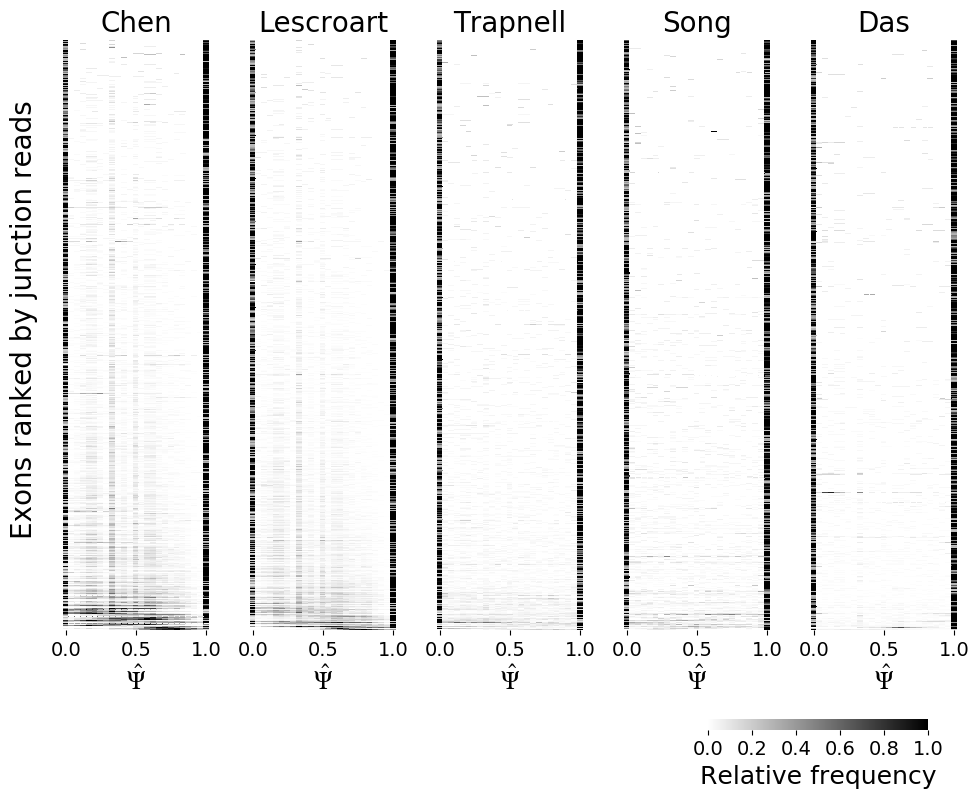

In [77]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [chen_hist_intermediate, lescroart_hist_intermediate, trapnell_hist_intermediate,
             song_hist_intermediate, das_hist_intermediate]

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/figure1/', plot_name = 'PSI_distributions',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

## Top covered exons present more unimodality

Close up to the 300 most covered exons in each dataset.

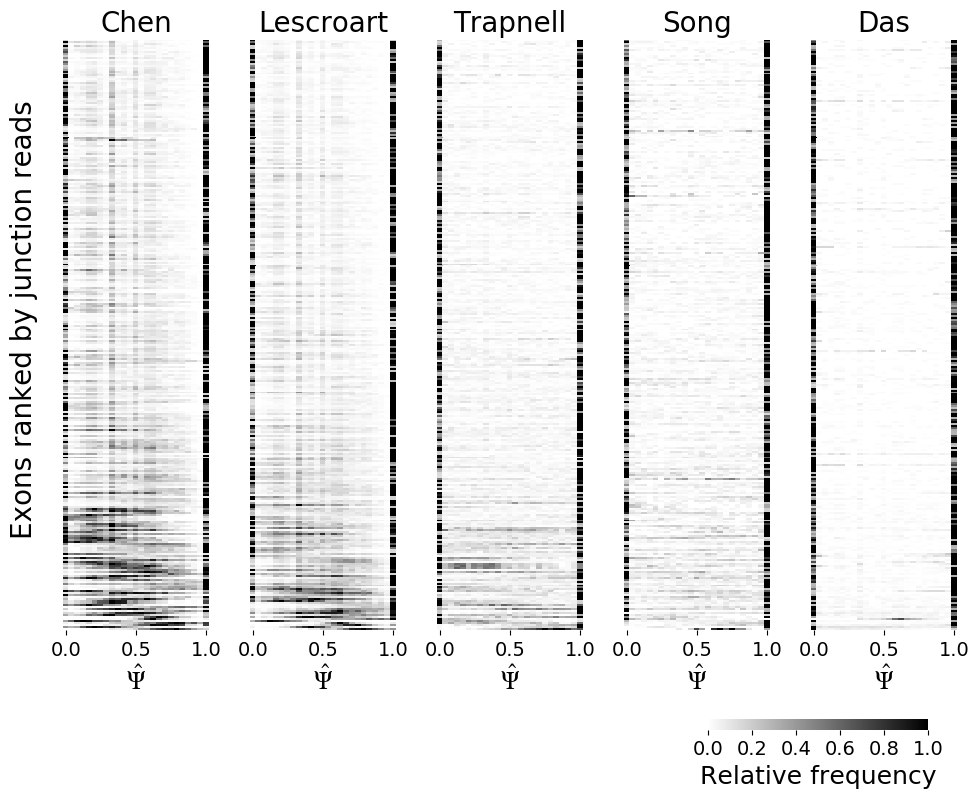

In [78]:
hist_list_300 = [x.loc[x.index[-300:]] for x in hist_list]
#scp.plot_histograms(hist_list_300, dset_name_list,fig_len=15, plot_name = 'PSI_distributions_top300')

scp.plot_histograms(hist_list_300, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/figure1/', plot_name = 'PSI_distributions_top300',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [32]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

# Individual events shown in Figure 1

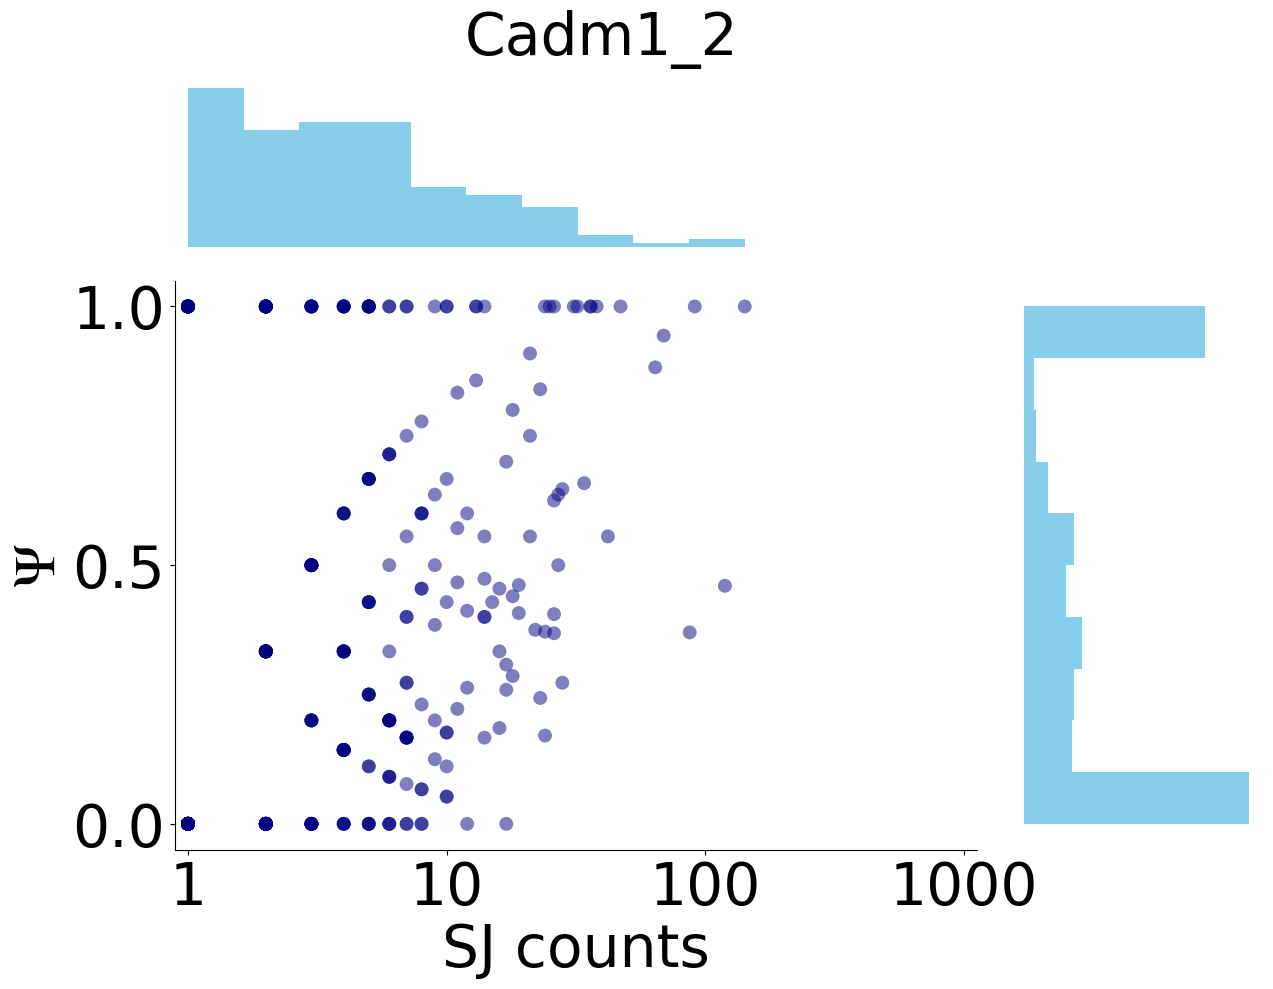

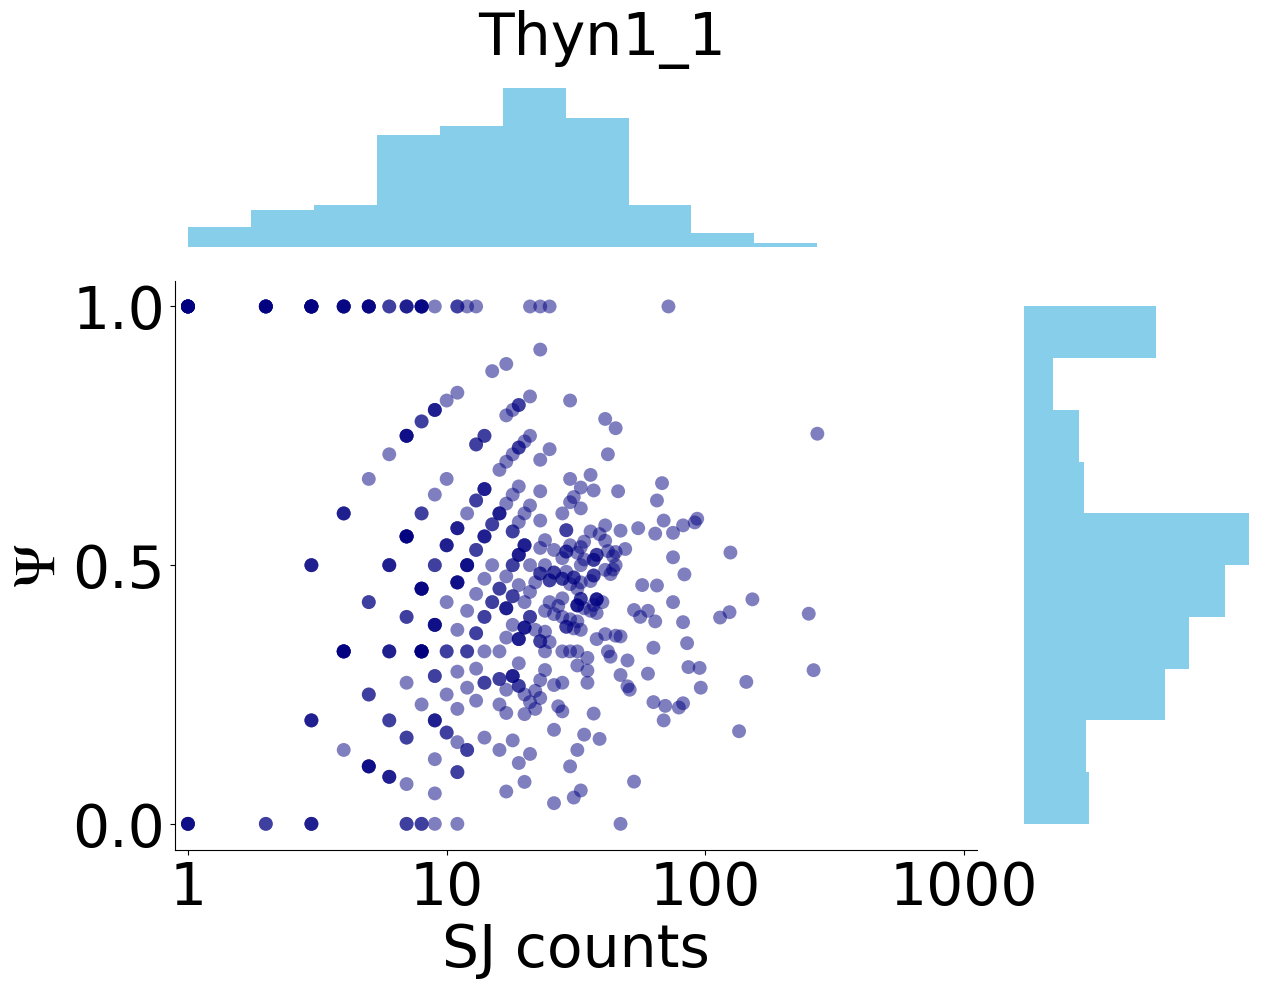

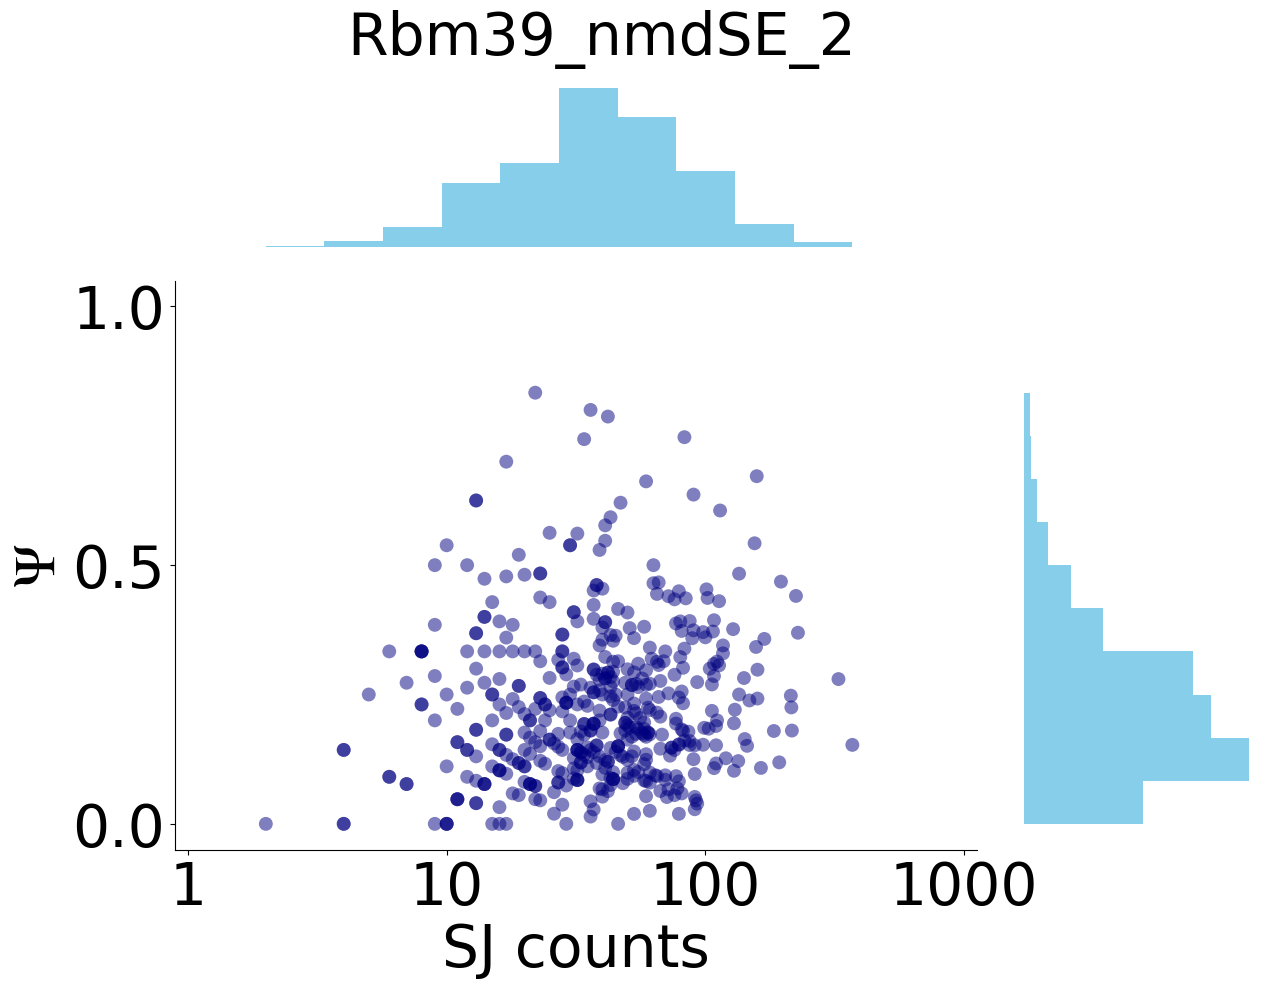

In [33]:
scp.plot_event(chen[3], chen[4], 'chen', 'Cadm1_2', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots/figure1/', just_show=True)

scp.plot_event(chen[3], chen[4], 'chen', 'Thyn1_1', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots/figure1/', just_show=True)

scp.plot_event(chen[3], chen[4], 'chen', 'Rbm39_nmdSE_2', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots/figure1/', just_show=True)

# Correlation between coverage and unimodality

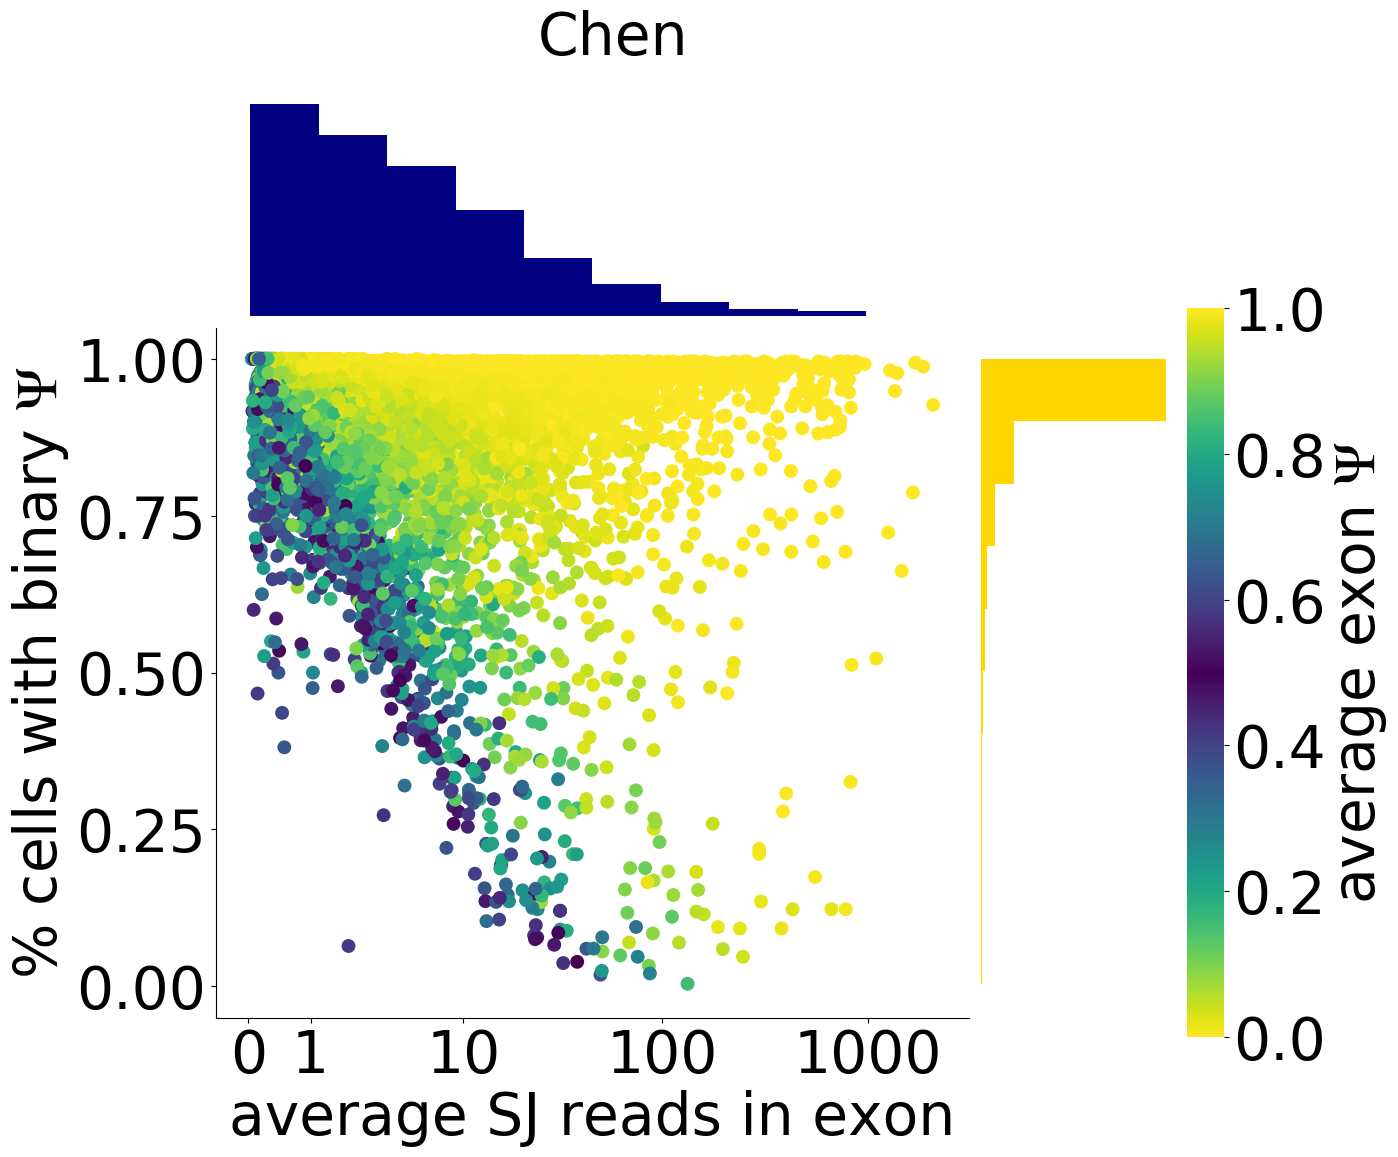

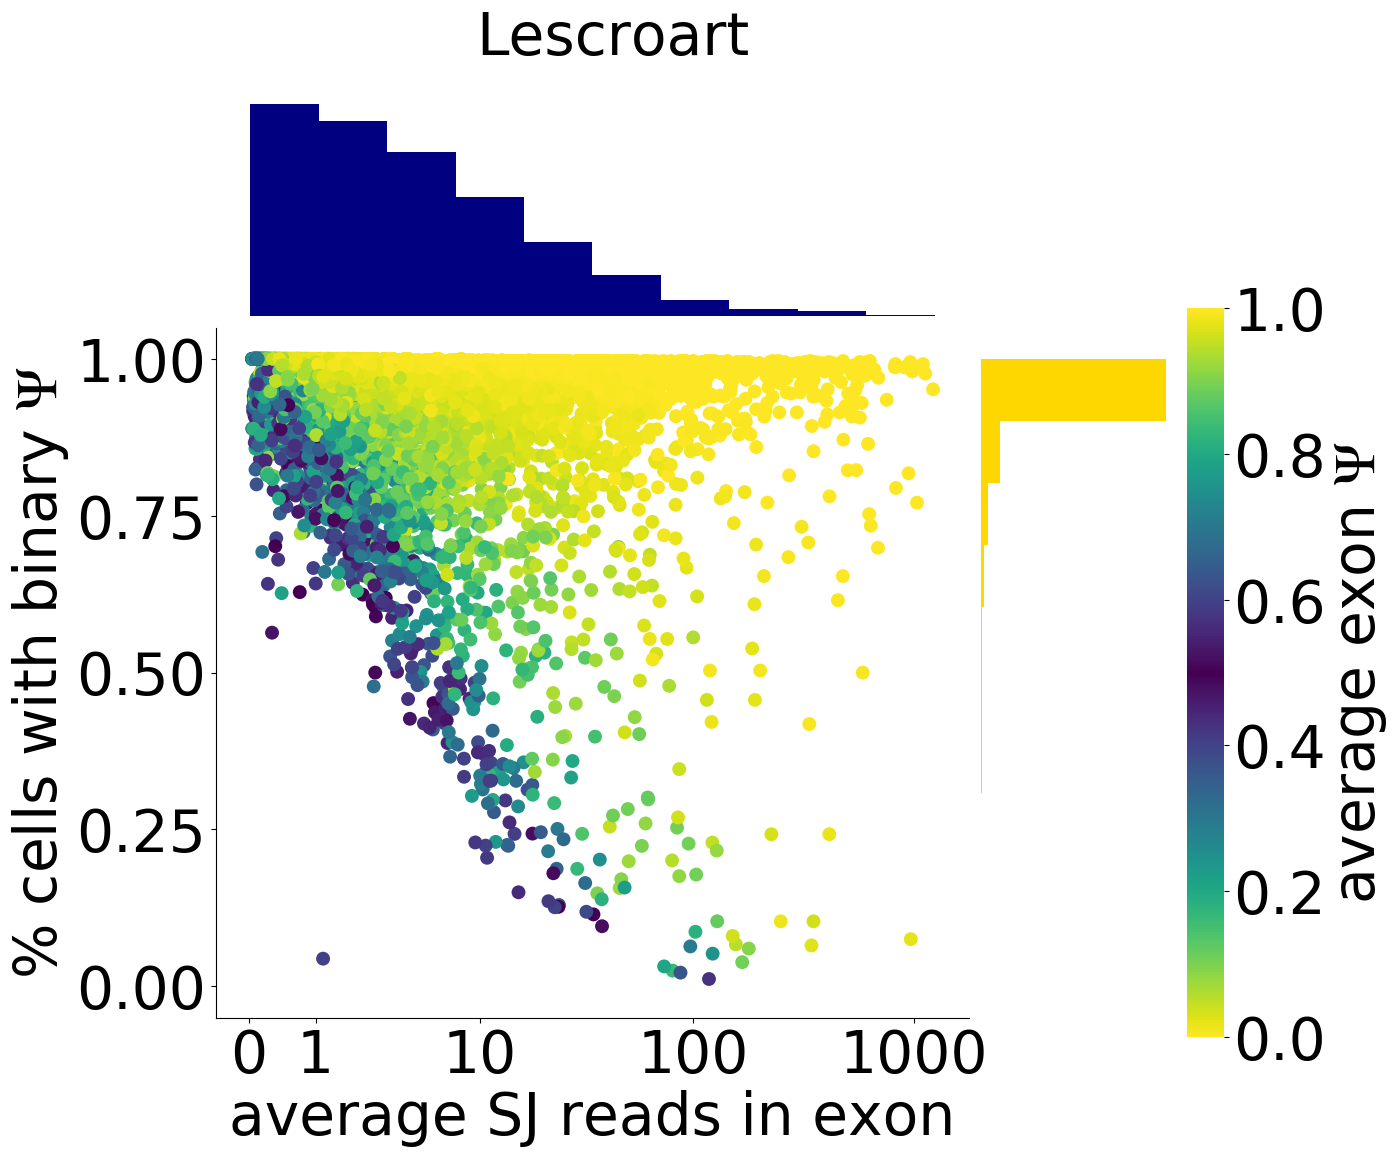

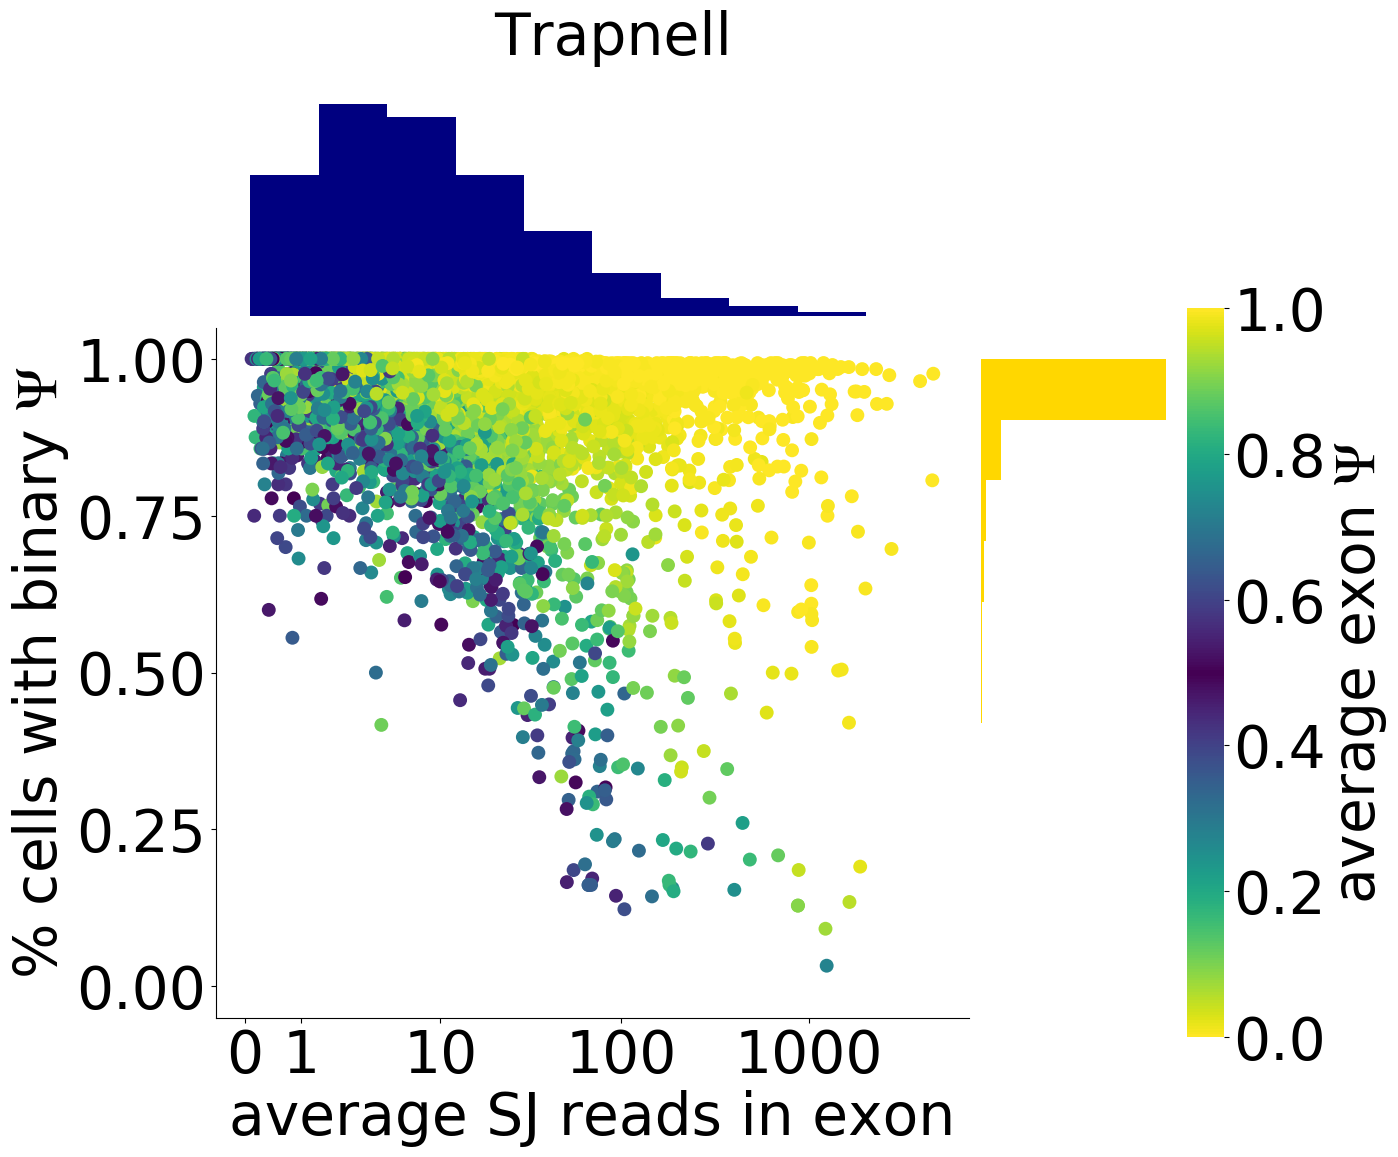

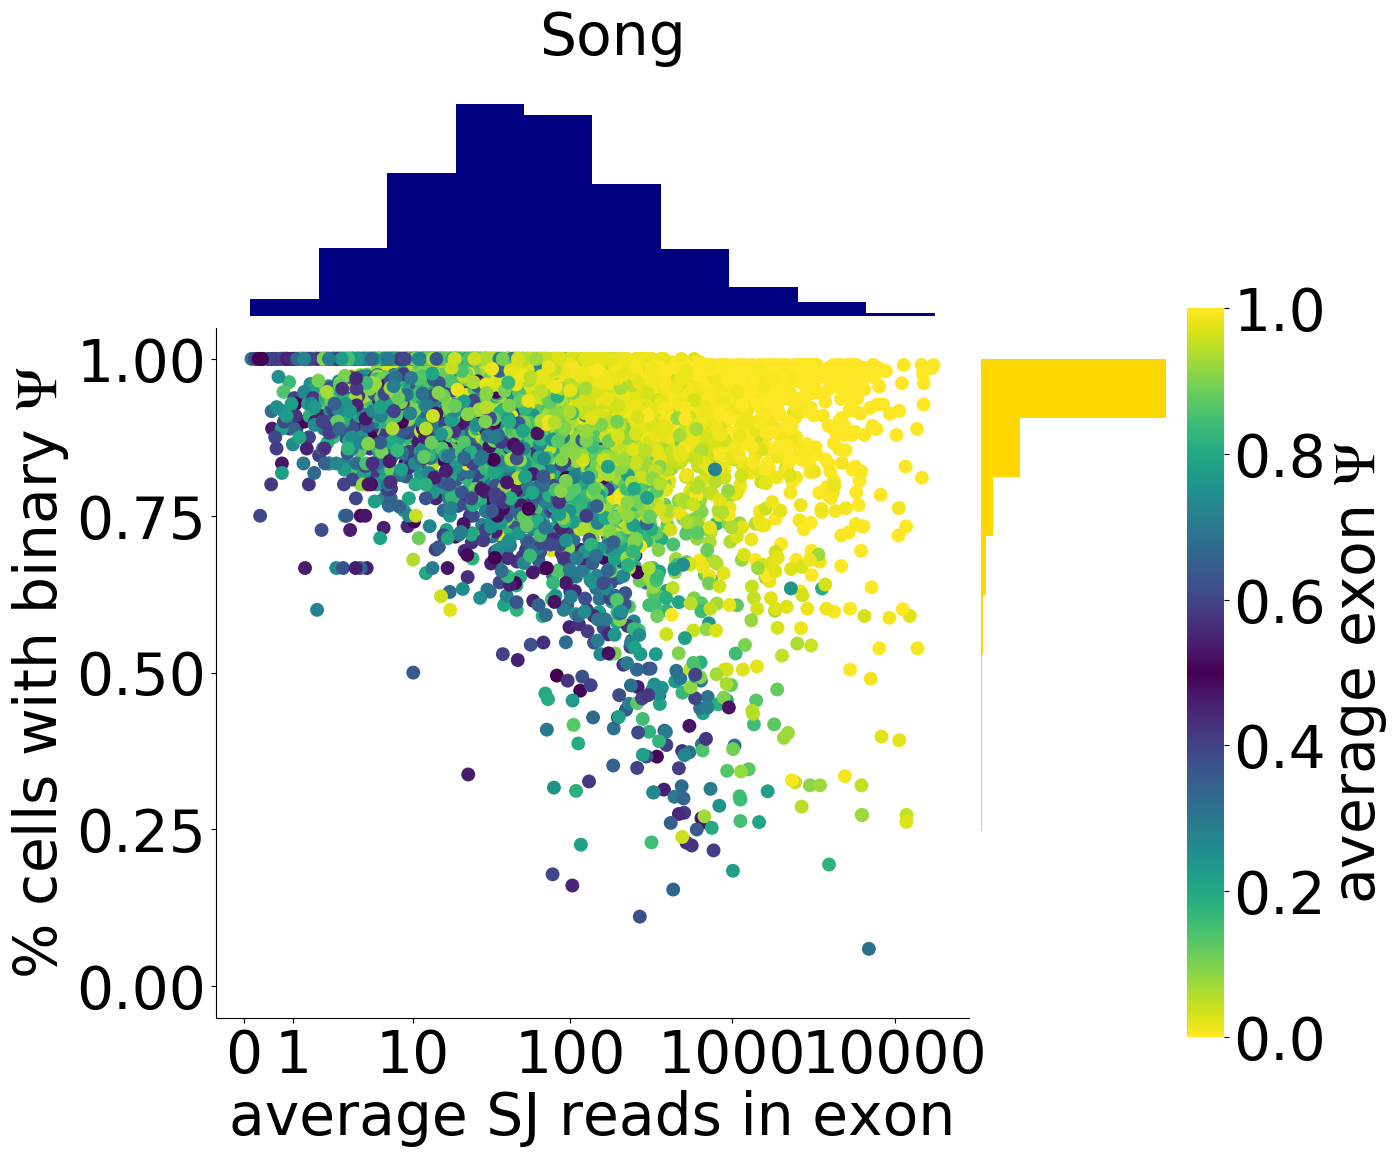

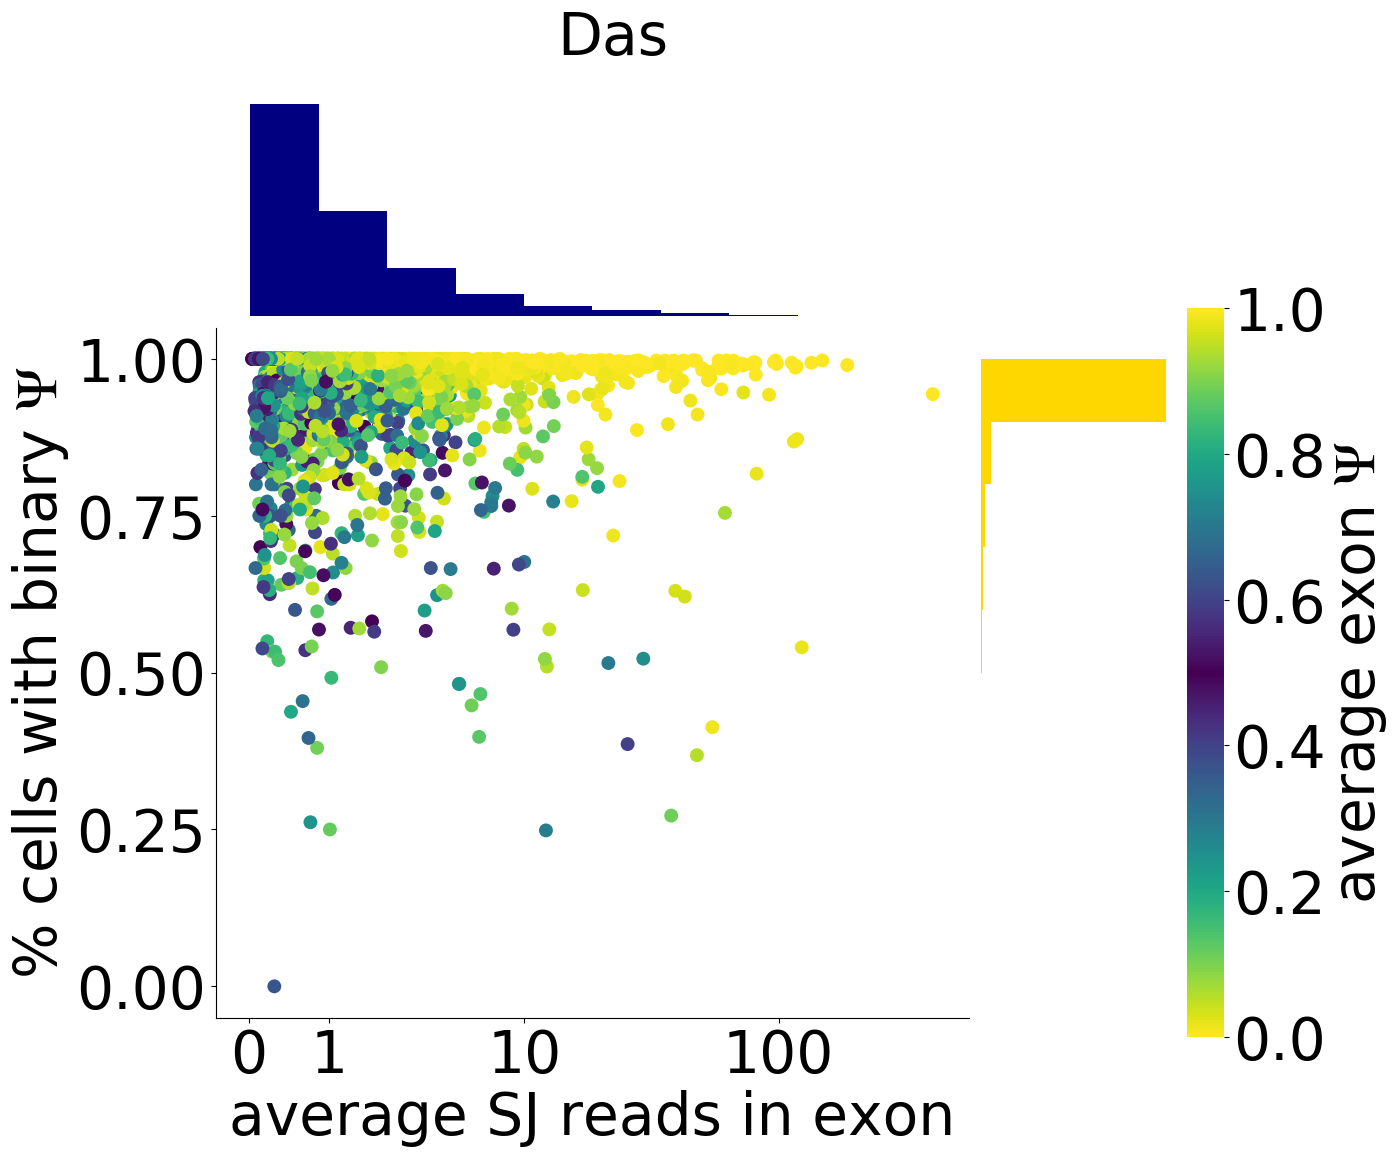

In [79]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(chen[3], chen[4], 'Chen', 'chen_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots/figure1/', just_show=False)

plt.show()

scp.plot_ase_expression_v_binary(lescroart[3], lescroart[4], 'Lescroart', 'lescroart_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots/figure1/', just_show=False)
plt.show()

scp.plot_ase_expression_v_binary(trapnell[3], trapnell[4], 'Trapnell', 'trapnell_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100, 1000, 10000]
scp.plot_ase_expression_v_binary(song[3], song[4], 'Song', 'song_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100]
scp.plot_ase_expression_v_binary(das[3], das[4], 'Das', 'das_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots/figure1/', just_show=False)
plt.show()


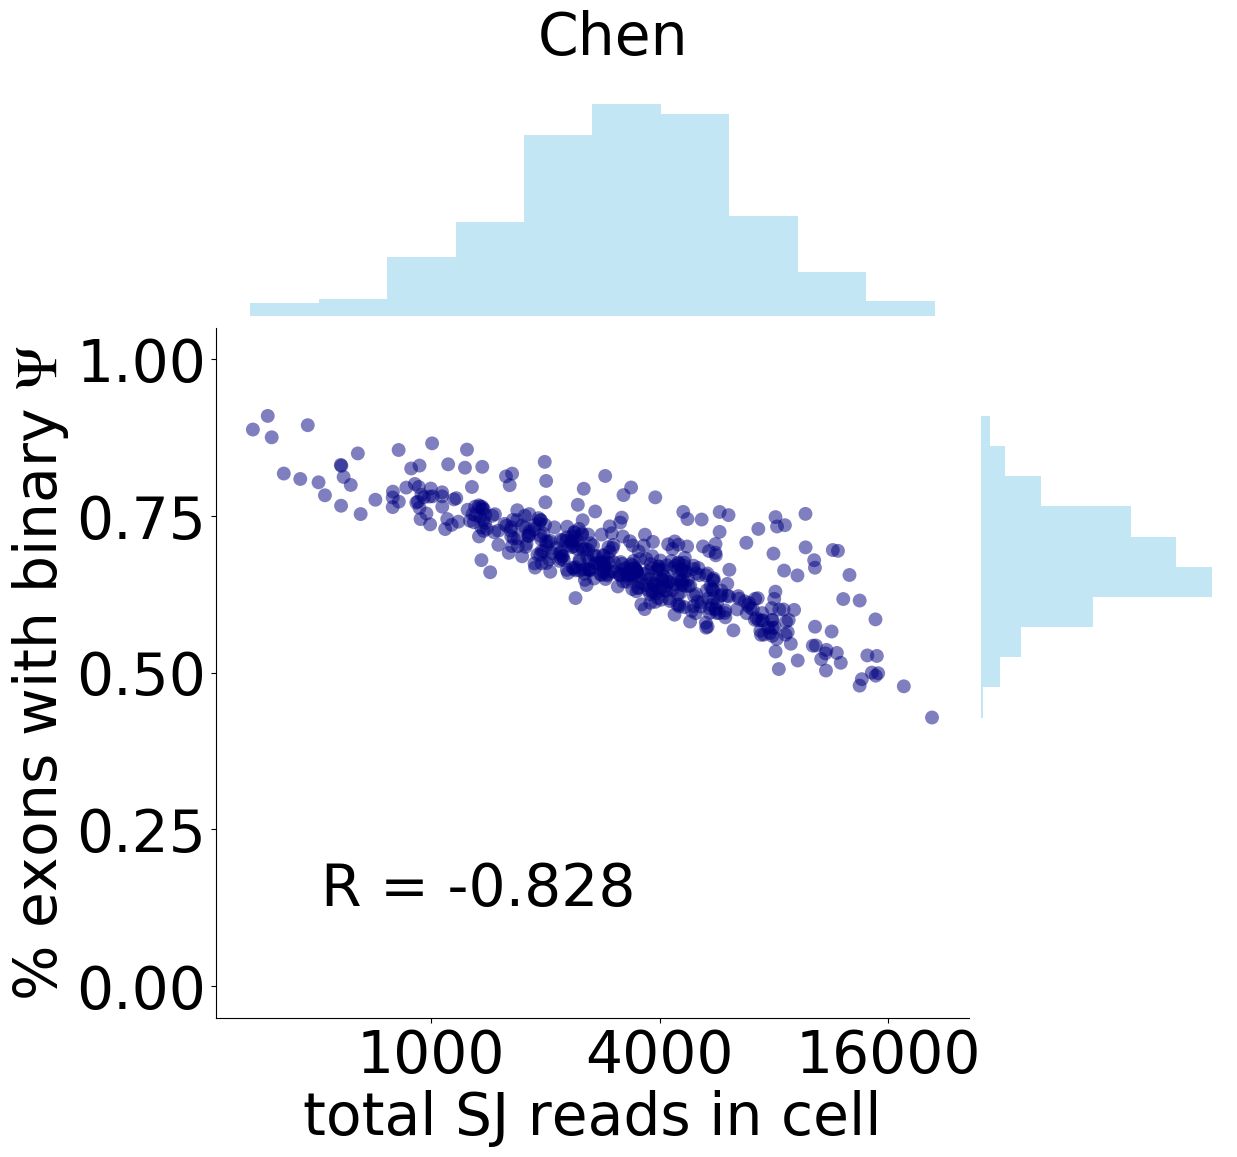

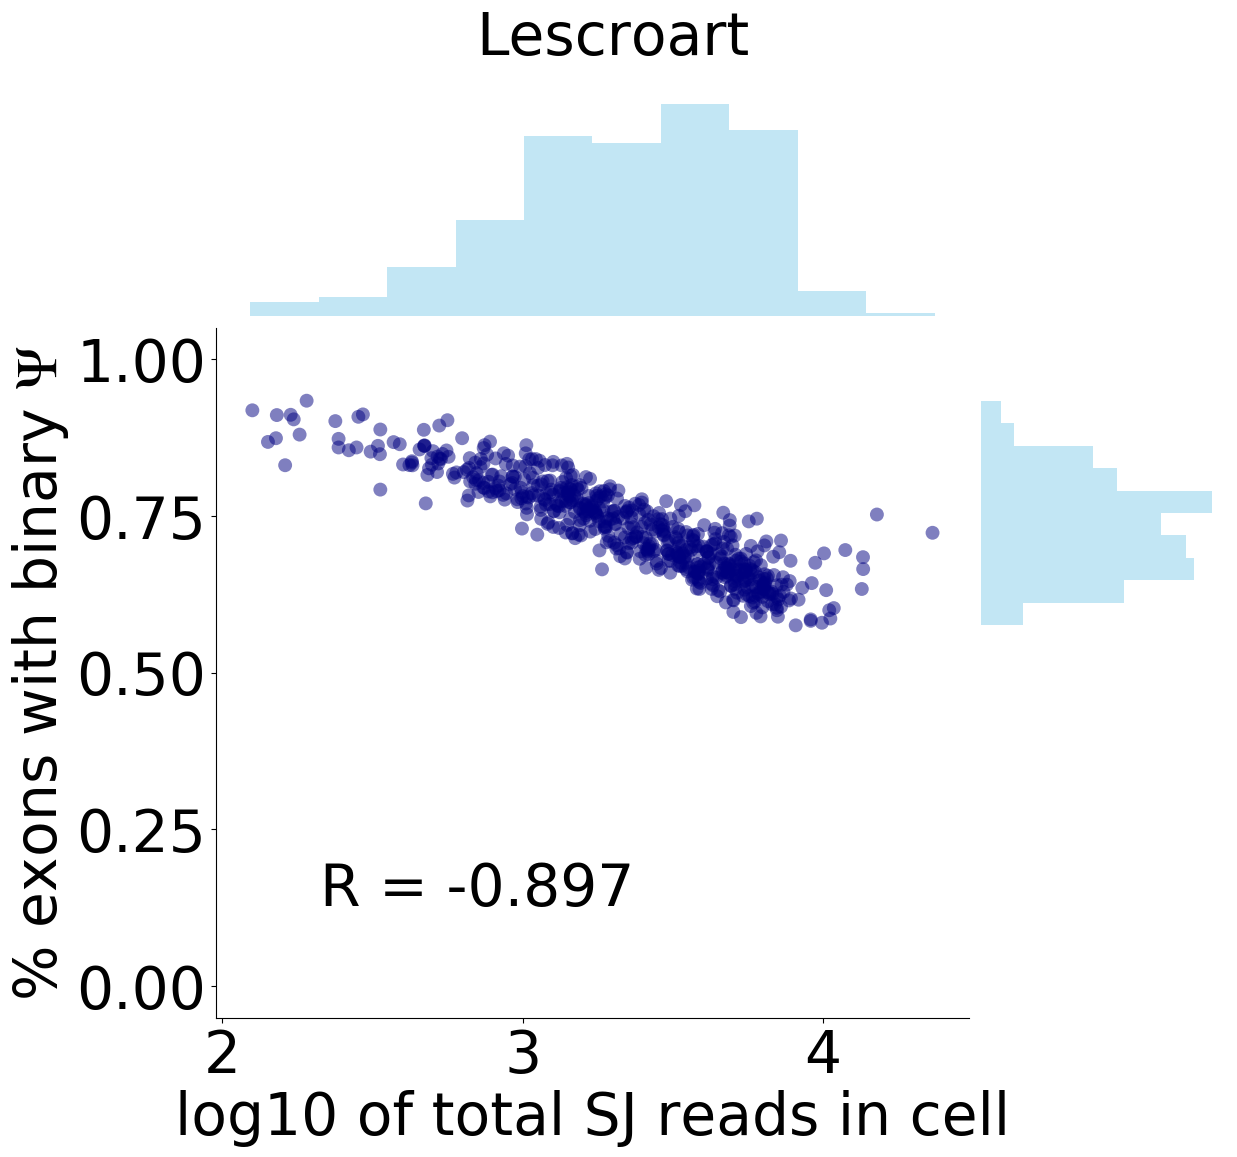

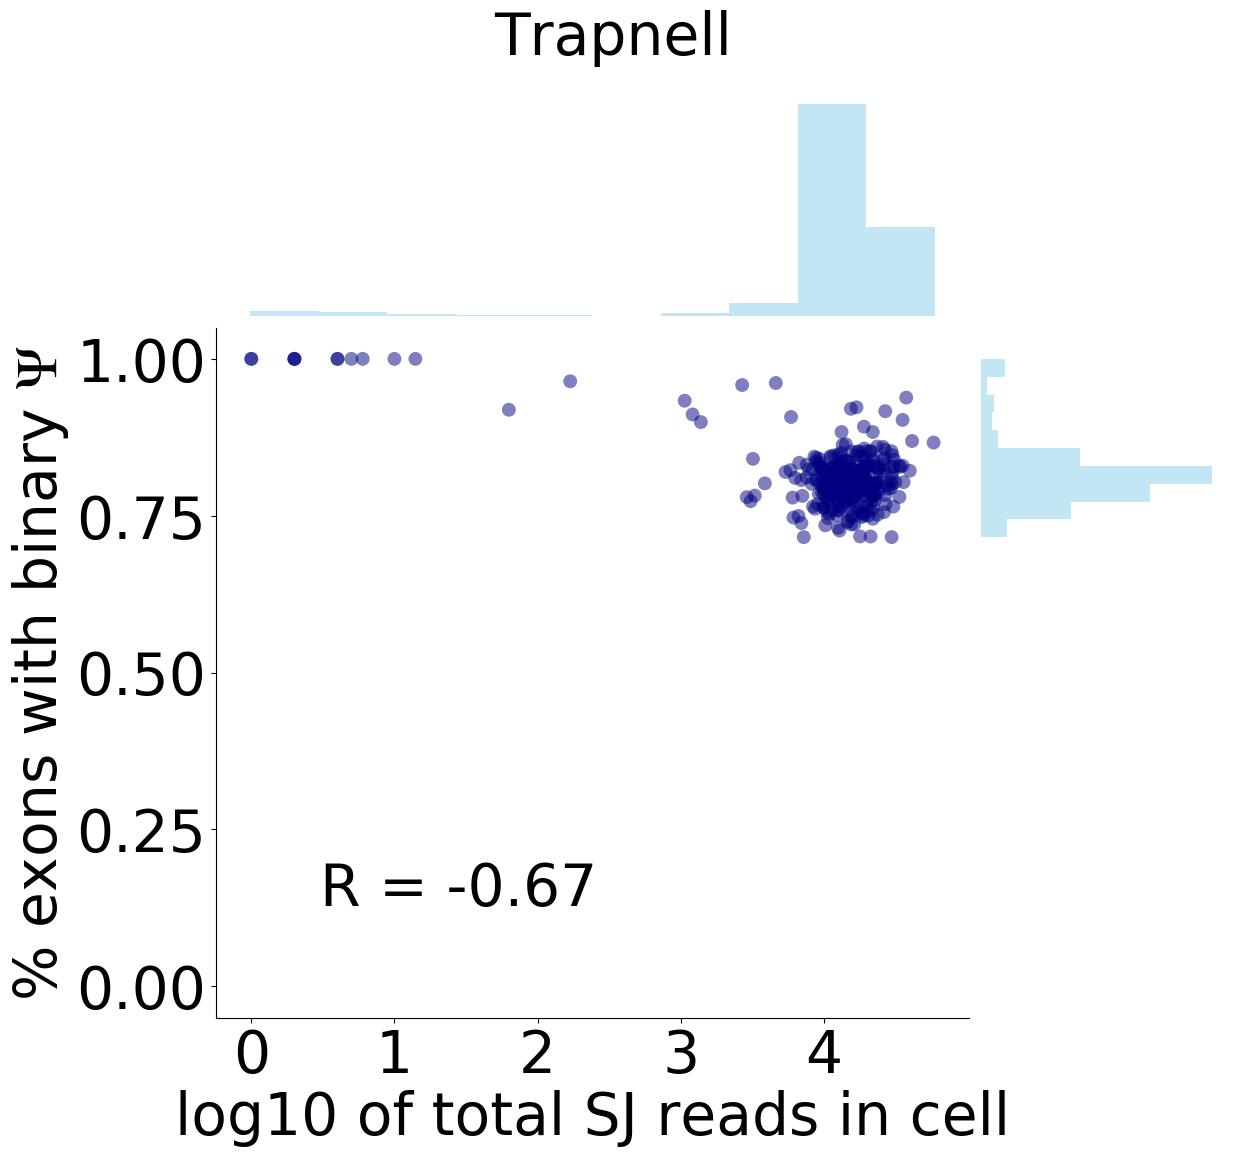

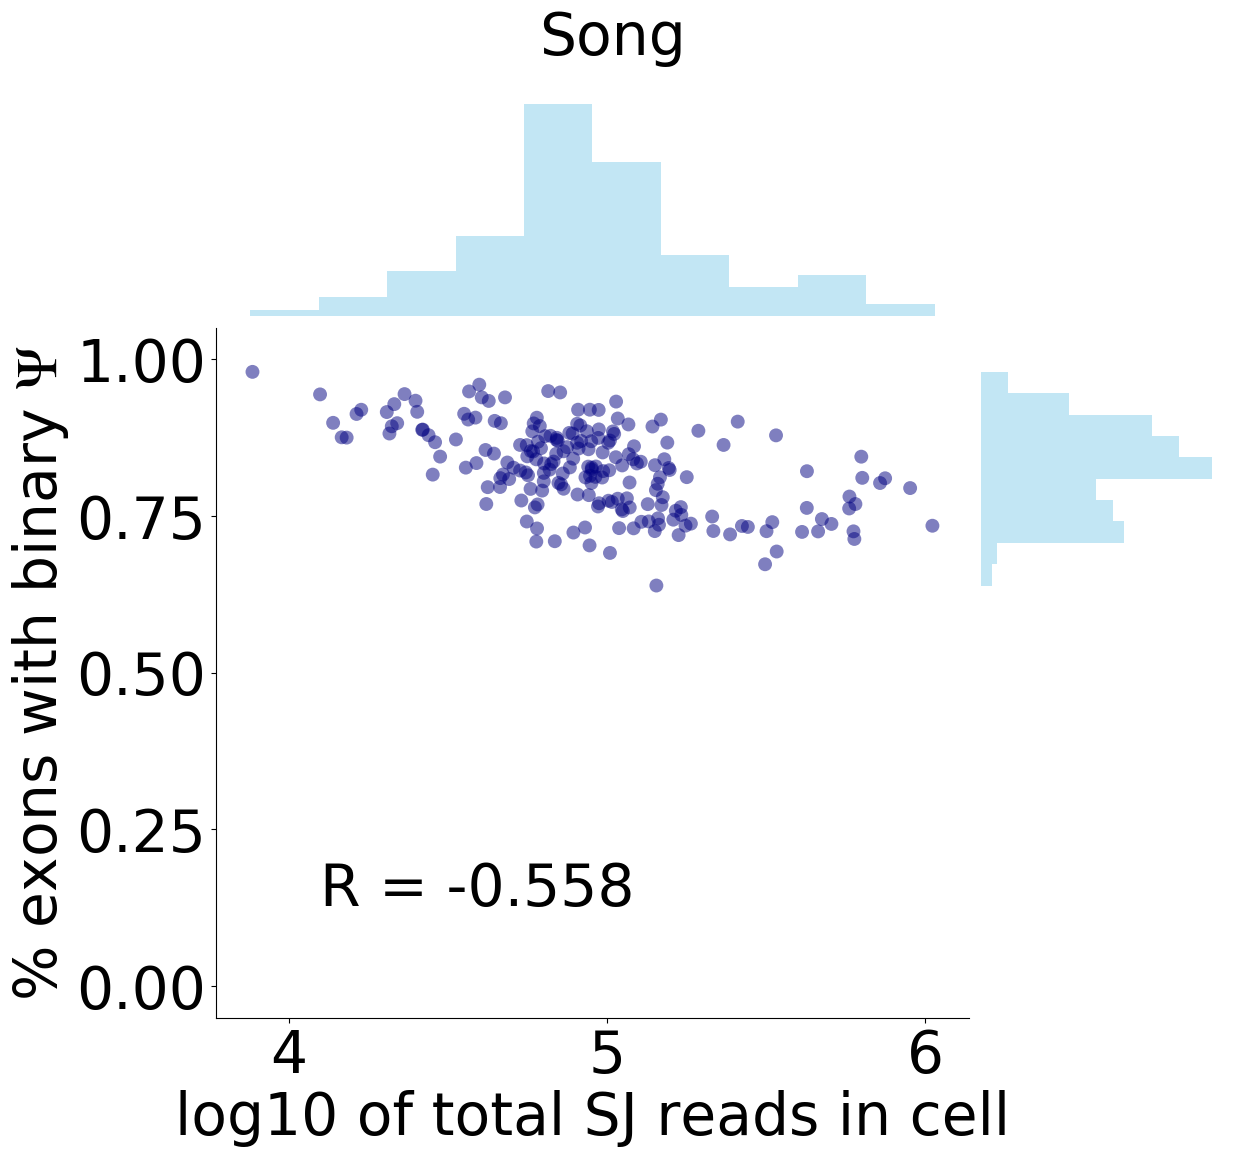

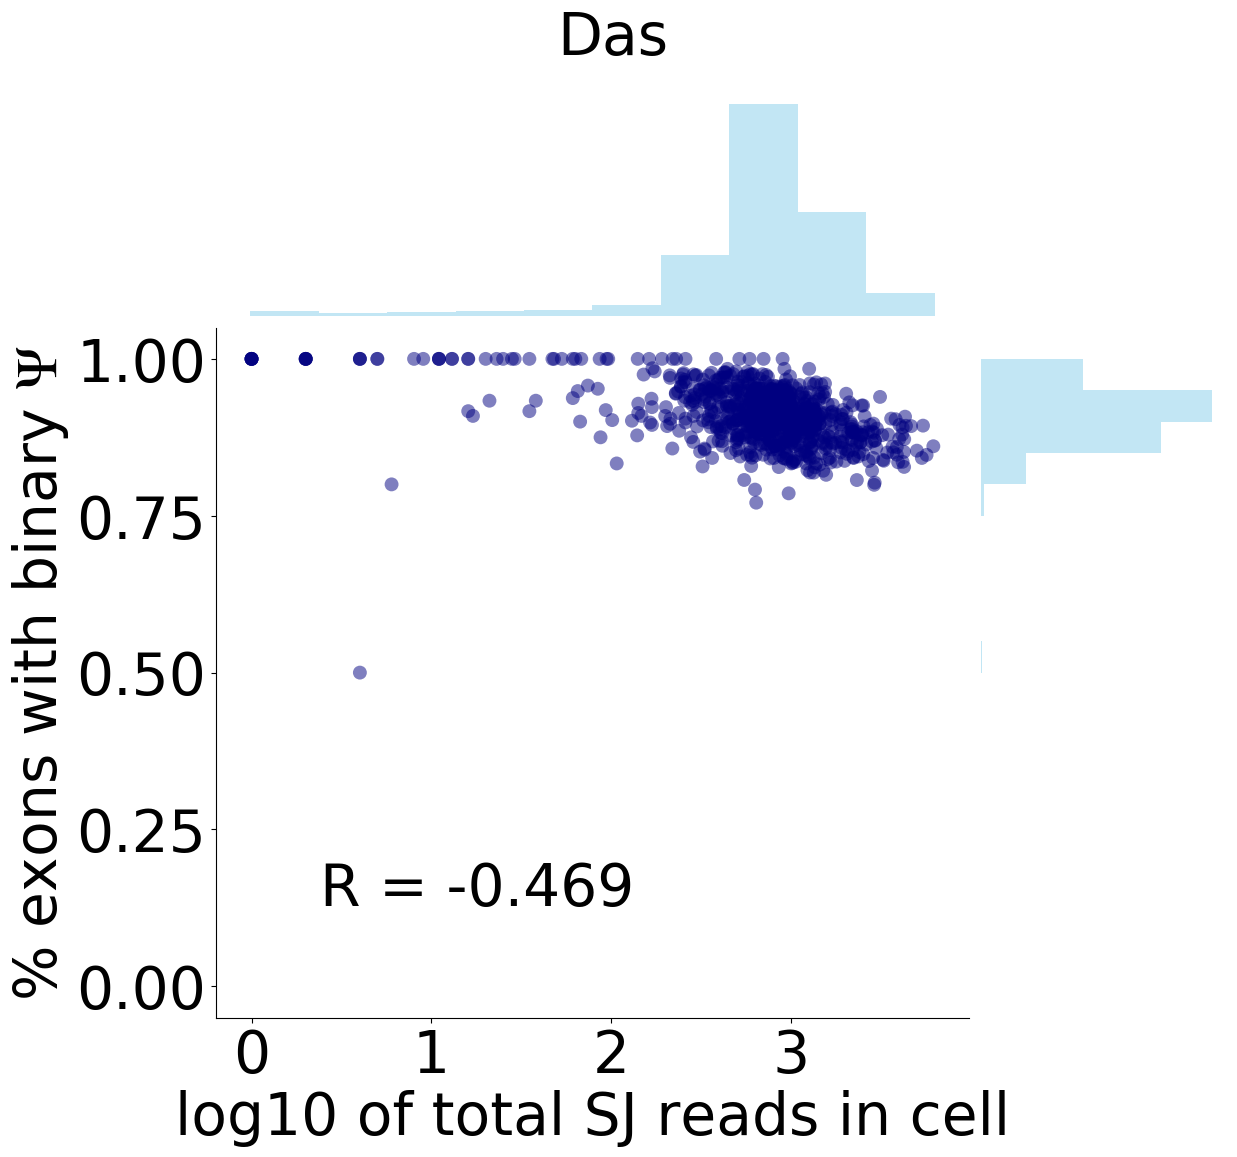

In [80]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(13, 12)

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Treutlein', 'Gao', 'Friedman', 'Falcao', 'Das']

pr_bar = []

xlocations = [1000, 4000, 16000]
filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 'chen_intermediate', 
                                                 xlocations=xlocations, xlabel='total SJ reads in cell',
                               plot_dir = 'plots/figure1/', just_show=False))

plt.show()

xlocations = [100, 1000,10000]
xtags = ['2', '3', '4']
filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
                                                'lescroart_intermediate', xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'plots/figure1/', just_show=False))

plt.show()

xlocations = [1, 10, 100, 1000,10000]
xtags = ['0', '1', '2', '3', '4']
filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
                                                'trapnell_intermediate', xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'plots/figure1/', just_show=False))

plt.show()

xlocations = [10000, 100000, 1000000]
xtags = ['4', '5', '6']

filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
                                                'song_intermediate',  xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'plots/figure1/', just_show=False))

plt.show()

xlocations = [1, 10, 100, 1000]
xtags = ['0', '1', '2', '3']
filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
                                                'das_intermediate', xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'plots/figure1/', just_show=False))

plt.show()


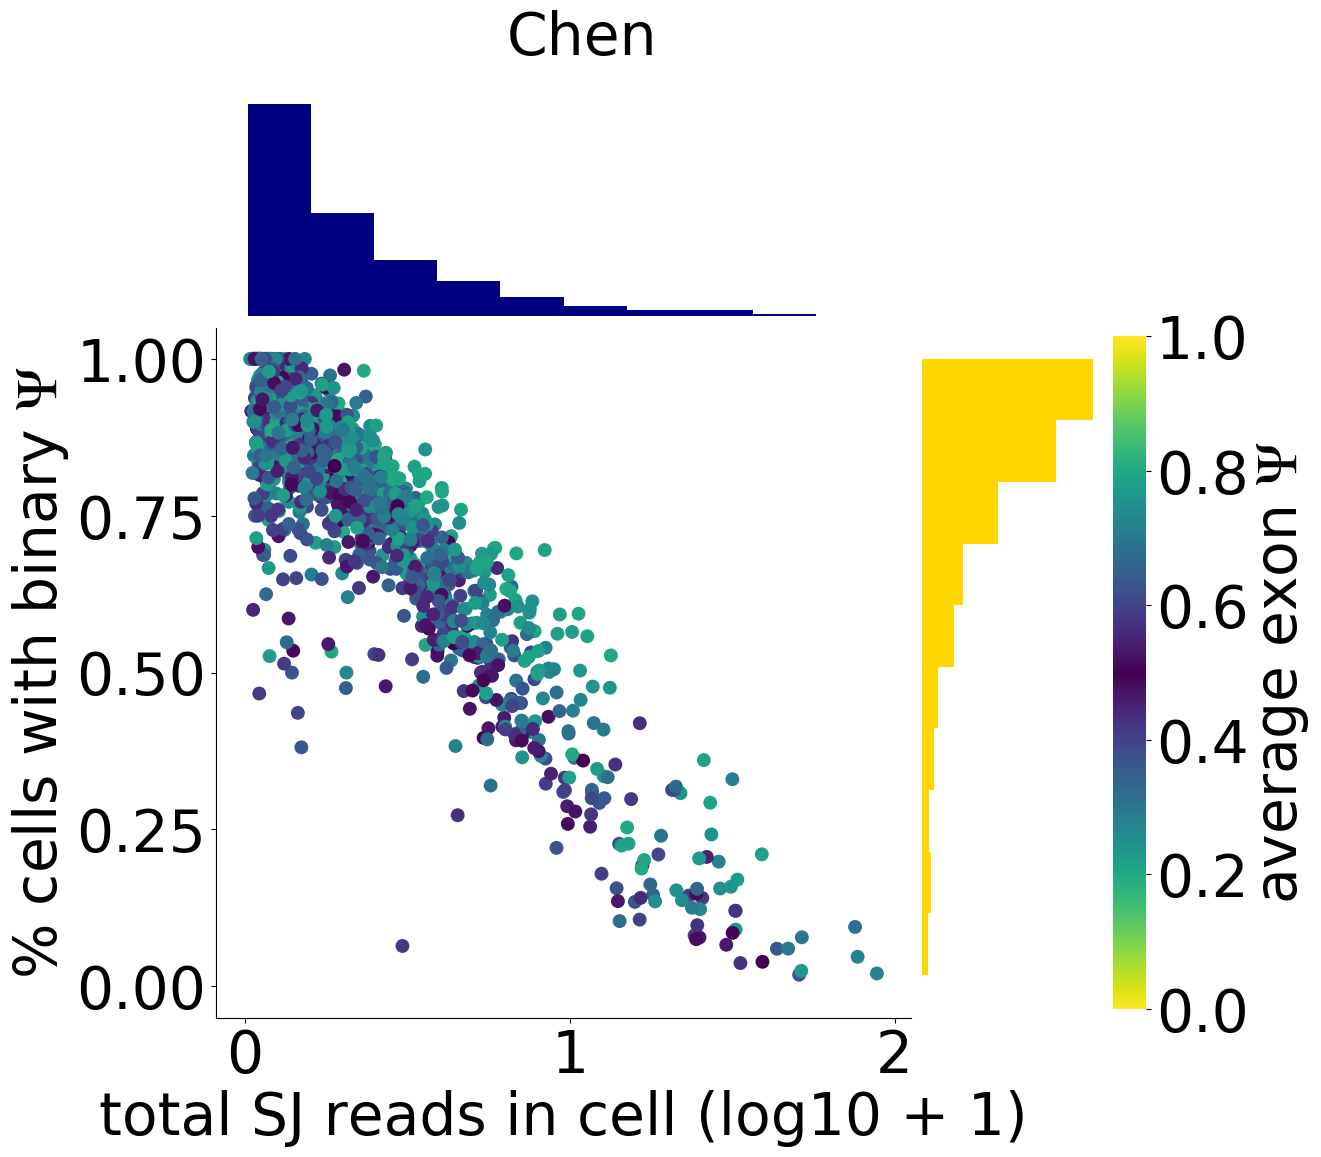

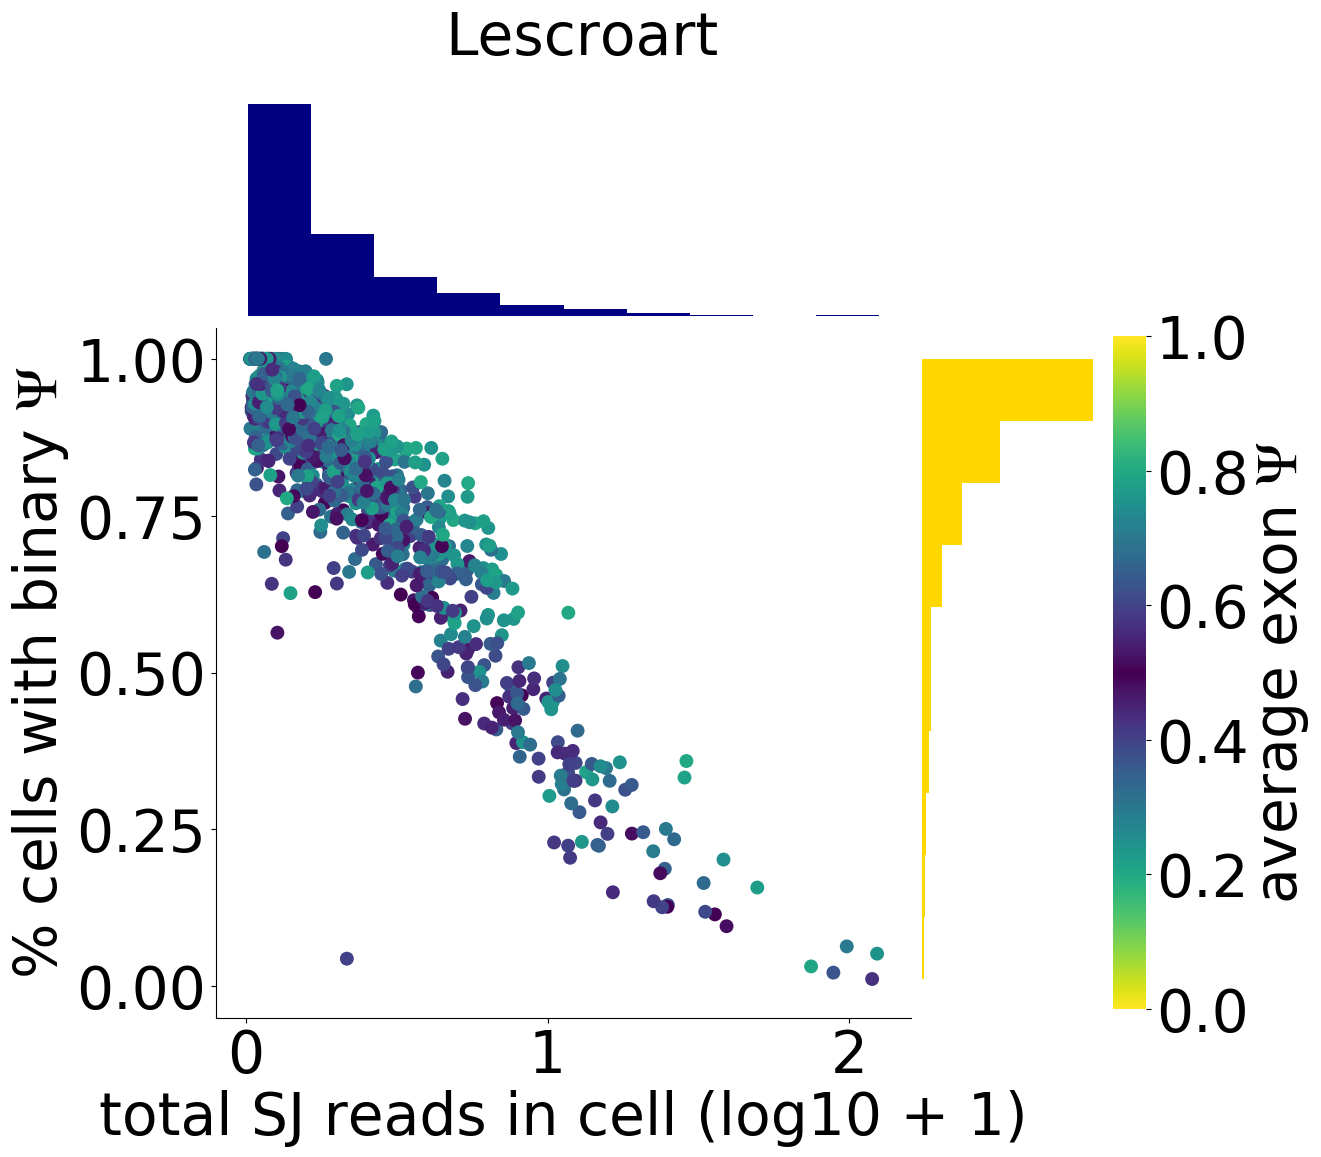

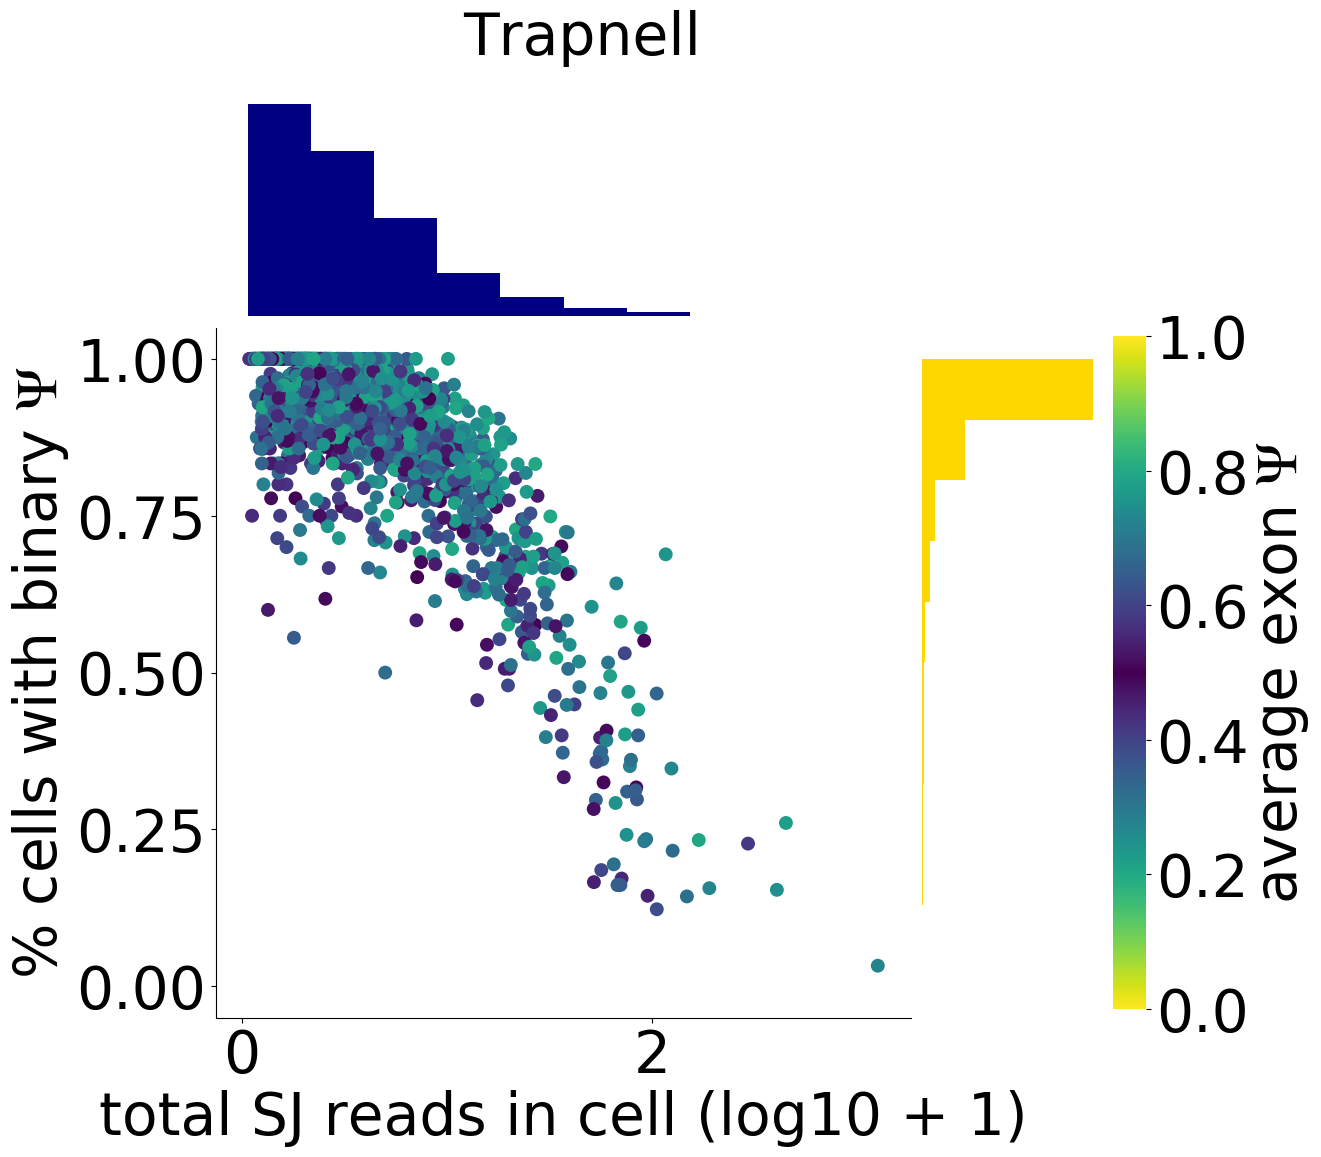

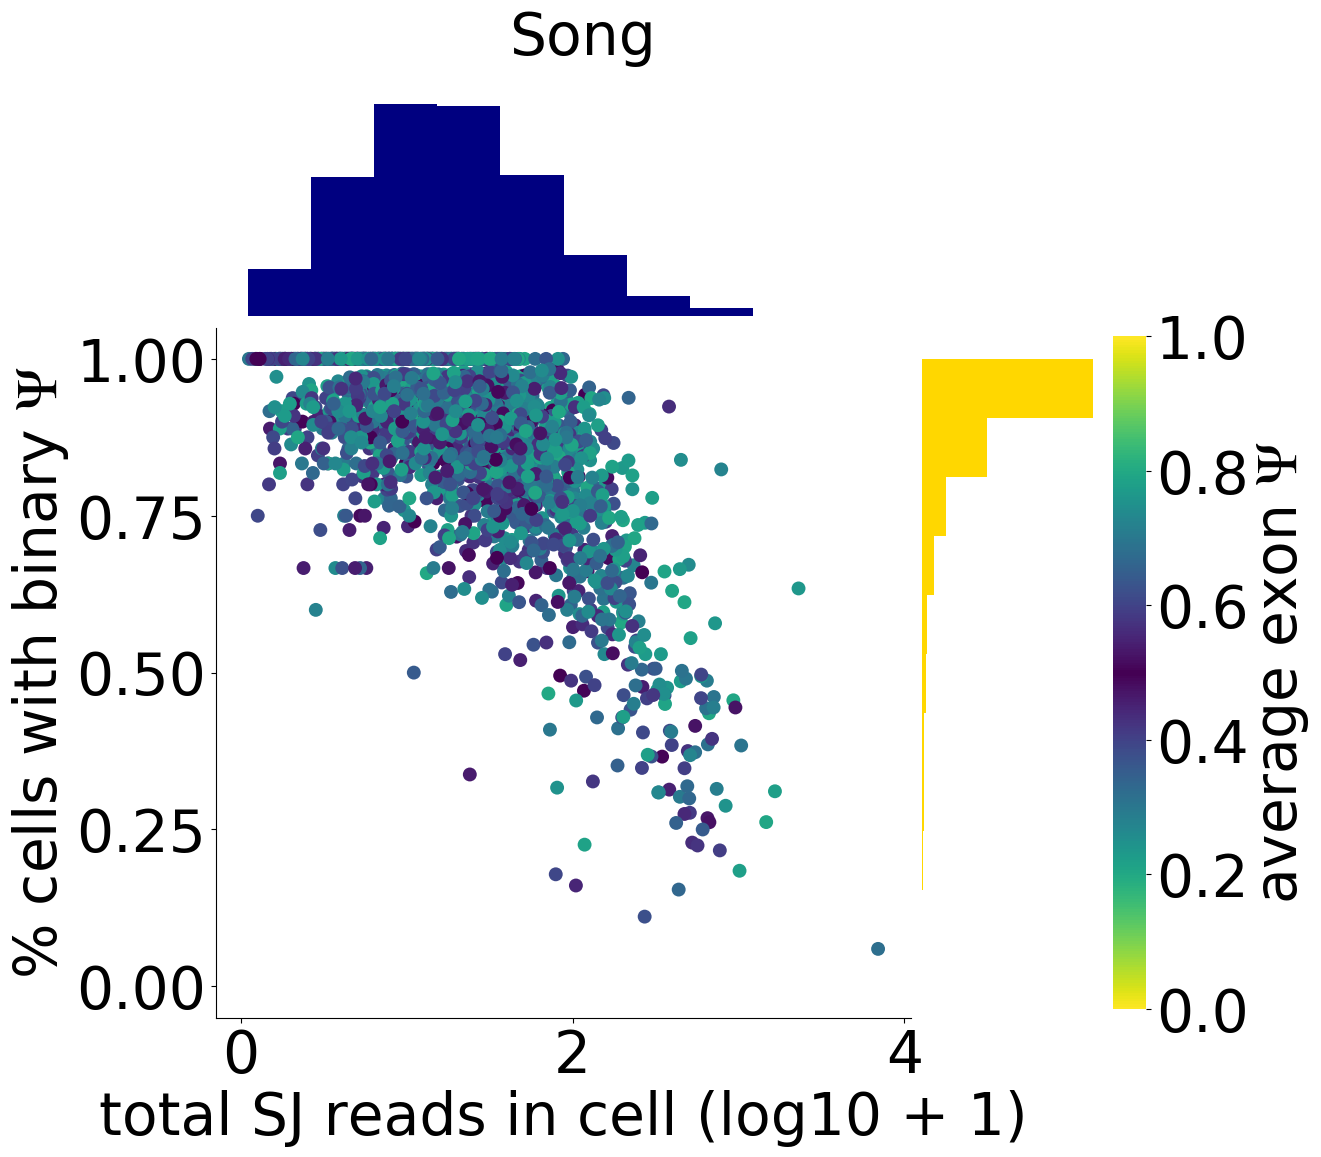

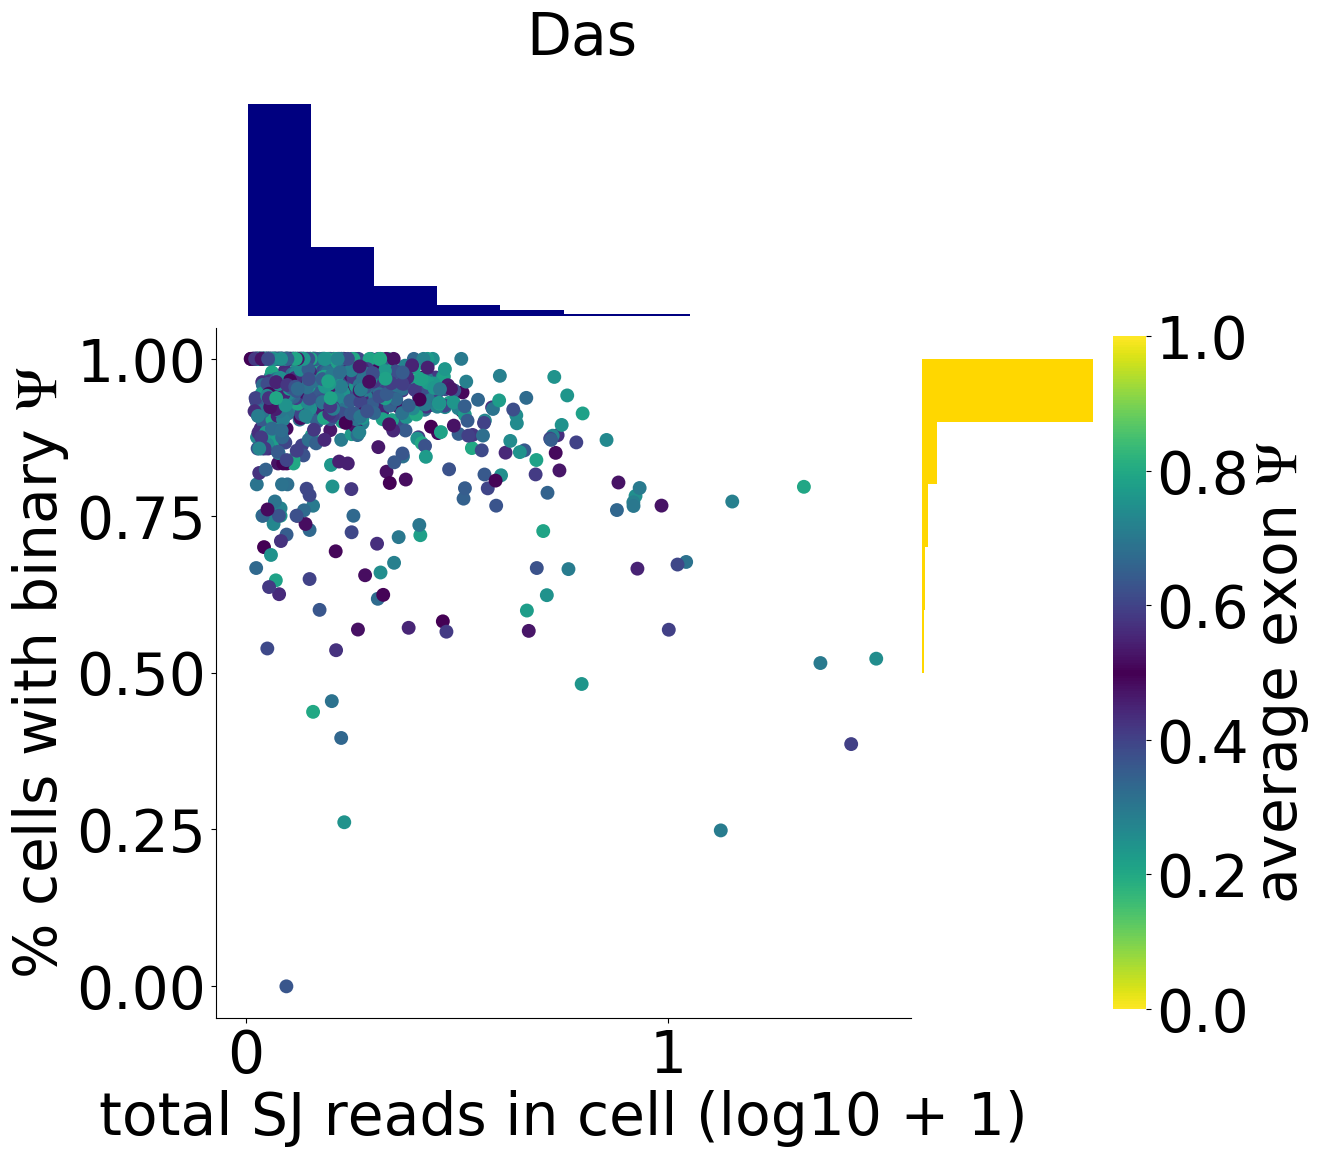

In [81]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(12, 12)
pr_bar2 = []

filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 
                                                'chen_intermediate', 
                              plot_dir = 'plots/figure1/', just_show=False))

filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
                                                'lescroart_intermediate', 
                              plot_dir = 'plots/figure1/', just_show=False))

filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
                                                'trapnell_intermediate', 
                              plot_dir = 'plots/figure1/', just_show=False))

filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
                                                'song_intermediate', 
                              plot_dir = 'plots/figure1/', just_show=False))

filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
                                                'das_intermediate', 
                              plot_dir = 'plots/figure1/', just_show=False))

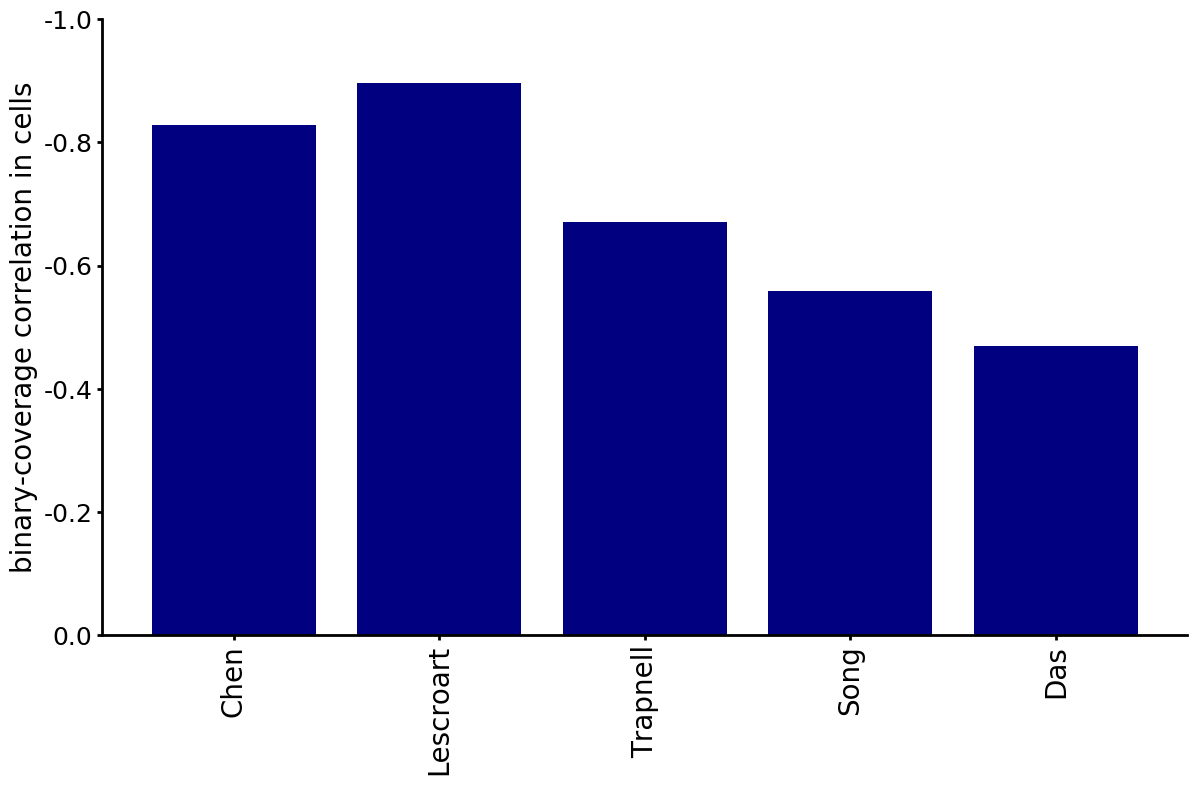

In [82]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(14,8)

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar([1, 2, 3, 4, 5], -(np.array(pr_bar)), color='navy')
ax.tick_params(labelsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

ax.set_ylim((0,1))

plt.ylabel("binary-coverage correlation in cells", fontsize=20)

locs, labels = plt.yticks()

newLabels = []

newLabels.append('0.0')
newLabels.append('-0.2')
newLabels.append('-0.4')
newLabels.append('-0.6')
newLabels.append('-0.8')
newLabels.append('-1.0')

plt.yticks(locs, newLabels)

plt.xticks([1, 2, 3, 4, 5], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das'], fontsize=20, rotation='vertical')    



plt.savefig('plots/figure1/datasets_cell_correlations.pdf', bbox_inches='tight')
plt.savefig('plots/figure1/datasets_cell_correlations.png', dpi=300, bbox_inches='tight')

plt.show()

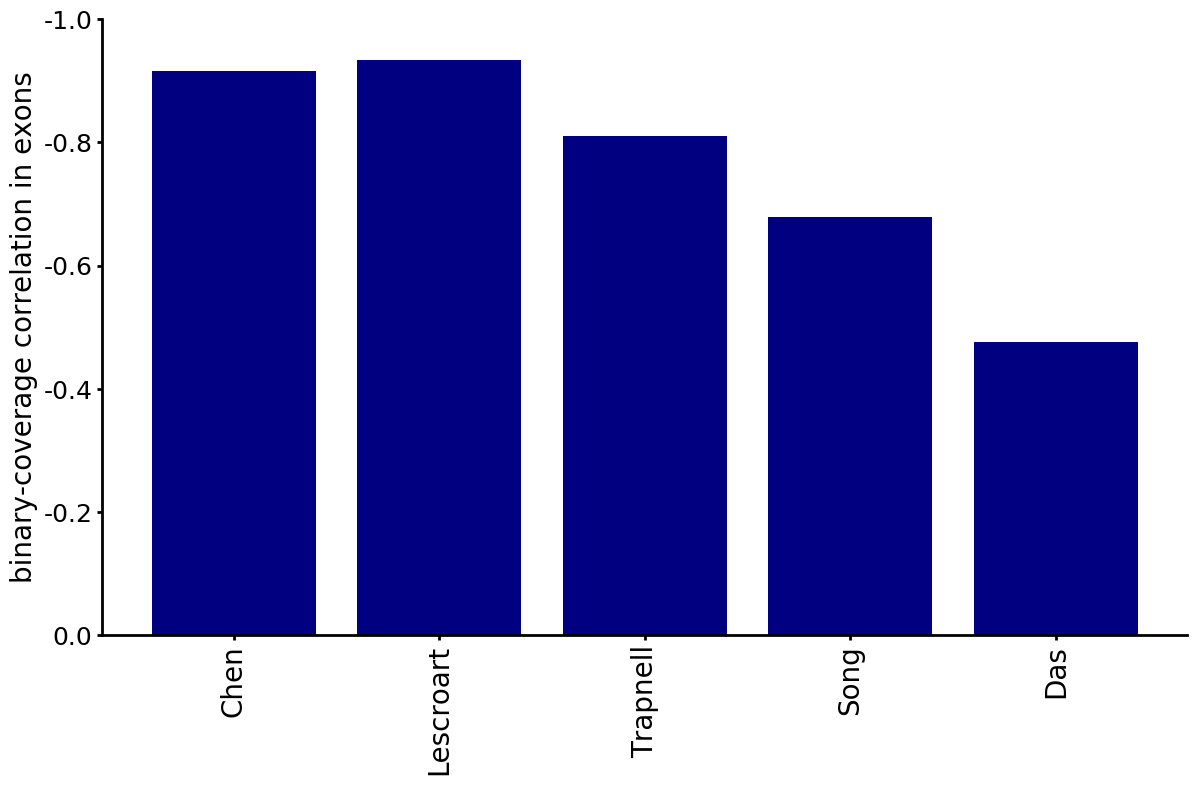

In [83]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(14, 8))

rects = ax.bar([1, 2, 3, 4, 5], -(np.array(pr_bar2)), color='navy')
ax.tick_params(labelsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

ax.set_ylim((0,1))
plt.ylabel("binary-coverage correlation in exons", fontsize=20)

locs, labels = plt.yticks()

newLabels = []

newLabels.append('0.0')
newLabels.append('-0.2')
newLabels.append('-0.4')
newLabels.append('-0.6')
newLabels.append('-0.8')
newLabels.append('-1.0')

plt.yticks(locs, newLabels)

plt.xticks([1, 2, 3, 4, 5], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das'], fontsize=20, rotation='vertical')    


# plt.show()
plt.savefig('plots/figure1/datasets_exon_correlations.svg', bbox_inches='tight')
plt.savefig('plots/figure1/datasets_exon_correlations.pdf', bbox_inches='tight')
plt.savefig('plots/figure1/datasets_exon_correlations.png', dpi=300, bbox_inches='tight')

plt.show()

# Exon filtering (Figure 3)

In [3]:
chen_PSI = chen[3]
chen_read_counts = chen[4]

chen_meta_pseudotime = pd.read_csv('../../../data/chen/chen.meta_pseudotime.tab', sep='\t', index_col=0)
ES2i = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES2i']
ES = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES']
Epi = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Epi']
MN = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Motor neuron']
bio = list(ES2i) + list(ES) + list(Epi) + list(MN)
chen_tpm_tab = pd.read_csv('../../../data/chen/chen.tpm.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_star_tab = pd.read_csv('../../../data/chen/chen.star.counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_el = pd.read_csv('../../../data/chen/chen.effective_length.gene_symbols.tab', sep='\t', index_col=0)[bio]
crpm_chen = pd.read_csv('../../../data/chen/chen_sr_score.tab', sep='\t', index_col = 0)[bio]
chen_mrna_counts = pd.read_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)

###############################

lescroart_PSI = lescroart[3]
lescroart_read_counts = lescroart[4]
lescroart_bio = lescroart_PSI.columns
lescroart_tpm_tab = pd.read_csv('../../../data/lescroart/Lescroart.tpm.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_star_tab = pd.read_csv('../../../data/lescroart/Lescroart.star.counts.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_rsem_tab = pd.read_csv('../../../data/lescroart/Lescroart.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_el = pd.read_csv('../../../data/lescroart/Lescroart.effective_length.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
crpm_lescroart = pd.read_csv('../../../data/lescroart/lescroart_sr_score.tab', sep='\t', index_col = 0)

##############################

trapnell_PSI = trapnell[3]
trapnell_read_counts = trapnell[4]
trapnell_bio = trapnell_PSI.columns
trapnell_tpm_tab = pd.read_csv('../../../data/trapnell/trapnell.tpm.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_star_tab = pd.read_csv('../../../data/trapnell/trapnell.star.counts.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_rsem_tab = pd.read_csv('../../../data/trapnell/trapnell.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_el = pd.read_csv('../../../data/trapnell/trapnell.effective_length.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
crpm_trapnell = pd.read_csv('../../../data/trapnell/trapnell_sr_score.tab', sep='\t', index_col = 0)


###############################

song_PSI = song[3]
song_read_counts = song[4]
song_meta = pd.read_csv('../../../data/song/song_meta.tab', sep='\t', index_col=0)
song_bio = song_meta.index[song_meta.sample_type_s == 'Single Cell']
song_tpm_tab = pd.read_csv('../../../data/song/song.tpm.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_star_tab = pd.read_csv('../../../data/song/song.star.counts.tab', sep='\t', index_col=0)[song_bio]
song_rsem_tab = pd.read_csv('../../../data/song/song.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_el = pd.read_csv('../../../data/song/song.effective_length.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
crpm_song = pd.read_csv('../../../data/song/song_sr_score.tab', sep='\t', index_col = 0)


###############################

das_PSI = das[3]
das_read_counts = das[4]
das_bio = das_PSI.columns
das_tpm_tab = pd.read_csv('../../../data/das/das.tpm.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_star_tab = pd.read_csv('../../../data/das/das.star.counts.tab', sep='\t', index_col=0)[das_bio]
das_rsem_tab = pd.read_csv('../../../data/das/Das.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_el = pd.read_csv('../../../data/das/Das.effective_length.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
crpm_das = pd.read_csv('../../../data/das/das_sr_score.tab', sep='\t', index_col = 0)

In [41]:
# ### This runs the Census normalization

# chen_mrna_counts = spu.transform_tpm_to_counts(chen_tpm_tab, plot_hist = False, correct_high = True)
# print('chen')
# song_mrna_counts = spu.transform_tpm_to_counts(song_tpm_tab, plot_hist = False, correct_high = True)
# print('song')
# trapnell_mrna_counts = spu.transform_tpm_to_counts(trapnell_tpm_tab, plot_hist = False, correct_high = True)
# print('trapnell')
# lescroart_mrna_counts = spu.transform_tpm_to_counts(lescroart_tpm_tab, plot_hist = False, correct_high = True)
# print('lescroart')
# das_mrna_counts = spu.transform_tpm_to_counts(das_tpm_tab, plot_hist = False, correct_high = True)
# print('das')


# chen_mrna_counts.to_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index=True, header=True)
# song_mrna_counts.to_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index=True, header=True)
# trapnell_mrna_counts.to_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index=True, header=True)
# das_mrna_counts.to_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index=True, header=True)
# lescroart_mrna_counts.to_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index=True, header=True)

In [4]:
song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)
trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)
das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)
lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

In [5]:
# SRA tables contain information on the average spot length for each dataset

song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
song_srat = song_srat.set_index('Run_s')#.columns
chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
chen_srat = chen_srat.set_index('Run_s')#.columns
trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
trapnell_srat = trapnell_srat.set_index('Run')#.columns
lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
lescroart_srat = lescroart_srat.set_index('Run')#.columns
das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
das_srat = das_srat.set_index('Run')#.columns


In [6]:
song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
song_cells = song_mrna_counts.columns
song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
song_el_tab = song_el.loc[song_common_genes, song_cells]

trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
trapnell_cells = trapnell_mrna_counts.columns
trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
lescroart_cells = lescroart_mrna_counts.columns
lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
das_cells = das_mrna_counts.columns
das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
das_el_tab = das_el.loc[das_common_genes, das_cells]

chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
chen_cells = chen_mrna_counts.columns
chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

In [7]:
song_len = song_srat.loc[song_cells, 'AvgSpotLen_l']
das_len = das_srat.loc[das_cells, 'AvgSpotLen']
chen_len = chen_srat.loc[chen_cells, 'AvgSpotLen_l']
trapnell_len = trapnell_srat.loc[trapnell_cells, 'AvgSpotLen']
lescroart_len = lescroart_srat.loc[lescroart_cells, 'AvgSpotLen']

In [8]:
song_c = ((song_counts_tab*(song_mrna_tab > 0)*song_len).sum()/(song_mrna_tab*song_el_tab).sum())
lescroart_c = ((lescroart_counts_tab*(lescroart_mrna_tab > 0)*lescroart_len).sum()/(lescroart_mrna_tab*lescroart_el_tab).sum())
trapnell_c = ((trapnell_counts_tab*(trapnell_mrna_tab > 0)*trapnell_len).sum()/(trapnell_mrna_tab*trapnell_el_tab).sum())
das_c = ((das_counts_tab*(das_mrna_tab > 0)*das_len).sum()/(das_mrna_tab*das_el_tab).sum())
chen_c = ((chen_counts_tab*(chen_mrna_tab > 0)*chen_len).sum()/(chen_mrna_tab*chen_el_tab).sum())

In [9]:
chen_SR = (crpm_chen/chen_c)[chen_cells]
mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_SR.index]]
mrna_per_event_chen.index = chen_SR.index

song_SR = (crpm_song/song_c)[song_cells]
mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_SR.index]][song_cells]
mrna_per_event_song.index = song_SR.index

trapnell_SR = (crpm_trapnell/trapnell_c)[trapnell_cells]
mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_SR.index]][trapnell_cells]
mrna_per_event_trapnell.index = trapnell_SR.index

lescroart_SR = (crpm_lescroart/lescroart_c)[lescroart_cells]
mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_SR.index]][lescroart_cells]
mrna_per_event_lescroart.index = lescroart_SR.index

das_SR = (crpm_das/das_c)[das_cells]
mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_SR.index]]
mrna_per_event_das.index = das_SR.index

In [10]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

In [11]:
reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
                                                                        song_mrna_counts, song_int_exons)
reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
                                                                     das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
                                                                                            lescroart_read_counts, 
                                                                                            lescroart_mrna_counts, 
                                                                                             lescroart_int_exons)
reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
                                                                          trapnell_mrna_counts, trapnell_int_exons)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


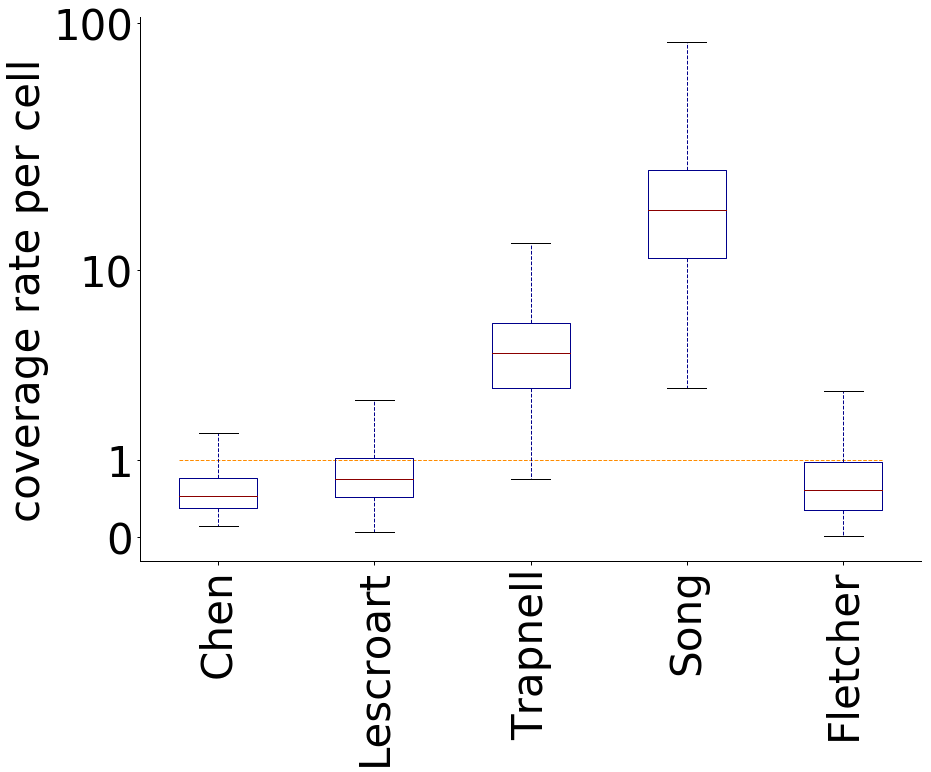

In [12]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher']

scp.plot_boxplot([np.log10(chen_c+1),np.log10(lescroart_c+1), np.log10(trapnell_c+1), np.log10(song_c+1), np.log10(das_c+1)], 
                 'coverage rate per cell', dset_names, 
                 'Cj_per_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots/figure3/')

plt.show()

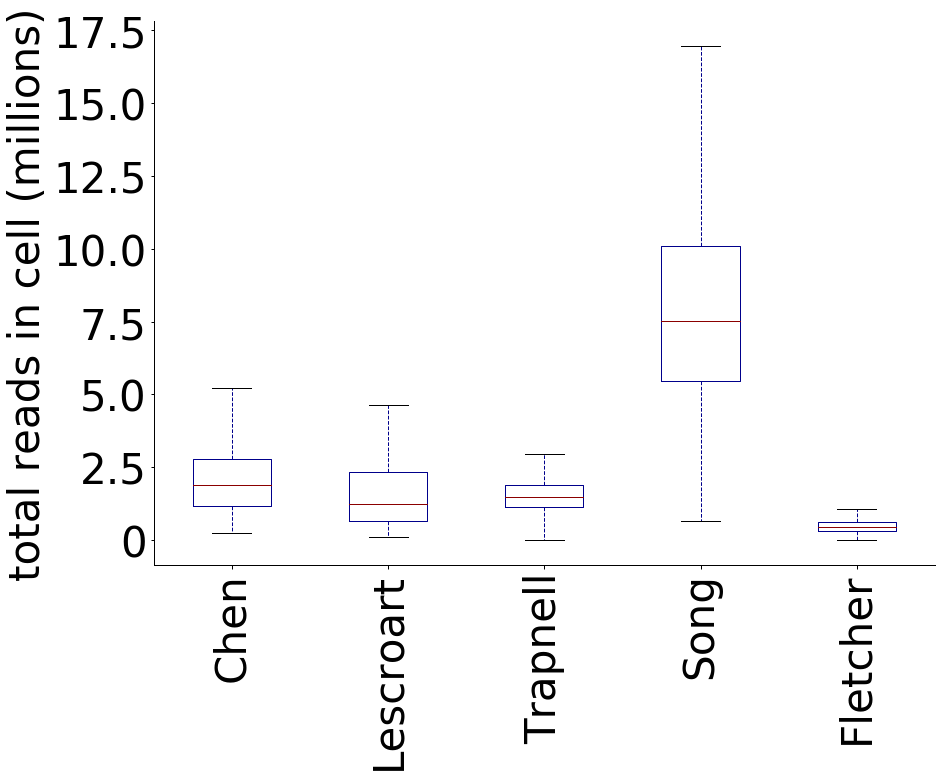

In [13]:
read_counts_chen = chen_star_tab.sum(axis=0)
read_counts_song = song_star_tab.sum(axis=0)
read_counts_trapnell = trapnell_star_tab.sum(axis=0)
read_counts_lescroart = lescroart_star_tab.sum(axis=0)
read_counts_das = das_star_tab.sum(axis=0)

reads_df = [read_counts_chen, read_counts_lescroart, read_counts_trapnell, 
                      read_counts_song, read_counts_das]


scp.plot_boxplot(reads_df, 'total reads in cell (millions)', dset_names, 'total_reads_boxplot', 
                 ylocs =[0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], 
                 ytags = ['0', '2.5', '5.0', '7.5', '10.0', '12.5', '15.0', '17.5'], save_dir='plots/figure3/')


plt.show()

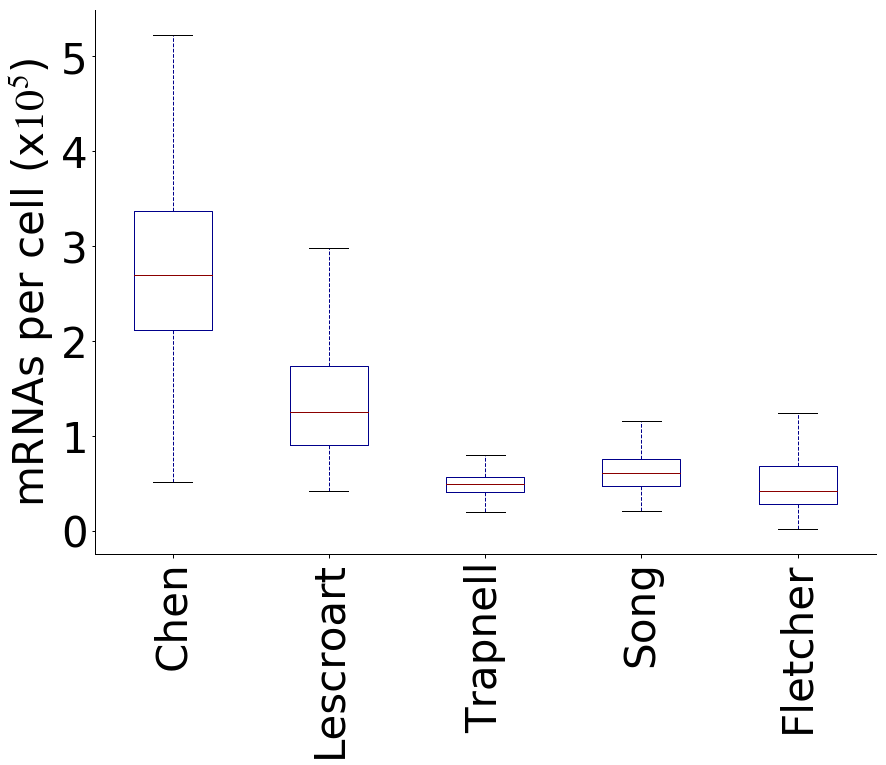

In [14]:
cuentas_chen = chen_mrna_counts.sum(axis=0)
cuentas_song = song_mrna_counts.sum(axis=0)
cuentas_trapnell = trapnell_mrna_counts.sum(axis=0)
cuentas_lescroart = lescroart_mrna_counts.sum(axis=0)
cuentas_das = das_mrna_counts.sum(axis=0)

cuentas_df = [cuentas_chen, cuentas_lescroart, cuentas_trapnell, cuentas_song, cuentas_das]
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher']


scp.plot_boxplot(cuentas_df, 'mRNAs per cell (x$10^5$)', dset_names, 'mrna_cells_boxplot', xlocs = np.array([1, 2, 3, 4, 5]),
                 ylocs=[0, 100000, 200000, 300000, 400000, 500000], 
                 ytags=['0', '1', '2', '3', '4', '5'], save_dir='plots/figure3/')

plt.show()

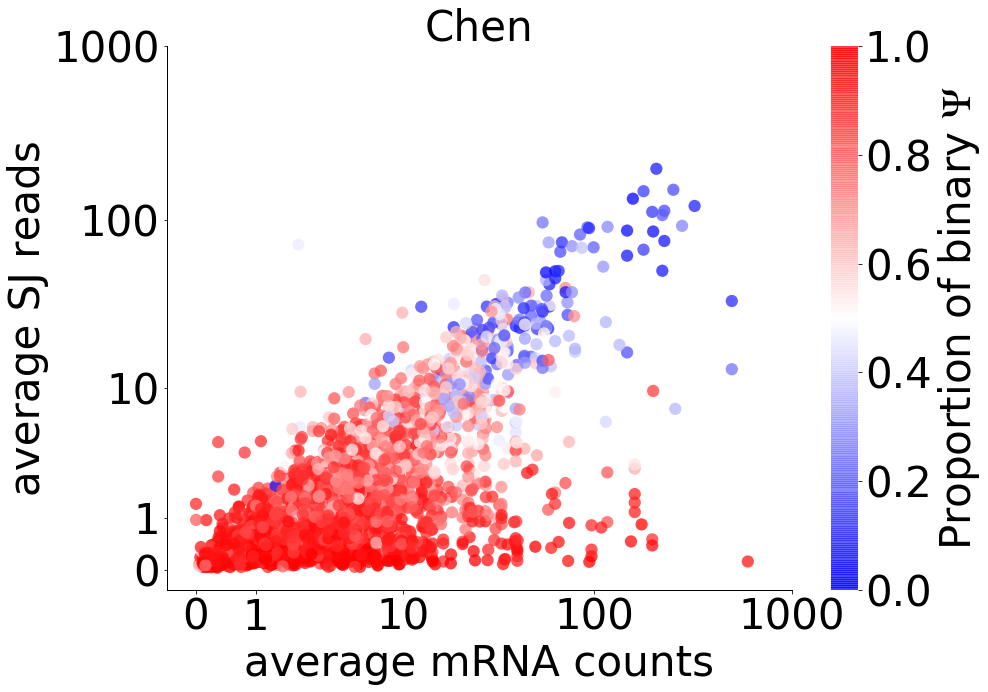

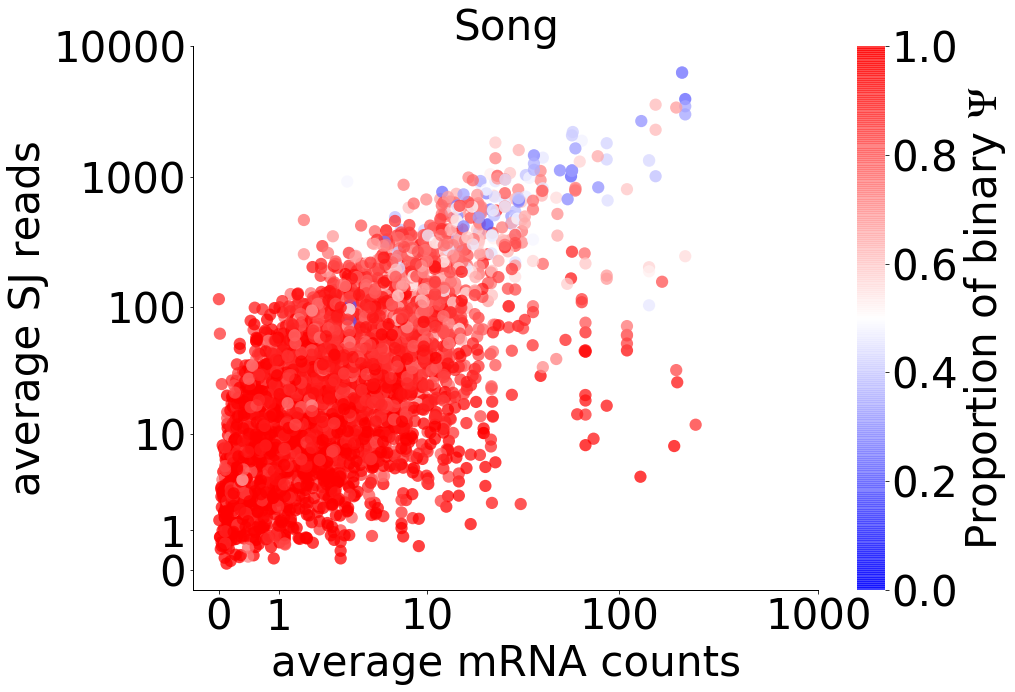

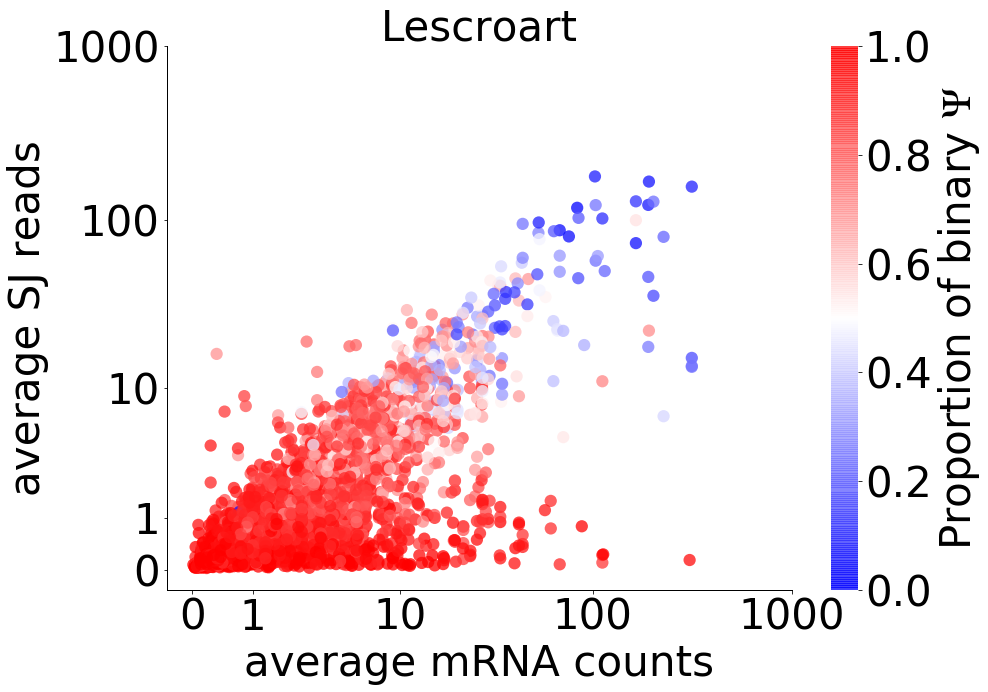

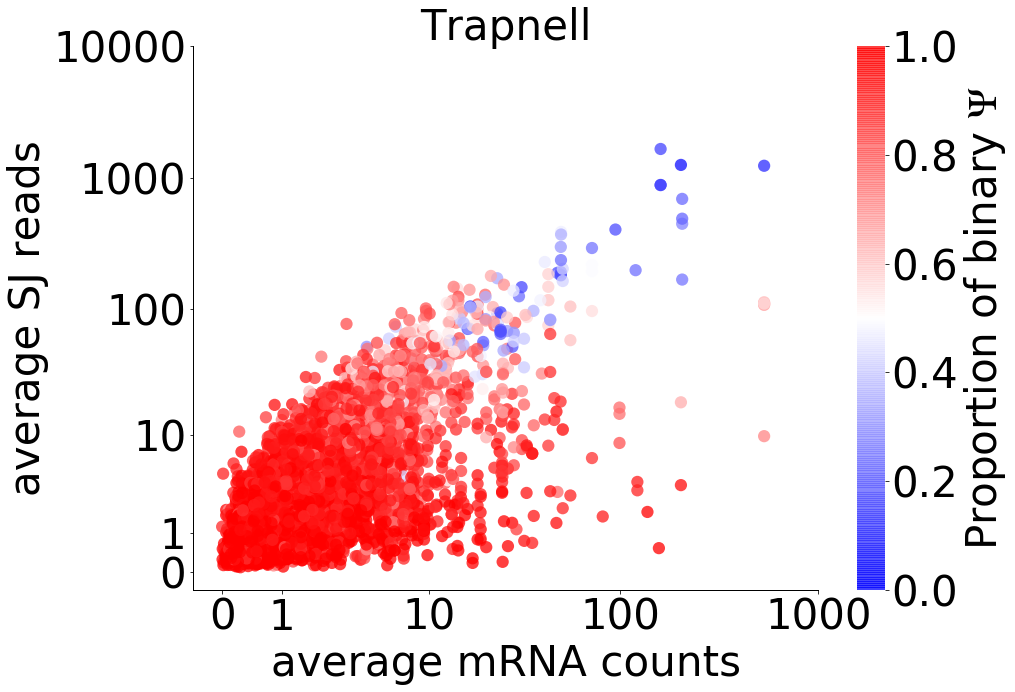

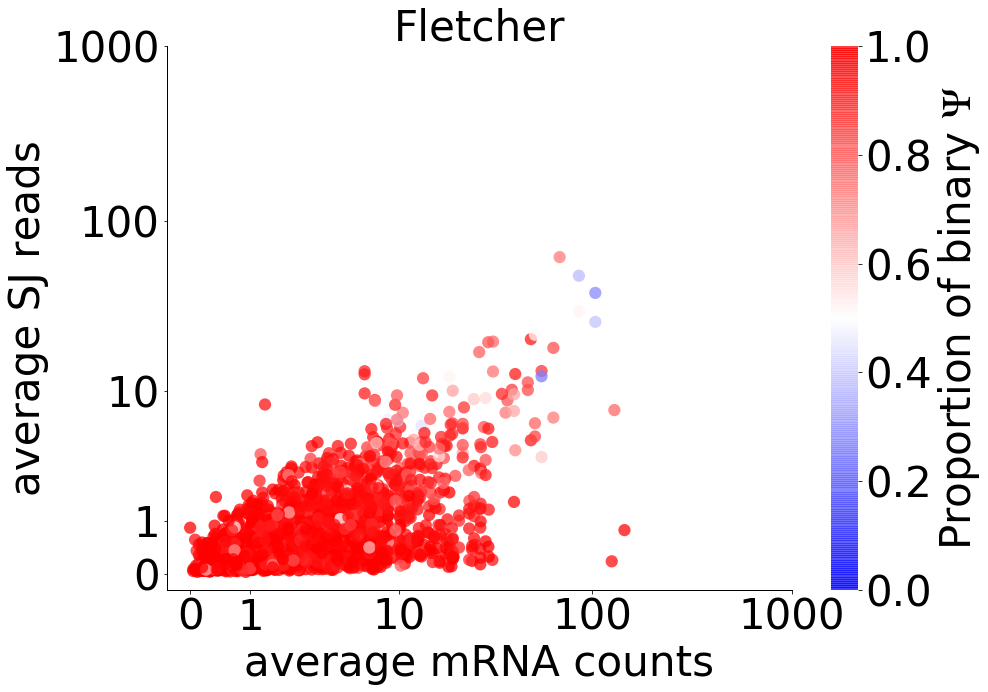

In [15]:
scp.plot_information_map2(mrna_chen, reads_chen, binary_chen, crpm_chen, 'Chen', 
                         [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', 
                         mrna_min = 10, read_min = (10*chen_c).mean(), save_name = 'chen_binary_median',
                         plot_dir = 'plots/figure3/')


scp.plot_information_map2(mrna_song, reads_song, binary_song, crpm_song, 'Song',
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', max_x = 3, max_y = 4,
                        save_name = 'song_binary_median', mrna_min = 10, read_min=(10*song_c).mean(),
                         plot_dir = 'plots/figure3/')

scp.plot_information_map2(mrna_lescroart, reads_lescroart, binary_lescroart, 
                         crpm_lescroart, 'Lescroart', 
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'lescroart_binary_median', mrna_min = 10, 
                         read_min=(10*lescroart_c).mean(), plot_dir = 'plots/figure3/')

scp.plot_information_map2(mrna_trapnell, reads_trapnell, binary_trapnell, crpm_trapnell, 
                     'Trapnell',  [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', save_name = 'trapnell_binary_median', 
                          max_x = 3, max_y = 4, mrna_min = 10, read_min=(10*trapnell_c).mean(),
                         plot_dir = 'plots/figure3/')

scp.plot_information_map2(mrna_das, reads_das, binary_das, crpm_das, 
                     'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'fletcher_binary_median', mrna_min = 10, read_min=(10*das_c).mean(),
                         plot_dir = 'plots/figure3/')

plt.show()

In [16]:
chen_int = [x for x in chen_int_exons if x in mrna_per_event_chen.index]
song_int = [x for x in song_int_exons if x in mrna_per_event_song.index]
trapnell_int = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]
lescroart_int = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

chen_filter = (chen_read_counts.loc[chen_int, chen_c.index] >= (10*chen_c*(1+chen_PSI.loc[chen_int, chen_c.index])))
chen_mrna_filter = (mrna_per_event_chen.loc[chen_int, chen_c.index] >= 10)
chen_quality = ((chen_mrna_filter & chen_filter).mean(axis=1) >= 0.5)
chen_good_exons = chen_quality.loc[chen_quality].index

song_filter = (song_read_counts.loc[song_int, song_c.index] >= (10*song_c*(1+song_PSI.loc[song_int, song_c.index])))
song_mrna_filter = (mrna_per_event_song.loc[song_int, song_c.index] >= 10)
song_quality = ((song_mrna_filter & song_filter).mean(axis=1) >= 0.5)
song_good_exons = song_quality.loc[song_quality].index

trapnell_filter = (trapnell_read_counts.loc[trapnell_int, 
                                            trapnell_c.index] >= (10*trapnell_c*(1+trapnell_PSI.loc[trapnell_int, 
                                                                                                    trapnell_c.index])))
trapnell_mrna_filter = (mrna_per_event_trapnell.loc[trapnell_int, trapnell_c.index] >= 10)
trapnell_quality = ((trapnell_mrna_filter & trapnell_filter).mean(axis=1) >= 0.5)
trapnell_good_exons = trapnell_quality.loc[trapnell_quality].index

lescroart_filter = (lescroart_read_counts.loc[lescroart_int, 
                                              lescroart_c.index] >= (10*lescroart_c*(1+lescroart_PSI.loc[lescroart_int, 
                                                                                                         lescroart_c.index])))
lescroart_mrna_filter = (mrna_per_event_lescroart.loc[lescroart_int, lescroart_c.index] >= 10)
lescroart_quality = ((lescroart_mrna_filter & lescroart_filter).mean(axis=1) >= 0.5)
lescroart_good_exons = lescroart_quality.loc[lescroart_quality].index

In [17]:
chen_filter_both = (chen_filter.loc[chen_good_exons] & chen_mrna_filter.loc[chen_good_exons])
song_filter_both = (song_filter.loc[song_good_exons] & song_mrna_filter.loc[song_good_exons])

mrna_per_event_chen_f = mrna_per_event_chen.loc[chen_good_exons].mask(~chen_filter_both)
chen_read_counts_f = chen_read_counts.loc[chen_good_exons].mask(~chen_filter_both)
chen_PSI_f = chen_PSI.loc[chen_good_exons].mask(~chen_filter_both)

mrna_per_event_song_f = mrna_per_event_song.loc[song_good_exons].mask(~song_filter_both)
song_read_counts_f = song_read_counts.loc[song_good_exons].mask(~song_filter_both)
song_PSI_f = song_PSI.loc[song_good_exons].mask(~song_filter_both)



chen_filtered_binary = ((chen_PSI_f == 1) | (chen_PSI_f == 0)).sum(axis=1) / (~chen_PSI_f.isnull()).sum(axis=1)
chen_filtered_mrna_counts = mrna_per_event_chen_f.mean(axis=1)
chen_filtered_read_counts = chen_read_counts_f.mean(axis=1)

song_filtered_binary = ((song_PSI_f == 1) | (song_PSI_f == 0)).sum(axis=1) / (~song_PSI_f.isnull()).sum(axis=1)
song_filtered_mrna_counts = mrna_per_event_song_f.mean(axis=1)
song_filtered_read_counts = song_read_counts_f.mean(axis=1)



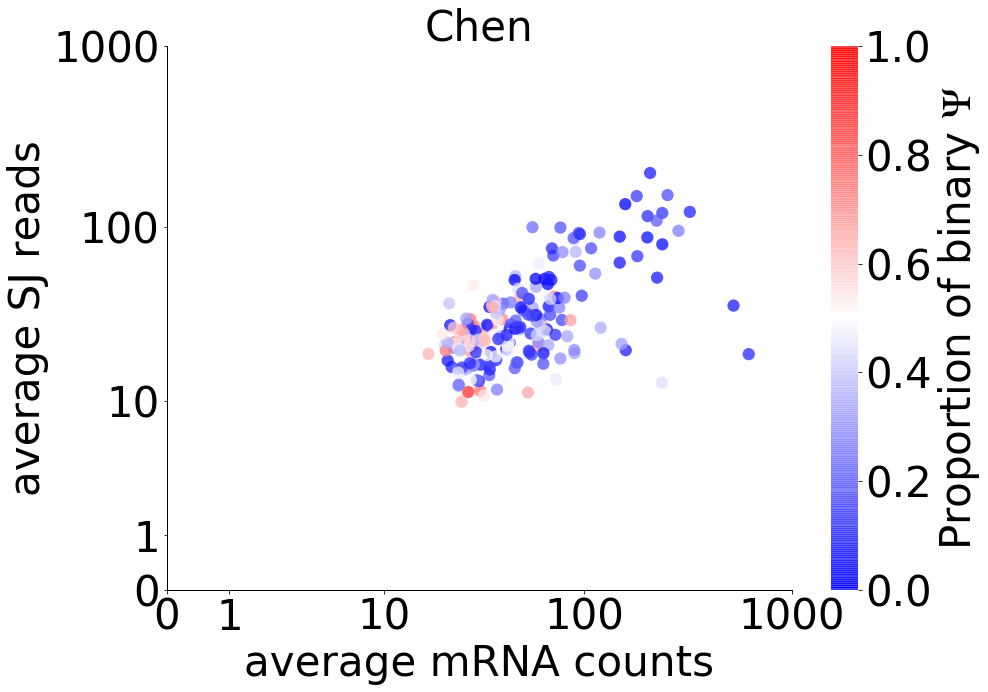

In [18]:
fig = plt.figure(figsize=(14,10))
ax  = plt.subplot(1,1,1)
    
    
sc = ax.scatter(np.log10(chen_filtered_mrna_counts+1), 
            np.log10(chen_filtered_read_counts+1), 
            c=chen_filtered_binary, cmap='bwr', vmin=0, vmax=1, 
            alpha=0.75, s=150, edgecolors='none', )

xlocs = np.array([0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)])
xnewLabels = np.array(['0', '1', '10', '100', '1000'])
plt.xticks(xlocs, xnewLabels)
plt.yticks(xlocs, xnewLabels)


plt.title('Chen', fontsize = 42)
plt.ylabel('average SJ reads', fontsize=42)
plt.xlabel('average mRNA counts', fontsize=42)
cb = plt.colorbar(sc)
cb.set_label(label='Proportion of binary $\Psi$', size=42)
cb.ax.tick_params(labelsize=42)

cb.outline.set_visible(False)

ax.tick_params(labelsize=42)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('plots/figure3/figure_3d_filtered.svg', bbox_inches='tight')
plt.savefig('plots/figure3/figure_3d_filtered.pdf', bbox_inches='tight')
plt.savefig('plots/figure3/figure_3d_filtered.png', dpi=300, bbox_inches='tight')


plt.show()

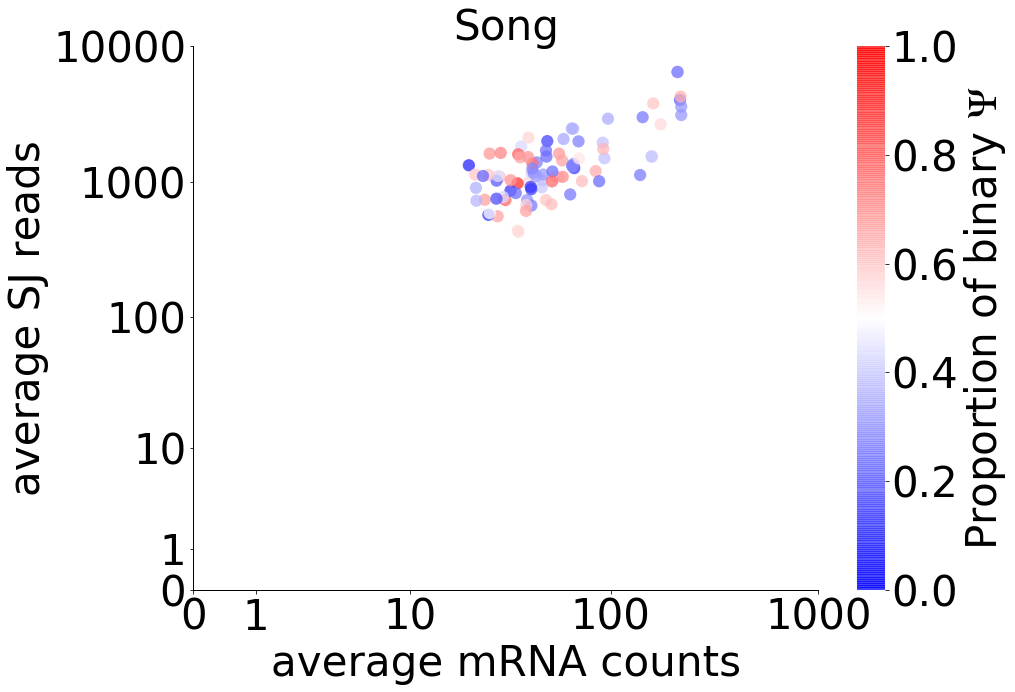

In [19]:
fig = plt.figure(figsize=(14,10))
ax  = plt.subplot(1,1,1)
    
    
sc = ax.scatter(np.log10(song_filtered_mrna_counts+1), 
            np.log10(song_filtered_read_counts+1), 
            c=song_filtered_binary, cmap='bwr', vmin=0, vmax=1, 
            alpha=0.75, s=150, edgecolors='none', )

xlocs = np.array([0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)])
xnewLabels = np.array(['0', '1', '10', '100', '1000'])
plt.xticks(xlocs, xnewLabels)

ylocs = np.array([0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)])
ynewLabels = np.array(['0', '1', '10', '100', '1000', '10000'])
plt.yticks(ylocs, ynewLabels)


plt.title('Song', fontsize = 42)
plt.ylabel('average SJ reads', fontsize=42)
plt.xlabel('average mRNA counts', fontsize=42)
cb = plt.colorbar(sc)
cb.set_label(label='Proportion of binary $\Psi$', size=42)
cb.ax.tick_params(labelsize=42)

cb.outline.set_visible(False)

ax.tick_params(labelsize=42)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('plots/figure3/figure_3c_filtered.svg', bbox_inches='tight')
plt.savefig('plots/figure3/figure_3c_filtered.pdf', bbox_inches='tight')
plt.savefig('plots/figure3/figure_3c_filtered.png', dpi=300, bbox_inches='tight')

plt.show()

In [20]:
def plot_k_eigenvalues(psi_tab, int_exons, mrna_tab, rpm_tab, reads_tab, dset_name,
                       mrna_min, read_min, k, title, save_name, cell_min=0.5, impute=False):
    
    figsize(36,10)
    fig = plt.figure()
    #fig.suptitle(title, fontsize=14)
    
    gs = GridSpec(1,3)
    
    for m in range(len(psi_tab)):
        
        ax = fig.add_subplot(gs[0,m])
    
        mrna_eig_1 = []
        mrna_only_eig_1 = []
        read_eig_1 = []

        mrna_eig_1, mrna_only_eig_1, read_eig_1, nf_eig_1, nofilter_eig_1 = top_eigen_filter_k(psi_tab[m], int_exons[m], mrna_tab[m], 
                                                                         rpm_tab[m], reads_tab[m], 
                                                                     mrna_min, read_min, k, cell_min, impute)

        ax.set_ylim((-0.05,0.85))
        
        plt.tick_params(axis='both', which='major', labelsize=42)


        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.set_xlabel('k-eigenvalues',fontsize = 42)
        
        
        ax.plot(range(k), nofilter_eig_1, c='purple', linestyle=':', linewidth=3, label='no filter')
        ax.plot(range(k), nf_eig_1, c='darkorange', linestyle=':', linewidth=3, label='random filter')    
        ax.plot(range(k), mrna_only_eig_1, c='forestgreen', linestyle='--', linewidth=3, label='mRNA')
        ax.plot(range(k), read_eig_1, c='darkred', linestyle='-.', linewidth=3, label='reads')
        ax.plot(range(k), mrna_eig_1, c='navy', linewidth=3, label='mRNA & reads')
        
        if m == 0:
            ax.set_ylabel('variance from k eigenvalues',fontsize = 42)
            ax.legend(frameon=False, fontsize=42)
            
            
        xlocs = np.array([0,4, 9])
        xnewLabels = np.array(['1', '5', '10'])
        plt.xticks(xlocs, xnewLabels)

        

    
    plt.savefig('plots/figure3/'+save_name+'.svg', bbox_inches='tight')
    plt.savefig('plots/figure3/'+save_name+'.pdf', bbox_inches='tight')
    plt.savefig('plots/figure3/'+save_name+'.png', dpi=300, bbox_inches='tight')
    
    
    
def get_zscore(dataframe, cap=3):
    zdf = pd.DataFrame(zscore(dataframe, axis=1))
    zdf.columns = dataframe.columns
    zdf.index = dataframe.index
    zdf_frame = cap*(zdf >= cap) + zdf*(zdf < cap)
    zdf_frame = -cap*(zdf <= -cap) + zdf_frame*(zdf > -cap)
    return zdf_frame.astype(float)


def get_zscore2(df):
    #df['zscore'] = (df.a - df.a.mean())/df.a.std(ddof=0)
    z_table = (df.T - df.mean(axis=1))/df.T.std(ddof=0)
    #z_table = df.T
    
    zdf = 3*(z_table >= 3) + z_table*(z_table < 3)
    zdf = -3*(z_table <= -3) + zdf*(z_table > -3)
    zdf = zdf.astype(float)
    return z_table.T



In [21]:
def top_eigen_filter_k(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, read_min, k,
                     cell_min=0.5, impute=False, return_filtered_table = False):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]
    
    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min)
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index
    
    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]
    
    print(len(good_exons))
    
    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    if impute:
        PSI_mrna_filtered = PSI_mrna_filtered.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
        PSI_mrna_z = get_zscore(PSI_mrna_filtered)
        
    else:
        PSI_mrna_z = get_zscore2(PSI_mrna_filtered)
        
    if return_filtered_table:
        return PSI_mrna_z
        
        
    print(PSI_mrna_z.shape)
    
    
        
    
    
    quality_m = (mrna_filter.mean(axis=1) >= cell_min)
    good_exons_m = quality_m.loc[quality_m].index
    filter_tab_m = mrna_filter.loc[good_exons_m]
    psi_tab_mrna_only = psi_tab.loc[good_exons_m]


    PSI_filtered_mrna_only = psi_tab_mrna_only
    PSI_filtered_mrna_only = psi_tab_mrna_only.mask(~filter_tab_m)
    
    PSI_filtered_mrna_only = PSI_filtered_mrna_only.dropna(how='all')    
    PSI_filtered_imputed_mrna_only = PSI_filtered_mrna_only.loc[PSI_filtered_mrna_only.isnull().mean(axis=1) < (1-cell_min)]
    mrna_order = [x for x in mrna_tab.mean(axis=1).sort_values()[::-1].index if x in PSI_filtered_imputed_mrna_only.index]
    #PSI_filtered_imputed_mrna_only = PSI_filtered_imputed_mrna_only.loc[mrna_order[:total_exons]]
    if impute:
        PSI_filtered_imputed_mrna_only = PSI_filtered_imputed_mrna_only.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
        #print(PSI_filtered_imputed_mrna_only.loc[mrna_order[:total_exons]].shape)
        PSI_mrna_only_z = get_zscore(PSI_filtered_imputed_mrna_only)
        
    else:
        #print(PSI_filtered_imputed_mrna_only.loc[mrna_order[:total_exons]].shape)
        PSI_mrna_only_z = get_zscore2(PSI_filtered_imputed_mrna_only)
    
    print(PSI_mrna_only_z.shape)
    
    
    
    read_filter = (reads_tab.loc[int_exons, cj.index] >= read_min)
    quality_r = (read_filter.mean(axis=1) >= cell_min)
    good_exons_r = quality_r.loc[quality_r].index
    filter_tab_r = read_filter.loc[good_exons_r]
    psi_tab_read = psi_tab.loc[good_exons_r]
    
    PSI_read_filtered = psi_tab_read
    PSI_read_filtered = psi_tab_read.mask(~filter_tab_r)
    PSI_read_filtered = PSI_read_filtered.dropna(how='all')
    
    PSI_read_filtered = PSI_read_filtered.loc[PSI_read_filtered.isnull().mean(axis=1) < (1-cell_min)]
    read_order = [x for x in reads_tab.mean(axis=1).sort_values()[::-1].index if x in PSI_read_filtered.index]
    if impute:
        PSI_read_filtered_imputed = PSI_read_filtered.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
        PSI_read_z = get_zscore(PSI_read_filtered_imputed)
        
    else:
        PSI_read_z = get_zscore2(PSI_read_filtered)
        
    
    
    
    
    print(PSI_read_z.shape)
    

    
    
    
    
    missing = PSI_mrna_filtered.isnull().sum(axis=0)
    
    missing_read = PSI_read_filtered.isnull().sum(axis=0)
    
   
    
    
    
    missing_max = missing #np.maximum(missing, missing_read)
    
    
    
    
    
    PSI_read_filtered_2 = psi_tab.loc[PSI_mrna_filtered.index]
    
    missing_ = PSI_read_filtered_2.isnull().sum(axis=0)
            
    fix_read = missing - missing_
    
    for cell in PSI_read_filtered_2.columns:
        cell_not_missing = PSI_read_filtered_2[cell].dropna().index
        
        remove_ = fix_read.loc[cell]
        
        if remove_ > 0:
            targets = r.choice(cell_not_missing, remove_, replace=False)
        
            for t in targets:
                PSI_read_filtered_2.loc[t, cell] = np.nan
    
    
    
    PSI_nf_z = get_zscore2(PSI_read_filtered_2)
    
    print(PSI_nf_z.shape)
    
        
        
        
        
        
    PSI_nofilter_z = get_zscore2(psi_tab)
        
        
        
        
        
        
        
        
        
        
        
        
        
    try:
    
        mrna_cov = PSI_mrna_z.cov()#.fillna(0)
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_mrna = eig(mrna_cov)[0]

        eig_mrna = [(np.sum([x**2 for x in eig_mrna[0:k_+1]]))/(np.sum([x**2 for x in eig_mrna])) for k_ in range(k)]
        
        
        
        mrna_only_cov = PSI_mrna_only_z.cov()#.fillna(0)
        mrna_only_cov = mrna_only_cov[mrna_only_cov.index]
        eig_mrna_only = eig(mrna_only_cov)[0]

        print(len([x for x in PSI_mrna_filtered.index if x in PSI_mrna_only_z.index])/total_exons)

        eig_mrna_only = [(np.sum([x**2 for x in eig_mrna_only[0:k_+1]]))/(np.sum([x**2 for x in eig_mrna_only])) for k_ in range(k)]


        
        read_cov = PSI_read_z.cov()#.fillna(0)
        read_cov = read_cov[read_cov.index]
        eig_read = eig(read_cov)[0]
        print(len([x for x in PSI_mrna_filtered.index if x in PSI_read_z.index])/total_exons)
        eig_read = [(np.sum([x**2 for x in eig_read[0:k_+1]]))/(np.sum([x**2 for x in eig_read])) for k_ in range(k)]
    
        
        
        nf_cov = PSI_nf_z.cov()#.dropna(0)
        nf_cov = nf_cov[nf_cov.index]
        eig_nf = eig(nf_cov)[0]
        #print(len([x for x in PSI_mrna_filtered.index if x in PSI_read_z.index])/total_exons)
        eig_nf = [(np.sum([x**2 for x in eig_nf[0:k_+1]]))/(np.sum([x**2 for x in eig_nf])) for k_ in range(k)]
        
        
        
        
        
        
        nf_cov = PSI_nofilter_z.cov()#.dropna(0)
        nf_cov = nf_cov[nf_cov.index]
        nofilter = eig(nf_cov)[0]
        #print(len([x for x in PSI_mrna_filtered.index if x in PSI_read_z.index])/total_exons)
        eig_nofilter = [(np.sum([x**2 for x in nofilter[0:k_+1]]))/(np.sum([x**2 for x in nofilter])) for k_ in range(k)]
        

        
        
    
    except:
        
        cov_ = PSI_mrna_z.cov()
        prueba = PSI_mrna_z.columns[~(cov_.isnull().sum(axis=1) == len(PSI_mrna_z.columns))]
        prueba_2 = cov_.loc[prueba, prueba].dropna().index
        
        
        
        
        
        
        
        cov_ = PSI_mrna_only_z.cov()
        prueba = PSI_mrna_only_z.columns[~(cov_.isnull().sum(axis=1) == len(PSI_mrna_only_z.columns))]
        prueba_2 = [x for x in cov_.loc[prueba, prueba].dropna().index if x in prueba_2]
        
        
        
        
        
        cov_ = PSI_read_z.cov()
        prueba = PSI_read_z.columns[~(cov_.isnull().sum(axis=1) == len(PSI_read_z.columns))]
        prueba_2 = [x for x in cov_.loc[prueba, prueba].dropna().index if x in prueba_2]
        
        
        
        
        cov_ = PSI_nf_z.cov()
        prueba = PSI_nf_z.columns[~(cov_.isnull().sum(axis=1) == len(PSI_nf_z.columns))]
        prueba_2 = [x for x in cov_.loc[prueba, prueba].dropna().index if x in prueba_2]
        
        
        
        
        ###################
    
        mrna_cov = PSI_mrna_z[prueba_2].cov()
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_mrna = eig(mrna_cov)[0]

        eig_mrna = [(np.sum([x**2 for x in eig_mrna[0:k_+1]]))/(np.sum([x**2 for x in eig_mrna])) for k_ in range(k)]    
    
    
    
        mrna_cov = PSI_mrna_only_z[prueba_2].cov()
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_mrna_only = eig(mrna_cov)[0]

        eig_mrna_only = [(np.sum([x**2 for x in eig_mrna_only[0:k_+1]]))/(np.sum([x**2 for x in eig_mrna_only])) for k_ in range(k)]

        
        
        
        mrna_cov = PSI_read_z[prueba_2].cov()
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_read = eig(mrna_cov)[0]

        eig_read = [(np.sum([x**2 for x in eig_read[0:k_+1]]))/(np.sum([x**2 for x in eig_read])) for k_ in range(k)]
        
        
        
        
        
        mrna_cov = PSI_nf_z[prueba_2].cov()
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_nf = eig(mrna_cov)[0]

        eig_nf = [(np.sum([x**2 for x in eig_nf[0:k_+1]]))/(np.sum([x**2 for x in eig_nf])) for k_ in range(k)]
        
        
        
        
        
        
        mrna_cov = PSI_nofilter_z[prueba_2].cov()
        mrna_cov = mrna_cov[mrna_cov.index]
        eig_nofilter = eig(mrna_cov)[0]

        eig_nofilter = [(np.sum([x**2 for x in eig_nofilter[0:k_+1]]))/(np.sum([x**2 for x in eig_nofilter])) for k_ in range(k)]
        
        
    
    
    return eig_mrna, eig_mrna_only, eig_read, eig_nf, eig_nofilter
    

206
(206, 488)
(465, 488)
(174, 488)
(206, 488)
1.0
0.8155339805825242
54
(54, 309)
(158, 309)
(320, 309)
(54, 309)
88
(86, 202)
(174, 202)
(589, 202)
(86, 202)
1.0
1.0


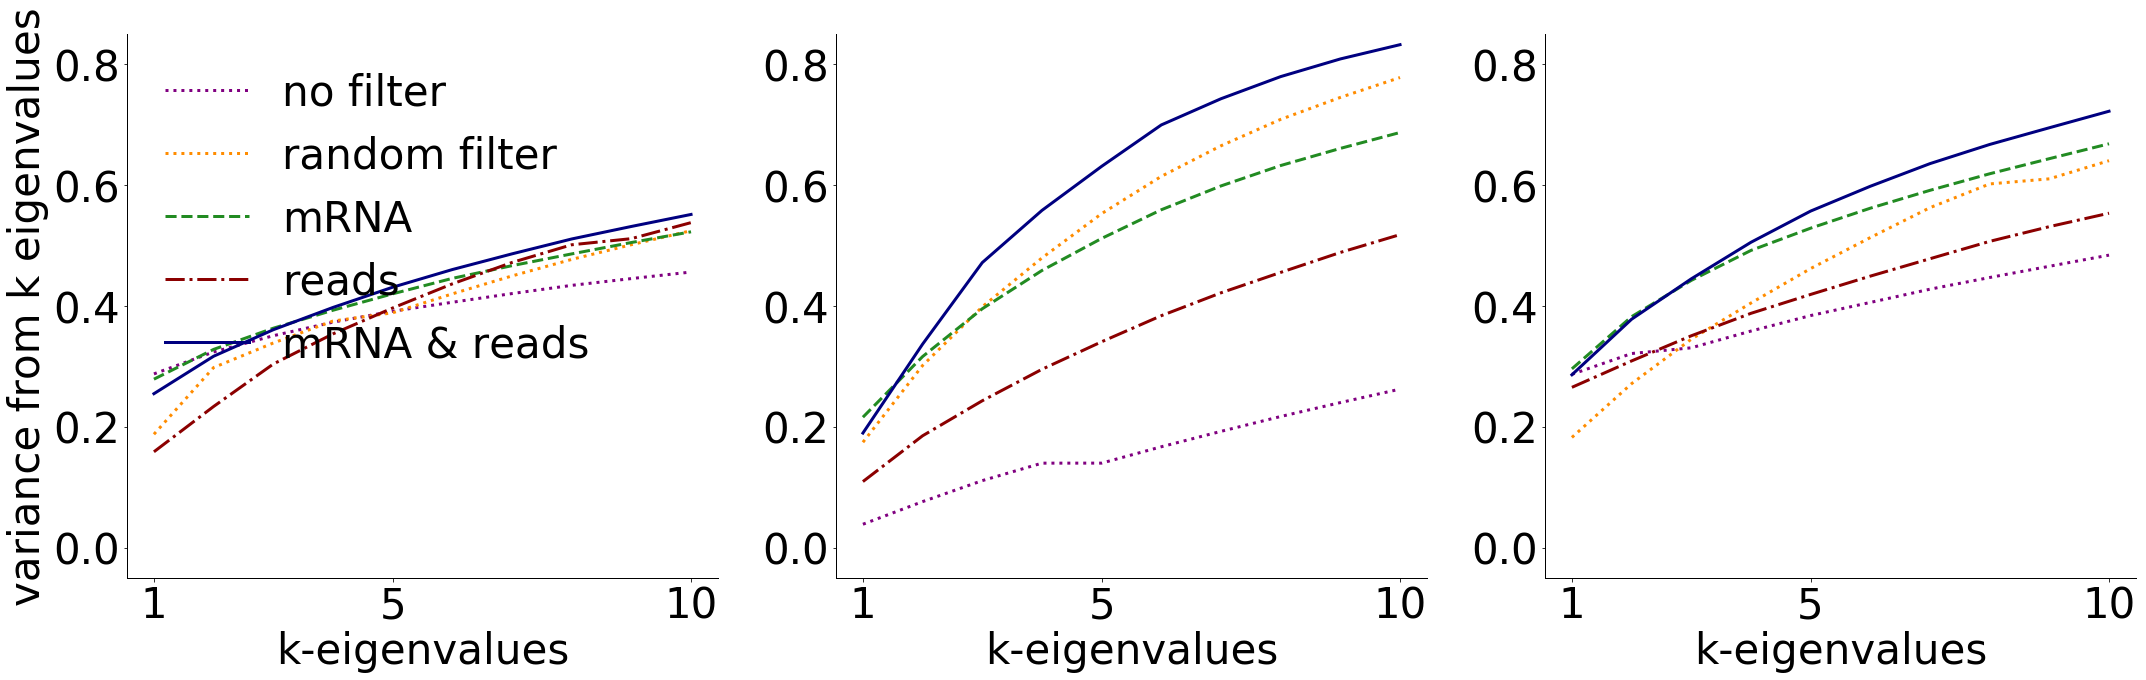

In [22]:
plot_k_eigenvalues([chen_PSI, trapnell_PSI, song_PSI], [chen_int_exons, trapnell_int_exons, song_int_exons],
                 [mrna_per_event_chen, mrna_per_event_trapnell, mrna_per_event_song], 
                 [chen_c, trapnell_c, song_c], [chen_read_counts, trapnell_read_counts, song_read_counts],
                 ['chen', 'trapnell', 'song'], 10, 10, 10,
                  'cell covariance; filter', 'figure_3h_2', cell_min=0.5, impute=False)

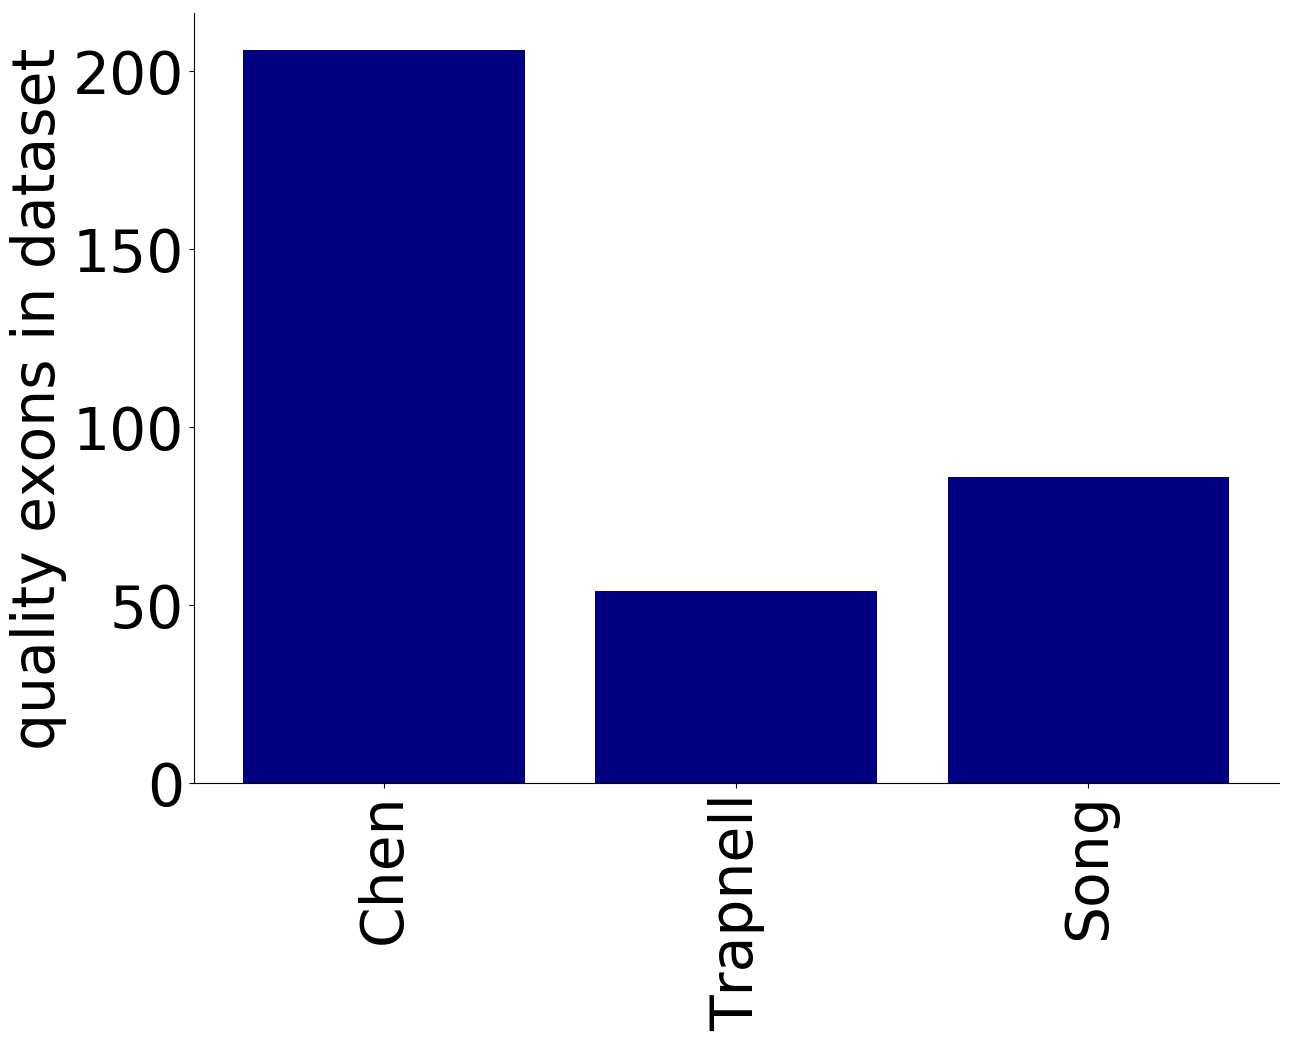

In [23]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(14,8)

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar([1, 2, 3], [206, 54, 86], color='navy')
ax.tick_params(labelsize=42)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)




plt.ylabel("quality exons in dataset", fontsize=42)

locs, labels = plt.yticks()


plt.xticks([1, 2, 3], ['Chen', 'Trapnell', 'Song'], fontsize=42, rotation='vertical')    


plt.savefig('plots/figure3/supplementary_figure3_exon_number.svg', bbox_inches='tight')
plt.savefig('plots/figure3/supplementary_figure3_exon_number.pdf', bbox_inches='tight')
plt.savefig('plots/figure3/supplementary_figure3_exon_number.png', dpi=300, bbox_inches='tight')

plt.show()

In [24]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(chen_pca.line_1, chen_pca.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
    ax.set_xlim([-65, 102])
    ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig('plots/figure3/events/'+event+'.pca.svg', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig('plots/figure3/events/'+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig('plots/figure3/events/'+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    

In [25]:
chen_pca = pd.read_csv('../../../data/chen/chen.pca.tab', sep='\t', index_col=0)
chen_pca = chen_pca.sort_values('pseudotime')
chen_pca.PC2 = -chen_pca.PC2
chen_pca.line_2 = -chen_pca.line_2

chen_PSI = chen_PSI[chen_pca.index]
mrna_per_event_chen = mrna_per_event_chen[chen_pca.index]
chen_c = chen_c.loc[chen_pca.index]
chen_read_counts = chen_read_counts[chen_pca.index]

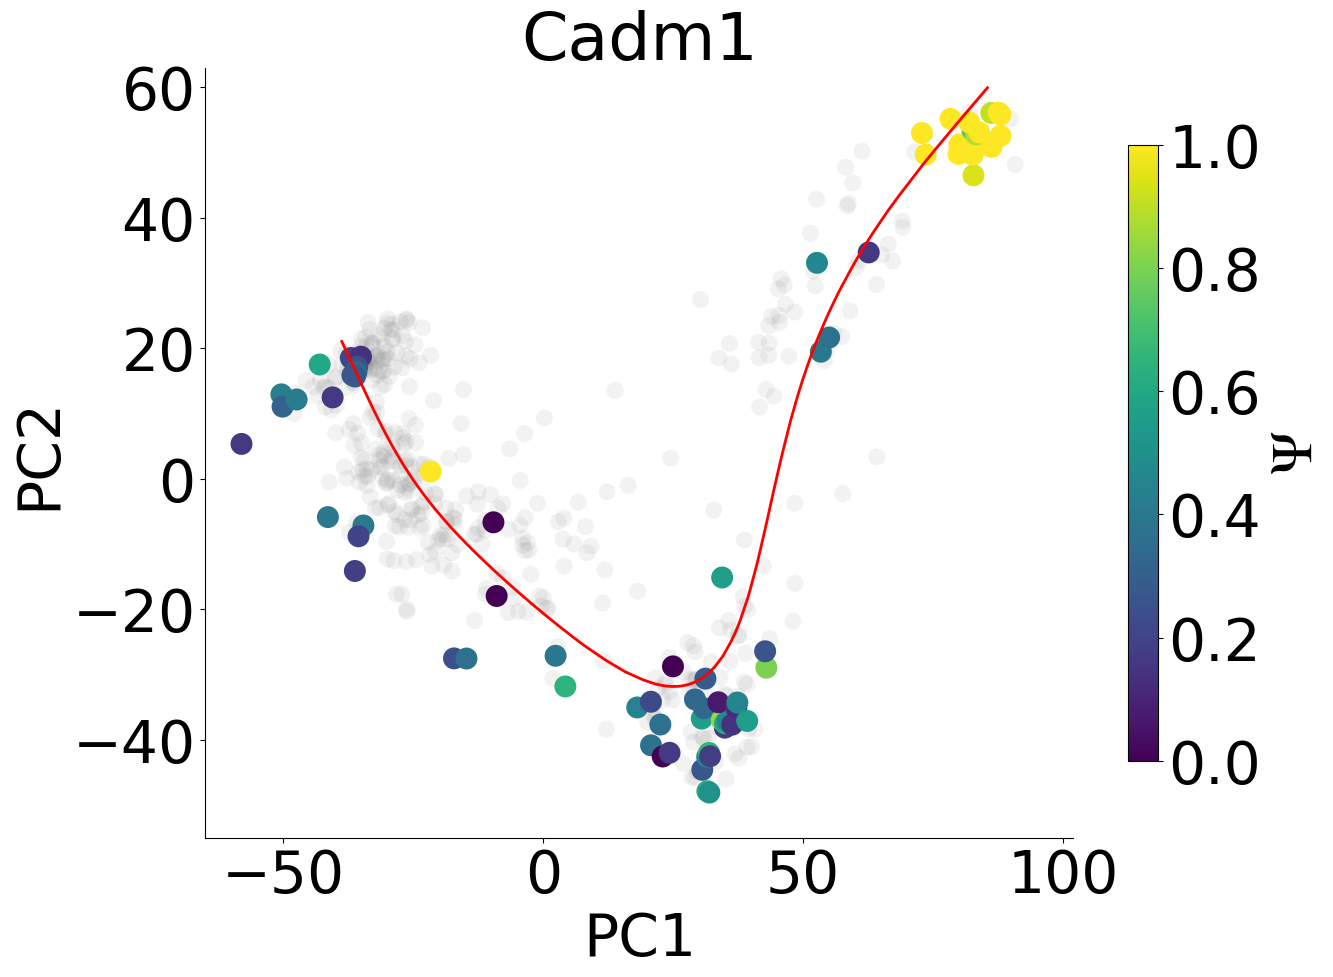

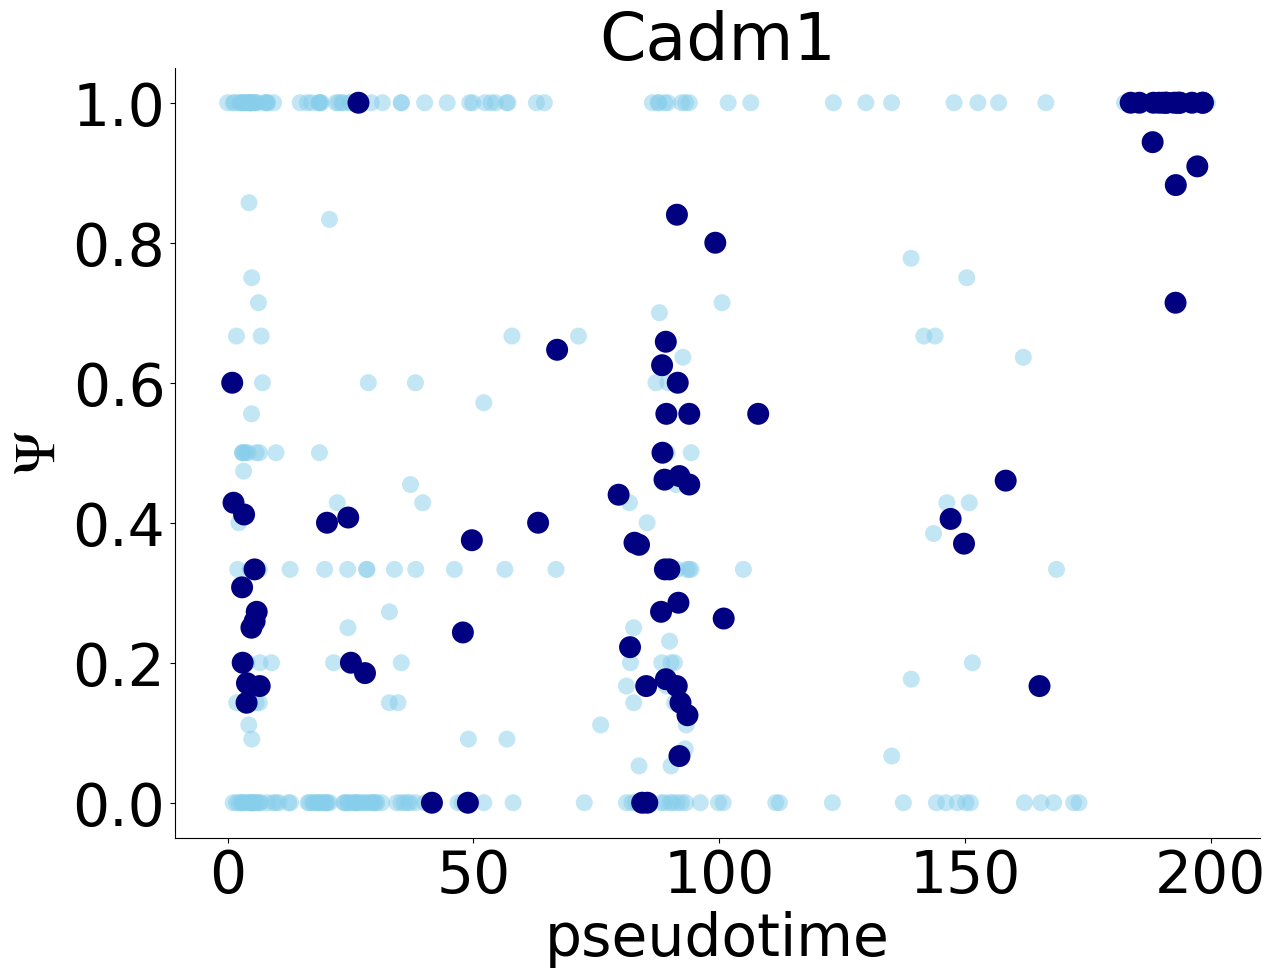

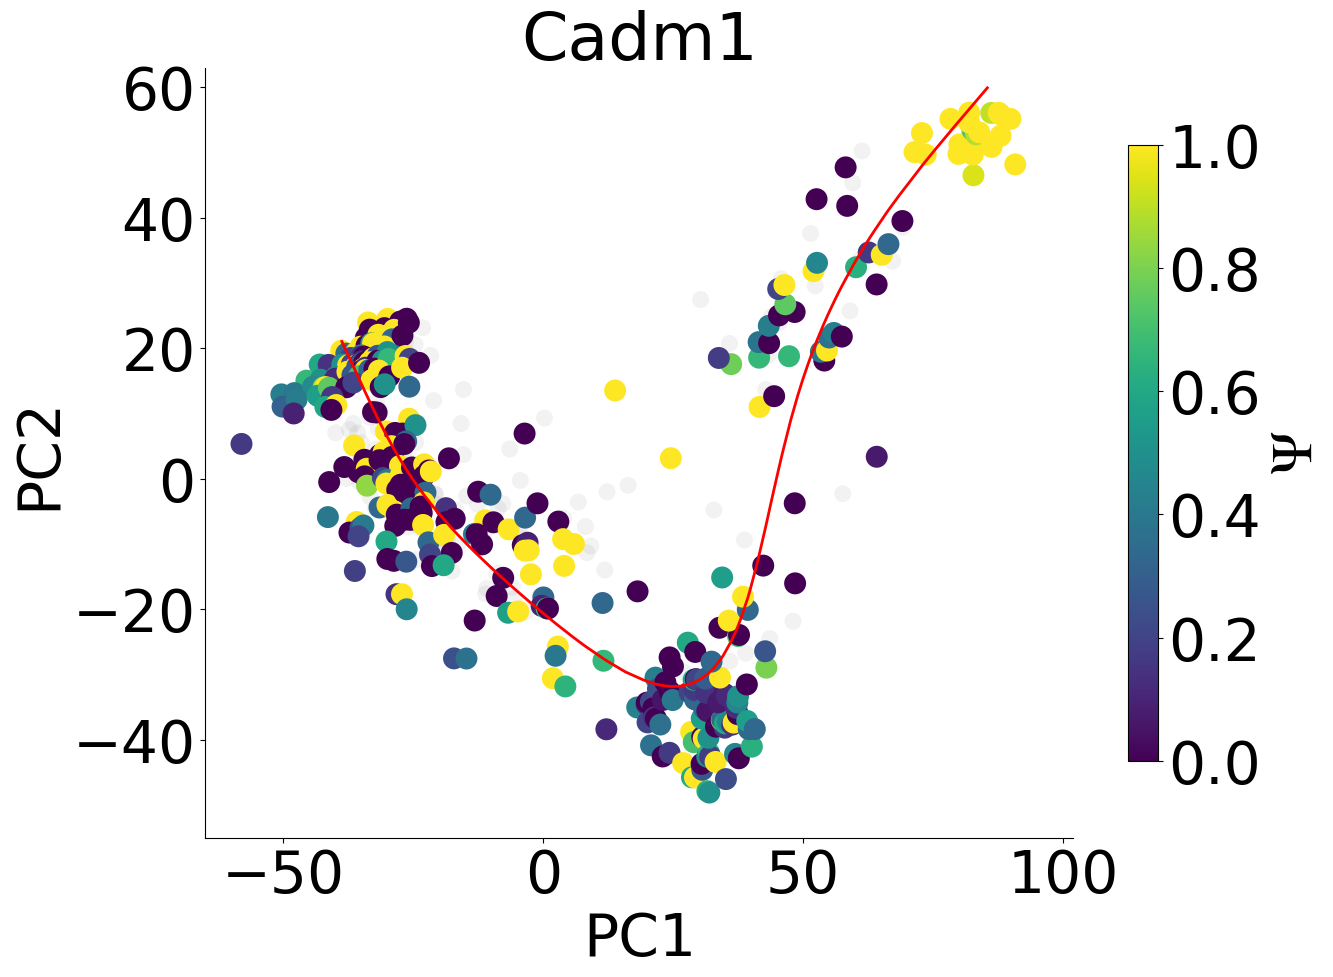

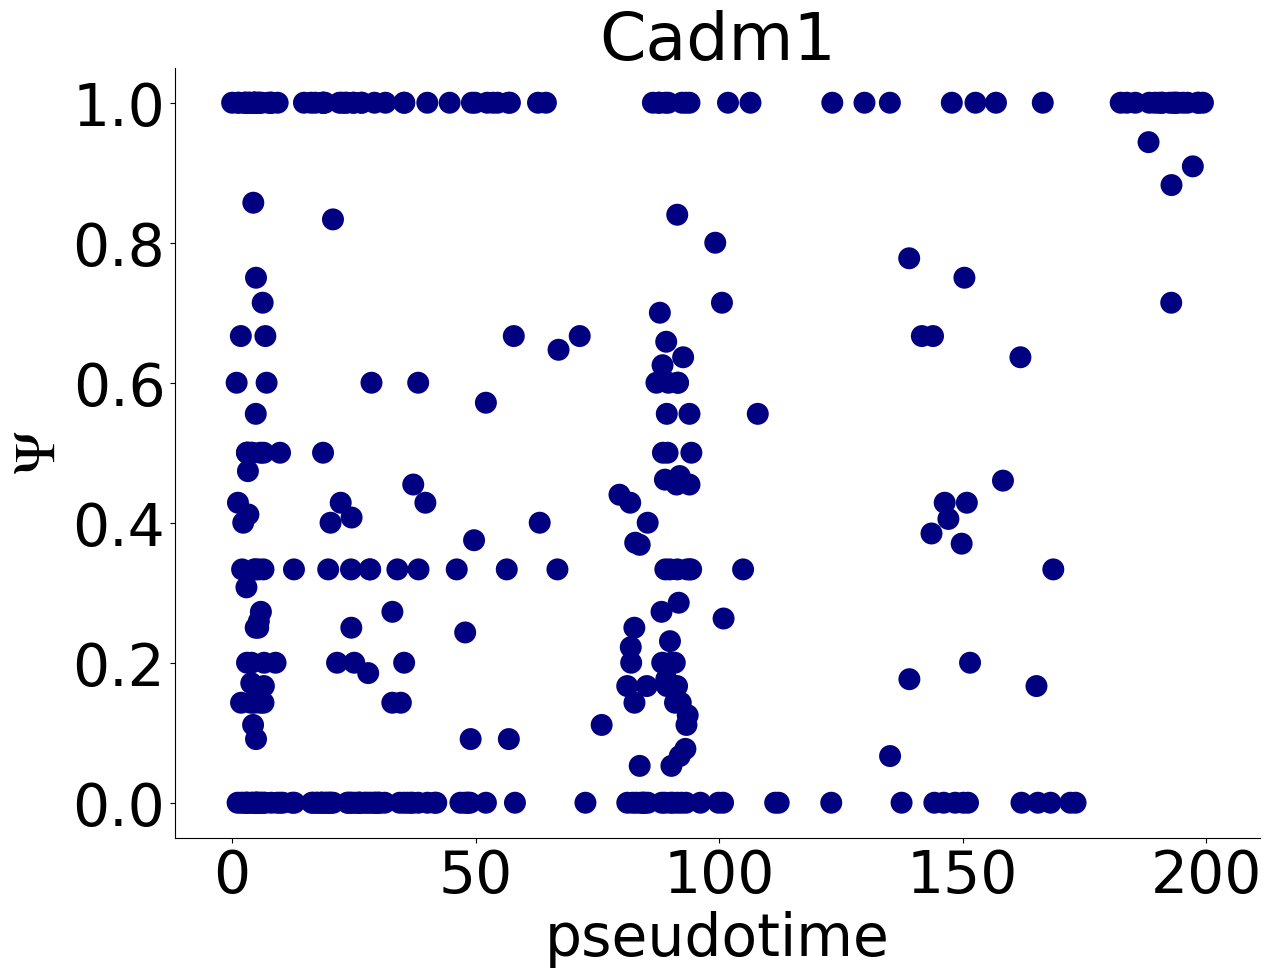

In [26]:
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Cadm1_2', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Cadm1_2', 10, filter_cells=False)

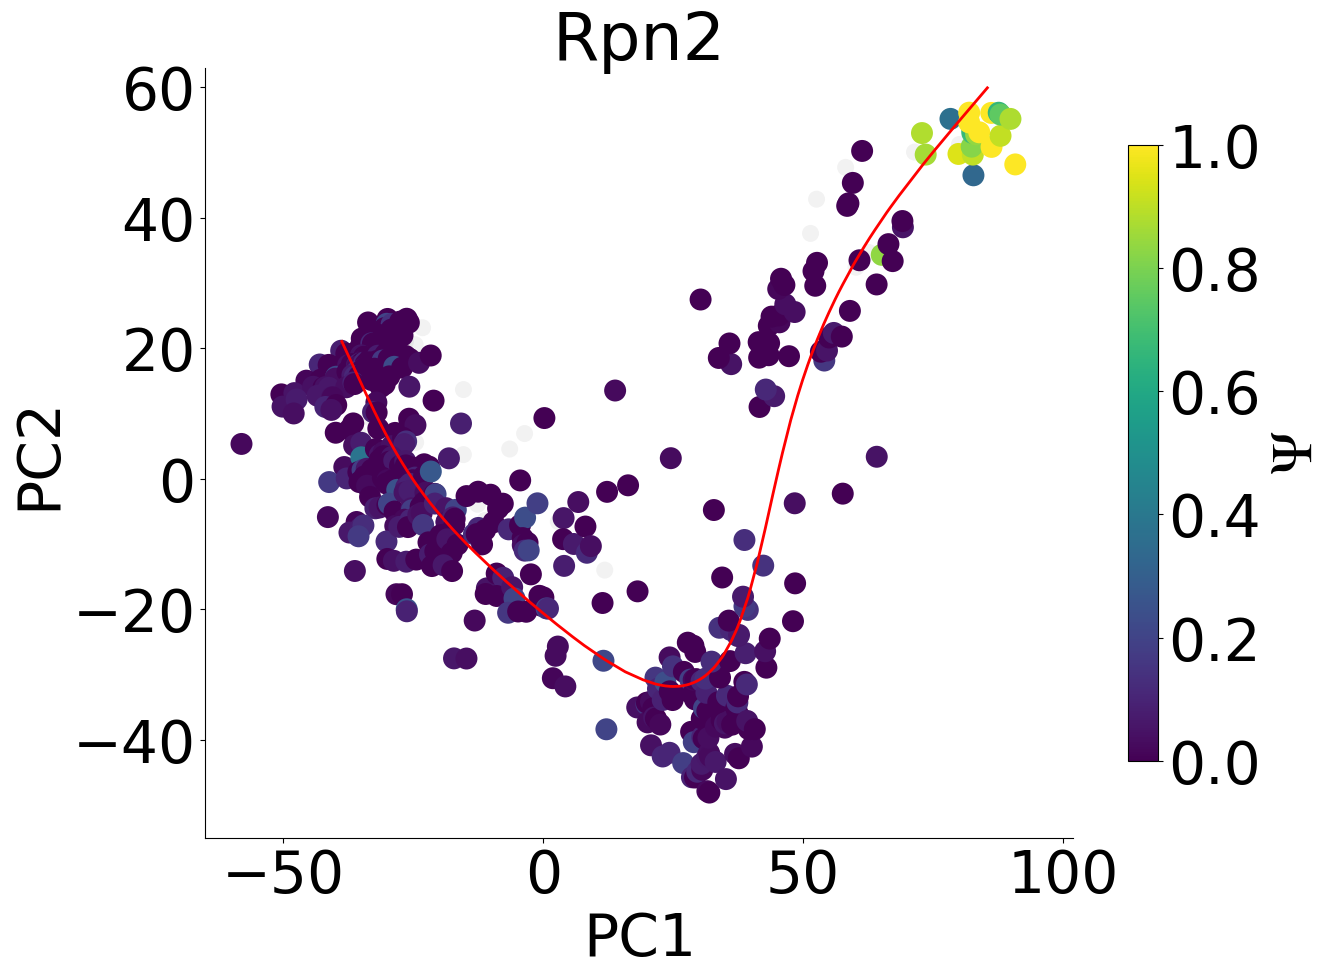

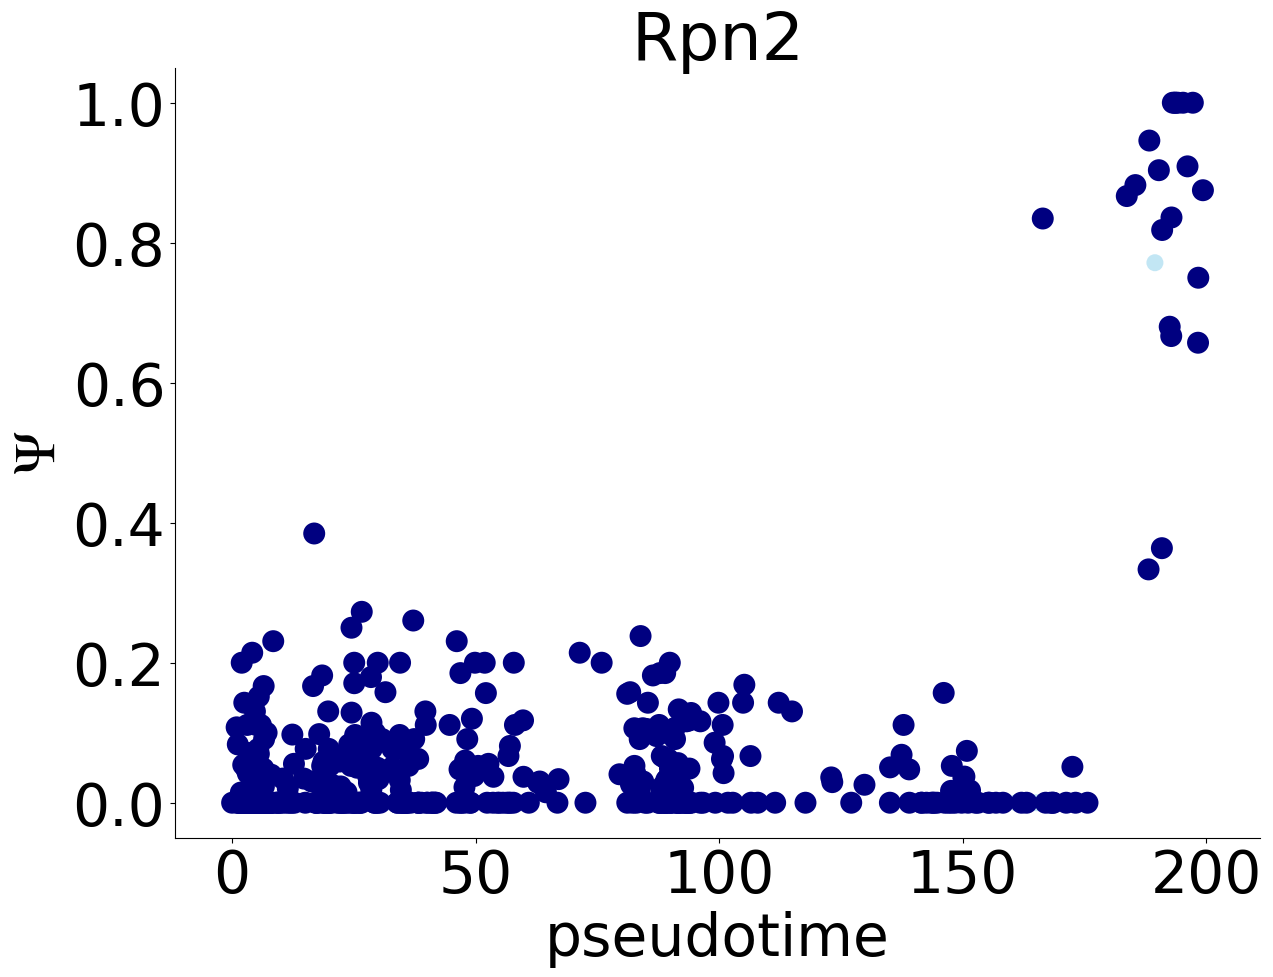

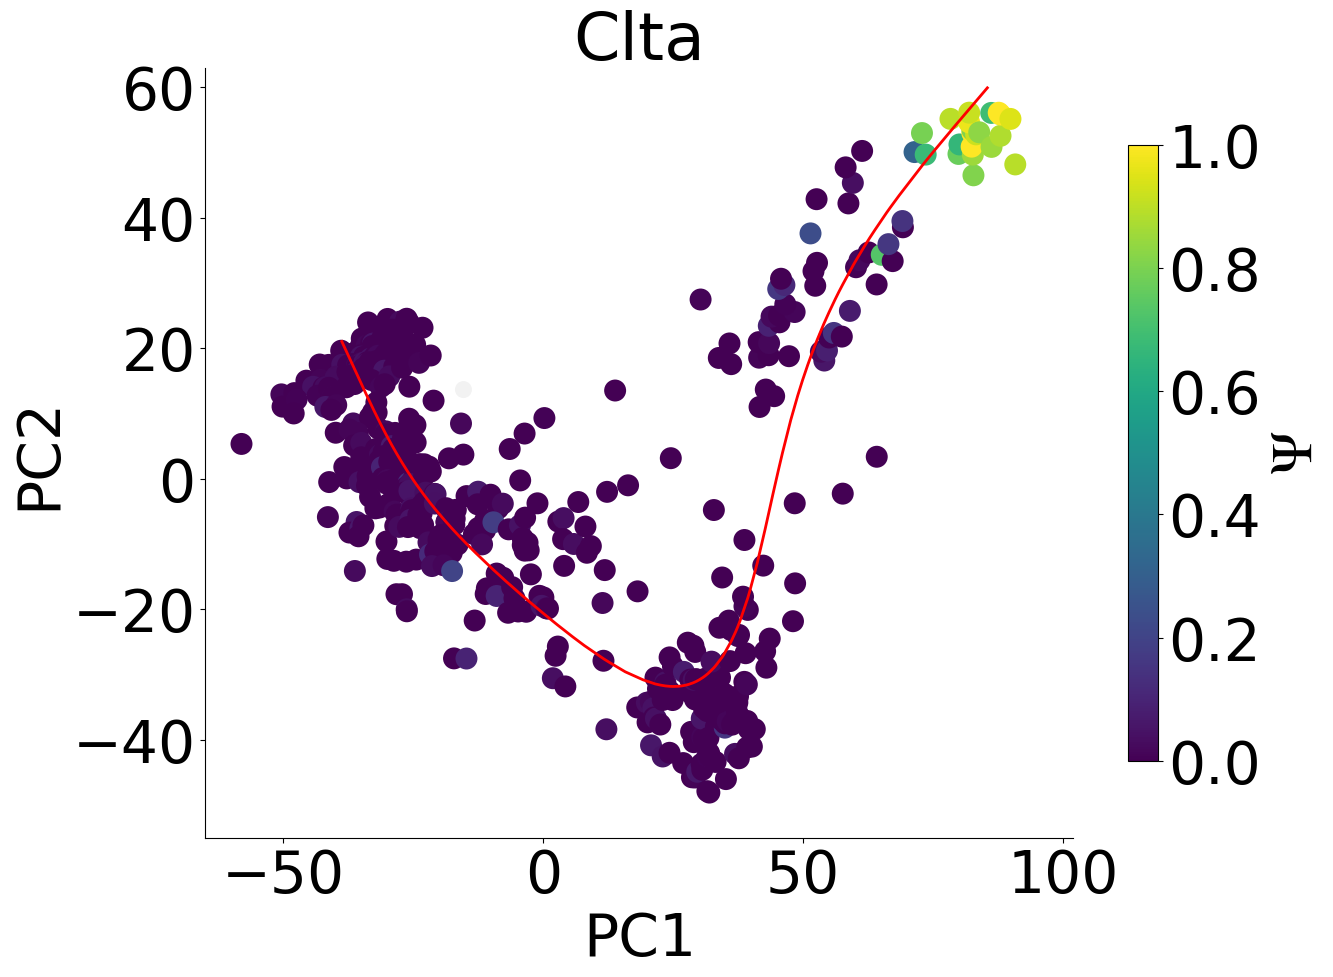

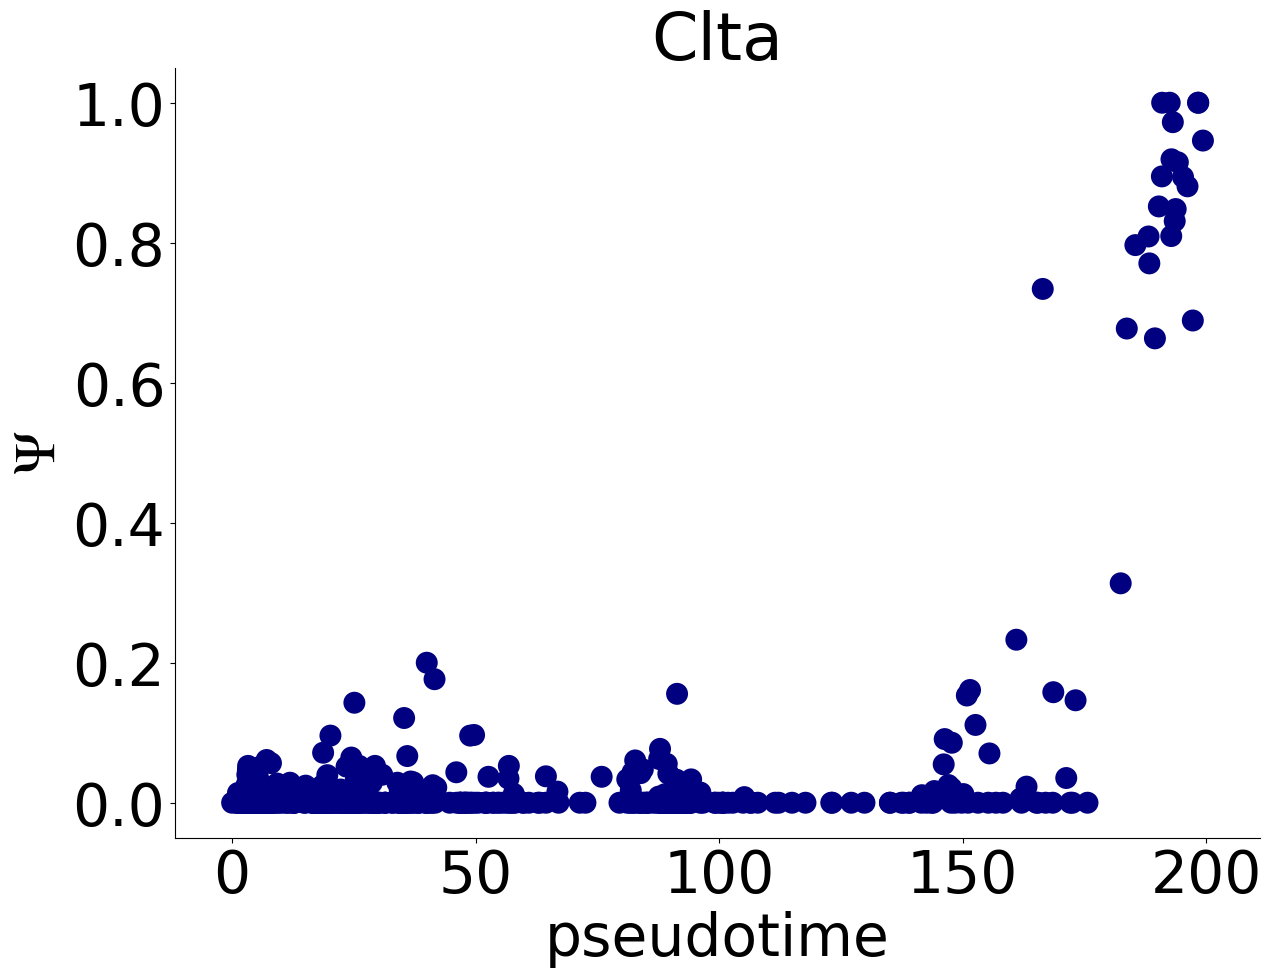

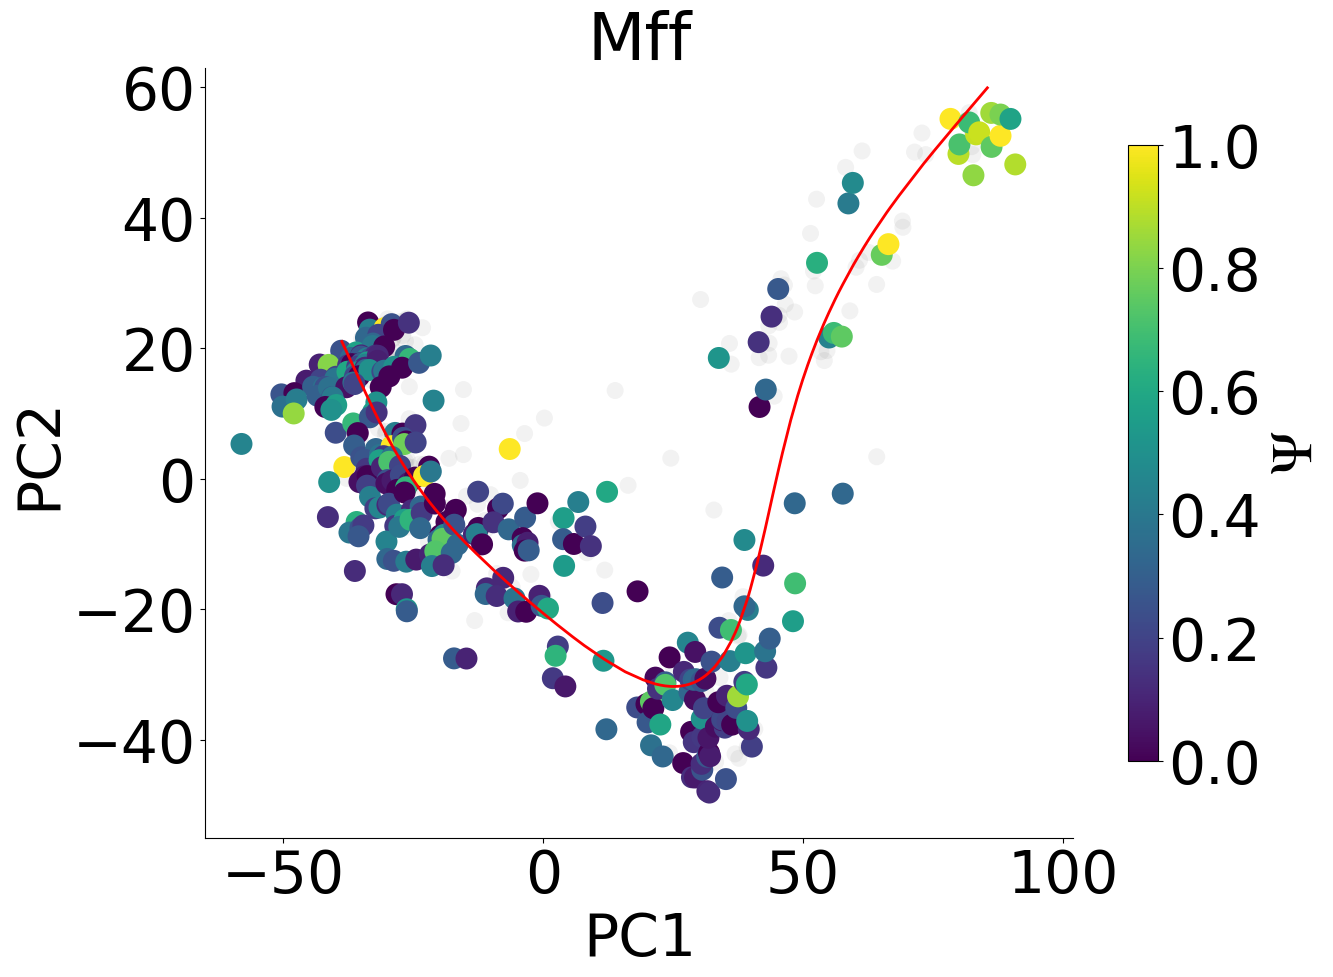

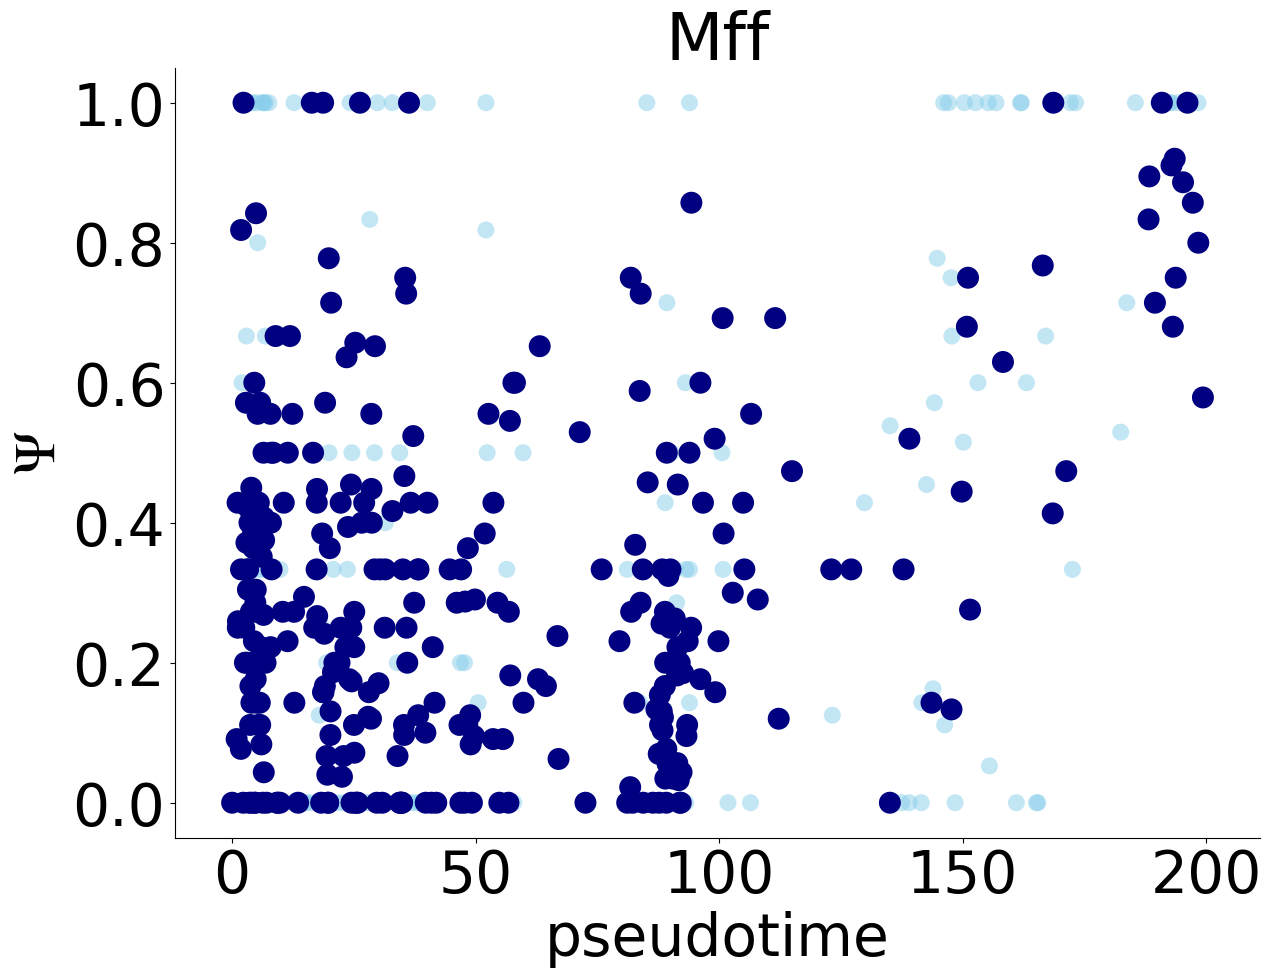

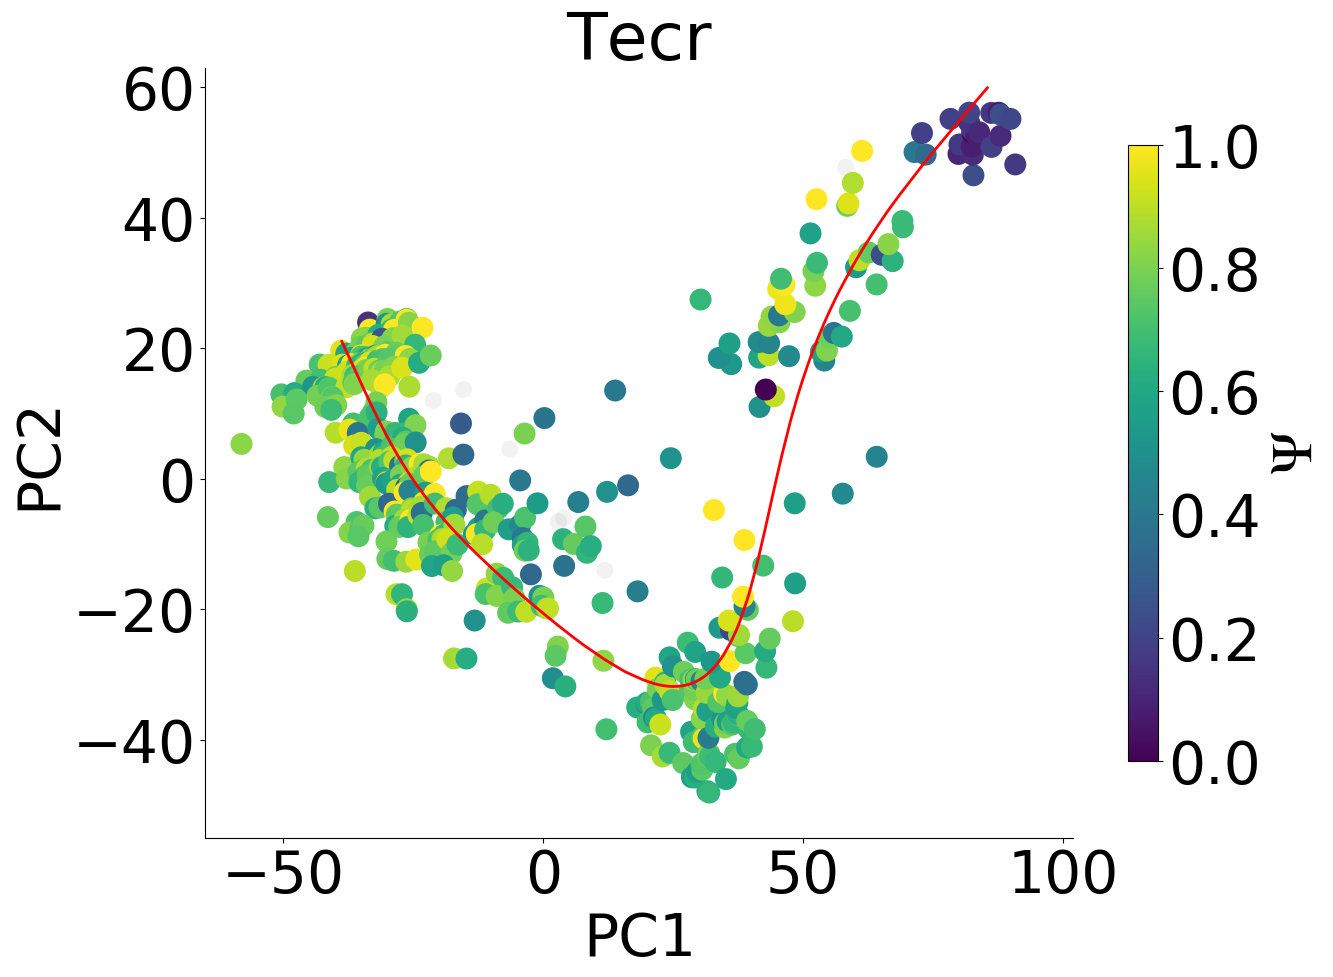

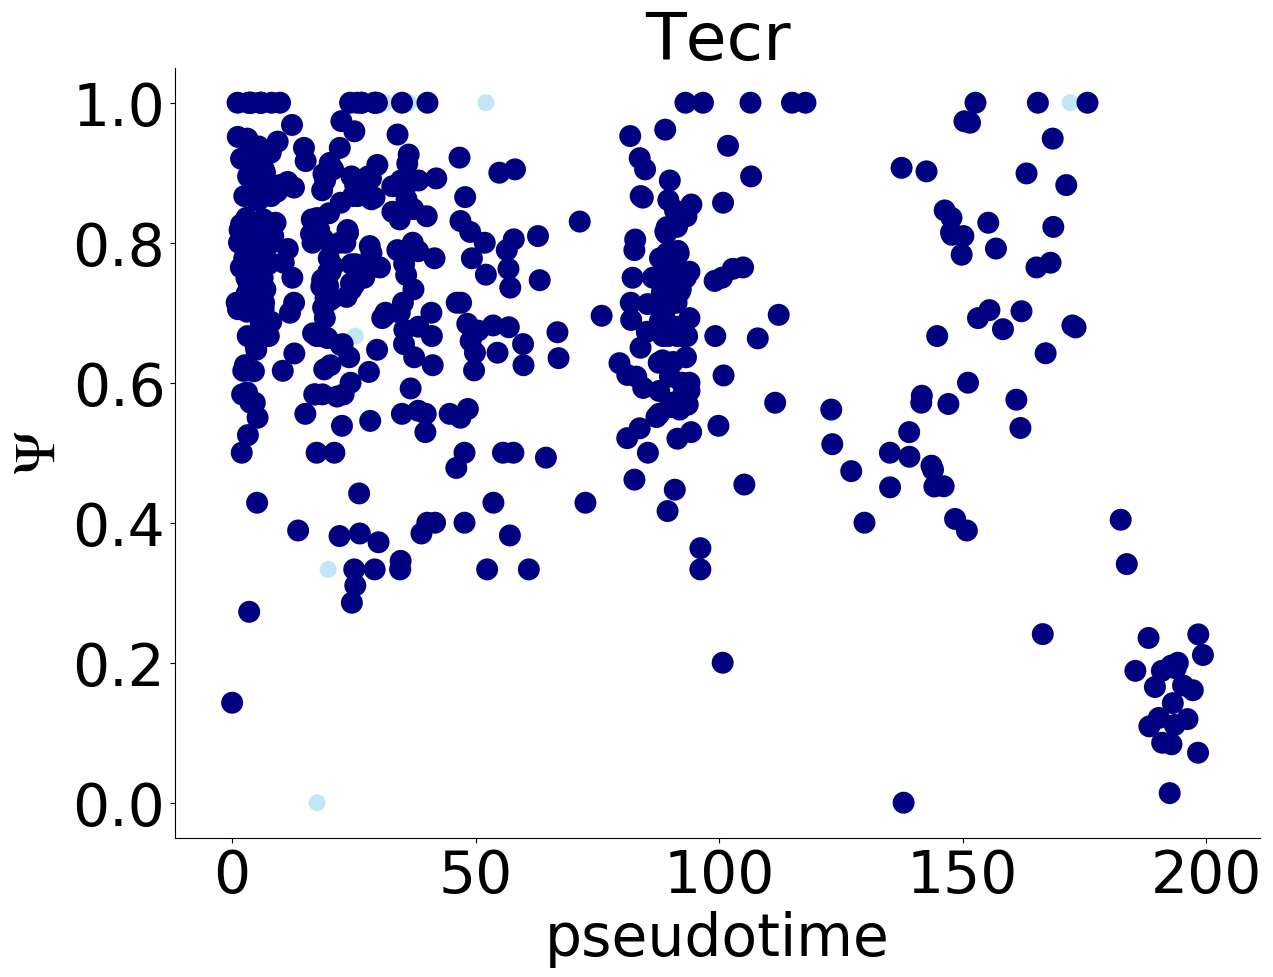

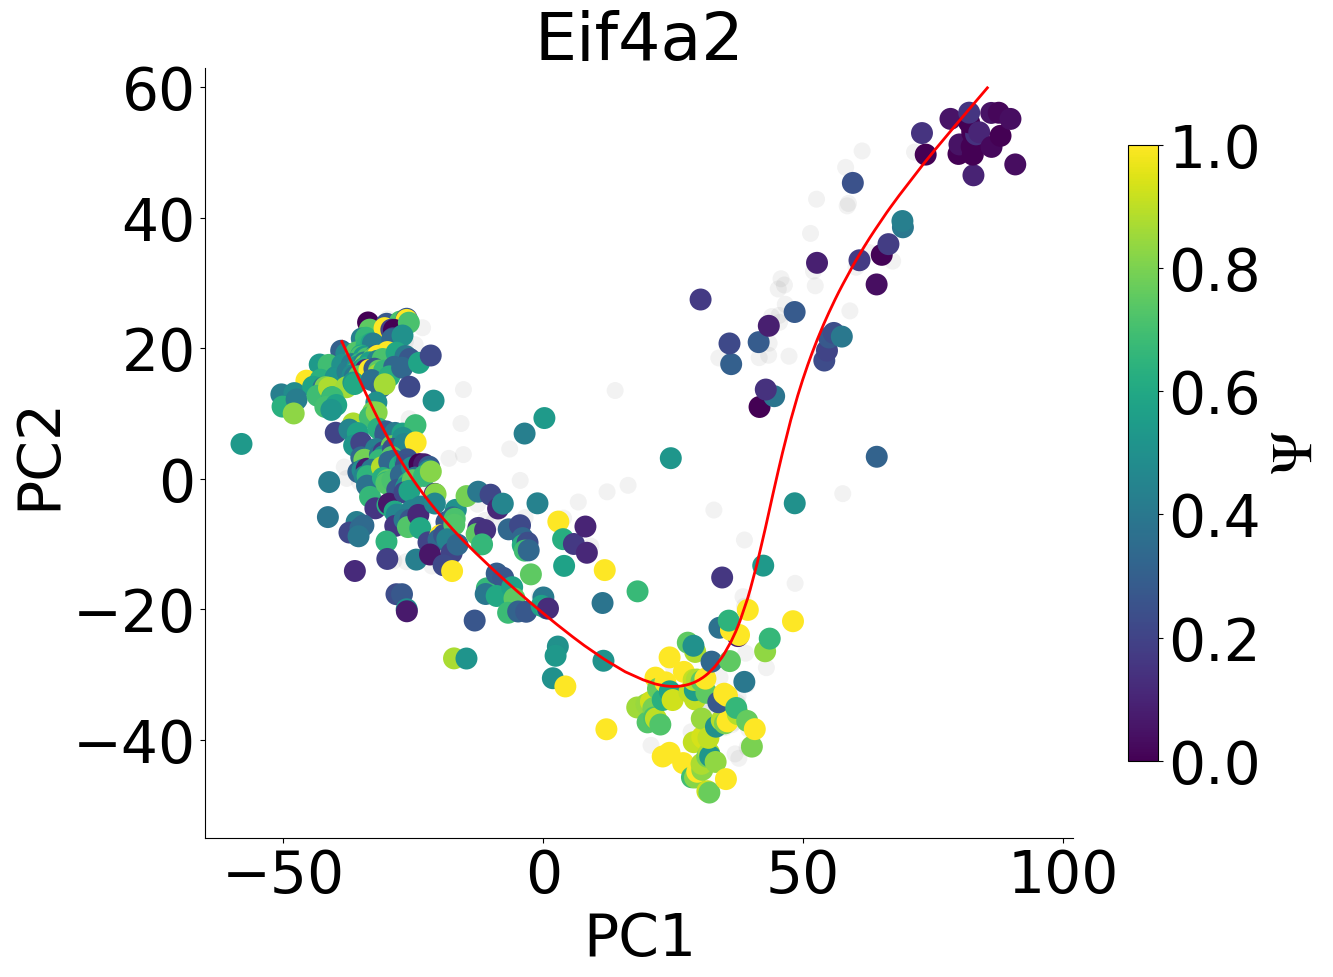

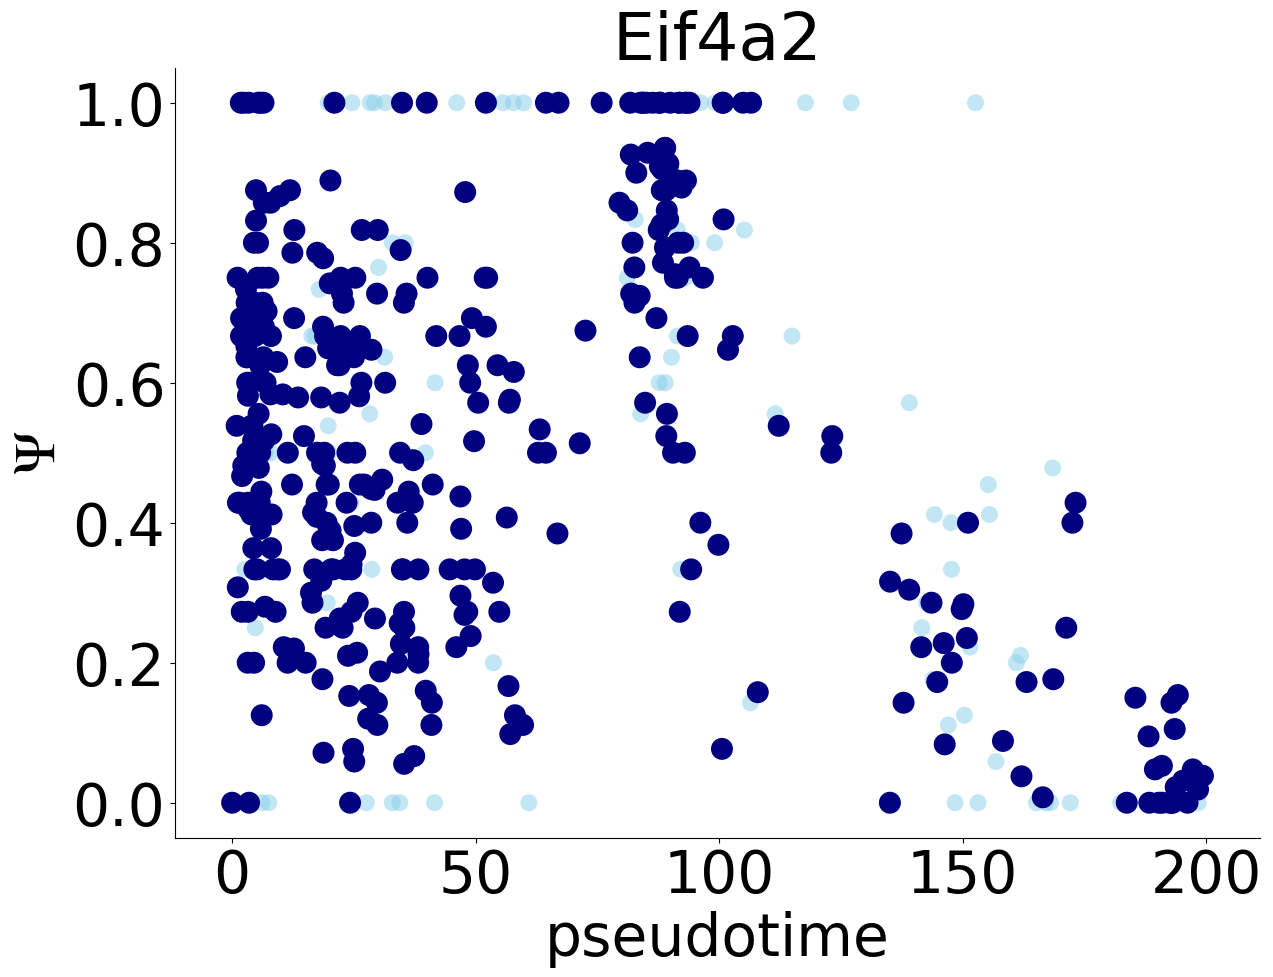

In [27]:
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Rpn2_1', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Clta_4', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Mff_3', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Tecr_4', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Eif4a2_2', 10)


In [28]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

    print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons#, PSI_mrna_z



In [29]:
chen_PSI_filtered, chen_PSI_mrna_filtered, chen_good_exons = filter_psi(chen_PSI, chen_int_exons, 
                                                                     mrna_per_event_chen, chen_c, chen_read_counts, 1, 10)

3927
174
